<a href="https://colab.research.google.com/github/GYULEE55/Retail-Festa/blob/main/A'%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%97%B0%EA%B5%AC%EC%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 1) 충돌 패키지 제거
# !pip uninstall -y numpy scipy statsmodels scikit-learn pmdarima

# # 2) 호환 조합 재설치 (Python 3.9~3.11에서 안정)
# !pip install --no-cache-dir \
#   numpy==1.26.4 \
#   scipy==1.11.4 \
#   scikit-learn==1.3.2 \
#   statsmodels==0.14.2 \
#   pmdarima==2.0.4



>> apt-get update -y
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,077 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubunt

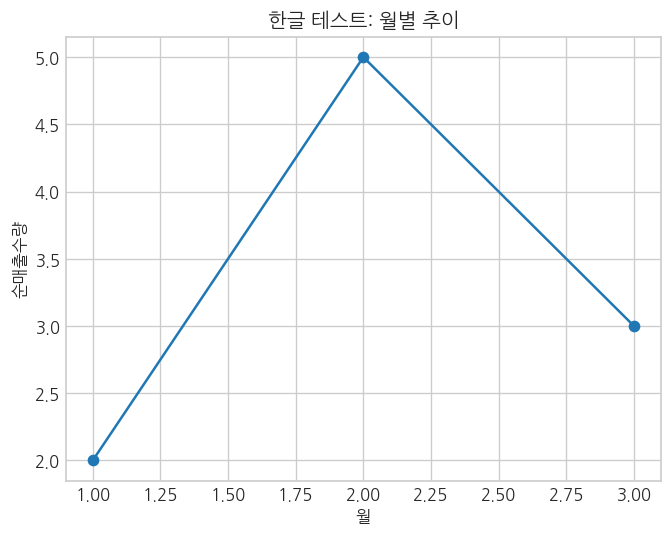

In [ ]:
# -*- coding: utf-8 -*-
# Colab 전용: 나눔/노토 폰트 설치 → Matplotlib에 전역 한글폰트 적용 → 테스트 플롯
import subprocess, sys, os, shutil, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def install_fonts_on_colab():
    # 1) apt로 한글 폰트 설치 (나눔 + 노토 CJK KR)
    cmds = [
        ["apt-get", "update", "-y"],
        ["apt-get", "install", "-y", "fonts-nanum", "fonts-noto-cjk"]
    ]
    for cmd in cmds:
        print(">>", " ".join(cmd))
        p = subprocess.run(["sudo"] + cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(p.stdout)
        if p.returncode != 0:
            print("STDERR:", p.stderr)
            raise RuntimeError(f"Command failed: {' '.join(cmd)}")

    # 2) 설치 경로 확인
    candidates = [
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansKR-Regular.otf",
    ]
    found = [p for p in candidates if os.path.exists(p) and os.path.getsize(p) > 50_000]
    if not found:
        raise FileNotFoundError("설치 후 나눔/노토 폰트 파일을 찾지 못했습니다. 경로를 확인해주세요.")
    print("✅ 설치된 폰트 파일:", found)
    return found

def register_and_set_font(font_paths):
    # 3) Matplotlib에 폰트 등록 + 캐시 리로드
    for p in font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception as e:
            print("addfont error:", e)

    # 캐시 새로고침
    try:
        fm._load_fontmanager(try_read_cache=False)  # mpl 3.6+
    except Exception:
        pass

    # 4) 실제 패밀리명 얻어서 rcParams 전역 설정
    family_names = []
    for p in font_paths:
        try:
            fam = fm.FontProperties(fname=p).get_name()
            if fam not in family_names:
                family_names.append(fam)
        except Exception:
            pass

    # 스타일이 폰트를 덮어쓰는 걸 방지: 스타일 먼저 적용 → 그 다음 폰트 지정
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        try:
            plt.style.use("seaborn-whitegrid")
        except Exception:
            pass

    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.sans-serif"] = family_names + [
        "NanumGothic", "Noto Sans CJK KR", "Apple SD Gothic Neo", "Malgun Gothic", "DejaVu Sans"
    ]
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["figure.dpi"] = 120
    mpl.rcParams["savefig.dpi"] = 320

    print("✅ 적용된 font.sans-serif =", mpl.rcParams["font.sans-serif"])

def korean_smoke_test():
    plt.figure()
    plt.plot([1,2,3],[2,5,3], marker="o")
    plt.title("한글 테스트: 월별 추이")
    plt.xlabel("월")
    plt.ylabel("순매출수량")
    plt.show()

# === 실행 순서 ===
paths = install_fonts_on_colab()
register_and_set_font(paths)
korean_smoke_test()


##A매출

In [ ]:
#A매출(21-23)
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매출 2021~2023 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

# 시트별 데이터 불러오기
df7 = pd.read_excel(xls, sheet_name='Result 1')  # 시트1
df8 = pd.read_excel(xls, sheet_name='Result 2')  # 시트2
df9 = pd.read_excel(xls, sheet_name='시트1 생수,음료,건강 빼야할거 ')  # 시트3
df10 = pd.read_excel(xls, sheet_name='시트1 신선식품 빼야할거')  # 시트4
df11 = pd.read_excel(xls, sheet_name='시트2 생수,음료,건강 빼야할꺼')  # 시트5
df12 = pd.read_excel(xls, sheet_name='시트2 신선식품 빼야할꺼')  # 시트6
df13 = pd.read_excel(xls, sheet_name='시트1 신선식품넣어야할꺼') # 시트7
df14 = pd.read_excel(xls, sheet_name='시트1 생수,건강,음료 넣어야할꺼')  # 시트8
df15 = pd.read_excel(xls, sheet_name='시트2 생수,음료,건강 넣어야할꺼 ')  # 시트9

# 중분류 널값 채우기
df13['중분류'].fillna('신선식품', inplace=True)
df14['중분류'].fillna('생수,음료,건강', inplace=True)
df15['중분류'].fillna('생수,음료,건강', inplace=True)

# 시트7,8 합치기 (시트1에 넣을 데이터)
df1_ext = pd.concat([df7, df13, df14], ignore_index=True)

# 시트2와 시트9 합치기
df2_ext = pd.concat([df8, df15], ignore_index=True)

# 기준 컬럼
key_cols = [
    '판매일',
    '구분',
    '매출처 우편번호',
    '매출처코드',
    '판매수량',
    '옵션 코드',
    '규격',
    '입수',
    '바코드',
    '상품명',
    '대분류',
    '중분류',
    '소분류',
    '공급금액',
    '부가세(과세)'
]


# 시트1에서 시트3,4 빼기
df34 = pd.concat([df9, df10], ignore_index=True)
df1_filtered = df1_ext.merge(df34[key_cols], on=key_cols, how='left', indicator=True)
df1_filtered = df1_filtered[df1_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 시트2에서 시트5,6 빼기
df56 = pd.concat([df11, df12], ignore_index=True)
df2_filtered = df2_ext.merge(df56[key_cols], on=key_cols, how='left', indicator=True)
df2_filtered = df2_filtered[df2_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 시트1,2 합치기
df_final = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

print(f"최종 df1_filtered 행 수: {len(df1_filtered)}")
print(f"최종 df2_filtered 행 수: {len(df2_filtered)}")
print(f"최종 결합 데이터 행 수: {len(df_final)}")

print(df_final.head())
print(df_final.shape)


/tmp/ipython-input-3462050643.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df13['중분류'].fillna('신선식품', inplace=True)
/tmp/ipython-input-3462050643.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '신선식품' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df13['중분류'].fillna('신선식품', inplace=True)
/tmp/ipython-input-3462050643.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame

최종 df1_filtered 행 수: 1045724
최종 df2_filtered 행 수: 411577
최종 결합 데이터 행 수: 1457301
          판매일  구분  매출처 우편번호  매출처코드  판매수량 옵션 코드   규격  입수           바코드  \
0  2021-01-04  매출     37806    151     3    EA  12입   1  8.801046e+12   
1  2021-01-04  매출     37806    151     4    EA  48입   1  8.801047e+12   
2  2021-01-04  매출     37806    151     2    EA  24입   1  8.801047e+12   
3  2021-01-04  매출     37806    151     3    EA  24입   1  8.801047e+12   
4  2021-01-04  매출     37806    151     3    EA  12입   1  8.801047e+12   

                   상품명 대분류          중분류  소분류   공급금액  부가세(과세)  
0   오뚜기]컵밥<햄버그덮밥/310g>  식품  라면,통조림,상온즉석  NaN   5400      540  
1      동원]골뱅이자연산<140g>  식품  라면,통조림,상온즉석  NaN  11900     1190  
2      동원]골뱅이자연산<230g>  식품  라면,통조림,상온즉석  NaN   7800      780  
3       동원]죽<가평잣/285g>  식품  라면,통조림,상온즉석  NaN   5600      560  
4  동원]양반죽 야채큰<404g>XXX  식품  라면,통조림,상온즉석  NaN   7100      710  
(1457301, 15)


In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_machul2023 = df_final[df_final['중분류'].isin(target_values)]

In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_machul2023)}")

# '중분류' 값별 분포 확인
print(df_A_machul2023['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_machul2023.head())

필터링된 행 수: 220318
중분류
생수,음료,건강    195314
신선식품         25004
Name: count, dtype: int64
            판매일  구분  매출처 우편번호  매출처코드  판매수량 옵션 코드   규격  입수           바코드  \
85   2021-01-04  매출     37581    159    24    EA  24입   1  8.801094e+12   
86   2021-01-04  매출     37581    159    12    EA  12입   1  8.801094e+12   
155  2021-01-04  매출     37611    171     1    BX  30입  30  1.701006e+12   
162  2021-01-04  매출     37611    171     5    BX   6입   6  8.801043e+12   
181  2021-01-04  매출     37611    171    10    CS   6입   6  8.809274e+12   

               상품명 대분류       중분류  소분류   공급금액  부가세(과세)  
85     코카콜라<500ml>  식품  생수,음료,건강  NaN  29500     2950  
86   코카]스프라이트<1.5>  식품  생수,음료,건강  NaN  17400     1740  
155  코카콜라<250ml/캔>  식품  생수,음료,건강  NaN  20100     2010  
162   농심음료]백산수<2L>  식품  생수,음료,건강  NaN  19600     1960  
181     가야산천년수<2L>  식품  생수,음료,건강  NaN  17300     1730  


In [ ]:
print(df_A_machul2023.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격             175
입수               0
바코드            616
상품명              0
대분류            247
중분류              0
소분류         195371
공급금액             0
부가세(과세)          0
dtype: int64


###A매출 2024

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매출 2024 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

# 시트 로드
df16 = pd.read_excel(xls, sheet_name='Sheet1')
df17 = pd.read_excel(xls, sheet_name='생수,음료,건강 전처리')
df18 = pd.read_excel(xls, sheet_name='신선식품 전처리')
df19 = pd.read_excel(xls, sheet_name='생수,음료,건강 넣어야할꺼')
df20 = pd.read_excel(xls, sheet_name='7월신선식품 ')
df21 = pd.read_excel(xls, sheet_name='7월생수,음료,건강')


# 기준 컬럼
key_cols = [
    '판매일','구분','우편번호','매출처코드','판매수량','옵션코드','규격','입수',
    '상품 바코드(대한상의)','상품명','대분류','중분류','소분류','공급가액','부가세'
]

# 1. 중분류 형변환 후 채우기
for df_, val in [(df19,'생수,음료,건강'), (df21,'생수,음료,건강'), (df20,'신선식품')]:
    df_['중분류'] = df_['중분류'].astype('object').fillna(val)

# 중분류 채우기
df19['중분류'].fillna('생수,음료,건강', inplace=True)
df21['중분류'].fillna('생수,음료,건강', inplace=True)
df20['중분류'].fillna('신선식품', inplace=True)

 # 2. df16에서 df17, df18 제거 (기존 코드와 동일)
df_remove = pd.concat([df17, df18], ignore_index=True)
df16_filtered = df16.merge(
    df_remove[key_cols], on=key_cols, how='left', indicator=True
)
df16_filtered = df16_filtered[df16_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 3. 신규 데이터 추가
df_base = pd.concat([df16_filtered, df19], ignore_index=True)

# 4. 업데이트용
df_update = pd.concat([df20, df21], ignore_index=True)

# 5. 키 컬럼: 소분류 제외
merge_cols = [c for c in key_cols if c not in ['중분류','소분류']]

# 6. 타입 맞추기 (안전하게)
for c in merge_cols:
    df_base[c]   = df_base[c].astype('object')
    df_update[c] = df_update[c].astype('object')

# 7. 중분류 업데이트
df_final = df_base.merge(
    df_update[merge_cols + ['중분류']],
    on=merge_cols,
    how='left',
    suffixes=('', '_new')
)
df_final['중분류'] = df_final['중분류_new'].combine_first(df_final['중분류'])
df_final.drop(columns=['중분류_new'], inplace=True)

print(df_final.shape)


/tmp/ipython-input-4153393532.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df19['중분류'].fillna('생수,음료,건강', inplace=True)
/tmp/ipython-input-4153393532.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

(381644, 15)


##중분류 추출

In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_machul2024 = df_final[df_final['중분류'].isin(target_values)]

In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_machul2024)}")

# '중분류' 값별 분포 확인
print(df_A_machul2024['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_machul2024.head())

필터링된 행 수: 68084
중분류
생수,음료,건강    54061
신선식품        14023
Name: count, dtype: int64
                   판매일  구분 매출처코드   우편번호 판매수량 옵션코드   규격  입수    상품 바코드(대한상의)  \
1  2024-01-02 00:00:00  매출     8  37542    1   BX  24입  24  18801128945070   
3  2024-01-02 00:00:00  매출     8  37542    1   BX  12입  12  18801223100275   
4  2024-01-02 00:00:00  매출     8  37542    1   BX  10입  10  18801069218035   
5  2024-01-02 00:00:00  매출     8  37542    2   BX  30입  30  68801056042716   
7  2024-01-02 00:00:00  매출     8  37542    2   BX  15입  15   3300000010649   

                      상품명 대분류       중분류        소분류   공급가액   부가세  
1      팔도]뽀로로밀크<235ml*24>  식품  생수,음료,건강        NaN  16900  1690  
3                맥콜<1.5L>  식품  생수,음료,건강        NaN  17400  1740  
4  남양]프렌치카페컵(카페오레)<200ml>  식품  생수,음료,건강        NaN  10500  1050  
5   칠성사이다<190ml/업소/캔>반품불가  식품  생수,음료,건강        NaN  19700  1970  
7           얼음]컵<180g>XXX  식품      신선식품  냉동,냉장,간편식  10400  1040  


In [ ]:
df_A_machul2024 = df_A_machul2024.rename(columns={
    '우편번호': '매출처 우편번호',
    '옵션코드': '옵션 코드',
    '상품 바코드(대한상의)': '바코드',
    '공급가액': '공급금액',
    '부가세': '부가세(과세)'
})
print(df_A_machul2024.head())

                   판매일  구분 매출처코드 매출처 우편번호 판매수량 옵션 코드   규격  입수             바코드  \
1  2024-01-02 00:00:00  매출     8    37542    1    BX  24입  24  18801128945070   
3  2024-01-02 00:00:00  매출     8    37542    1    BX  12입  12  18801223100275   
4  2024-01-02 00:00:00  매출     8    37542    1    BX  10입  10  18801069218035   
5  2024-01-02 00:00:00  매출     8    37542    2    BX  30입  30  68801056042716   
7  2024-01-02 00:00:00  매출     8    37542    2    BX  15입  15   3300000010649   

                      상품명 대분류       중분류        소분류   공급금액 부가세(과세)  
1      팔도]뽀로로밀크<235ml*24>  식품  생수,음료,건강        NaN  16900    1690  
3                맥콜<1.5L>  식품  생수,음료,건강        NaN  17400    1740  
4  남양]프렌치카페컵(카페오레)<200ml>  식품  생수,음료,건강        NaN  10500    1050  
5   칠성사이다<190ml/업소/캔>반품불가  식품  생수,음료,건강        NaN  19700    1970  
7           얼음]컵<180g>XXX  식품      신선식품  냉동,냉장,간편식  10400    1040  


In [ ]:
import pandas as pd

# 1️⃣ 날짜 컬럼을 datetime으로 변환
df_A_machul2024['판매일'] = pd.to_datetime(df_A_machul2024['판매일'], errors='coerce')

# 2️⃣ 8~12월만 필터링
mask = df_A_machul2024['판매일'].dt.month.between(8, 12)
df_8_12 = df_A_machul2024[mask]

# 3️⃣ 매출 수량 합계 확인
print("2024년 8~12월 월별 매출 수량 합계")
print(
    df_8_12
    .groupby(df_8_12['판매일'].dt.to_period('M'))['판매수량']
    .sum()
)

# 4️⃣ 월별 건수(행 수) 확인
print("\n2024년 8~12월 월별 매출 건수")
print(
    df_8_12
    .groupby(df_8_12['판매일'].dt.to_period('M'))
    .size()
)


2024년 8~12월 월별 매출 수량 합계
판매일
2024-08    49227
2024-09    42710
2024-10    37256
2024-11    34042
2024-12    30407
Freq: M, Name: 판매수량, dtype: object

2024년 8~12월 월별 매출 건수
판매일
2024-08    7434
2024-09    5865
2024-10    4837
2024-11    4349
2024-12    4165
Freq: M, dtype: int64


##A매출 (중분류 추출 후)데이터 합치기


In [ ]:
df_machul_final = pd.concat([df_A_machul2023, df_A_machul2024], ignore_index=True)
print(df_machul_final.shape)
print(df_machul_final.head())
df_machul_final = pd.concat([df_A_machul2023, df_A_machul2024], ignore_index=True)
print(df_machul_final.shape)
print(df_machul_final.head())
(254654, 15)

(288402, 15)
          판매일  구분 매출처 우편번호 매출처코드 판매수량 옵션 코드   규격  입수              바코드  \
0  2021-01-04  매출    37581   159   24    EA  24입   1  8801094017606.0   
1  2021-01-04  매출    37581   159   12    EA  12입   1  8801094202408.0   
2  2021-01-04  매출    37611   171    1    BX  30입  30  1701006174809.0   
3  2021-01-04  매출    37611   171    5    BX   6입   6  8801043020480.0   
4  2021-01-04  매출    37611   171   10    CS   6입   6  8809274240219.0   

             상품명 대분류       중분류  소분류   공급금액 부가세(과세)  
0    코카콜라<500ml>  식품  생수,음료,건강  NaN  29500    2950  
1  코카]스프라이트<1.5>  식품  생수,음료,건강  NaN  17400    1740  
2  코카콜라<250ml/캔>  식품  생수,음료,건강  NaN  20100    2010  
3   농심음료]백산수<2L>  식품  생수,음료,건강  NaN  19600    1960  
4     가야산천년수<2L>  식품  생수,음료,건강  NaN  17300    1730  
(288402, 15)
          판매일  구분 매출처 우편번호 매출처코드 판매수량 옵션 코드   규격  입수              바코드  \
0  2021-01-04  매출    37581   159   24    EA  24입   1  8801094017606.0   
1  2021-01-04  매출    37581   159   12    EA  12입   1  8801094202408.0  

(254654, 15)

###NULL값 처리

In [ ]:
print(df_machul_final.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격             580
입수               0
바코드            616
상품명              0
대분류            323
중분류              0
소분류         258382
공급금액             0
부가세(과세)          0
dtype: int64


In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows1 = df_machul_final[df_machul_final[['바코드']].isnull().any(axis=1)]
print(null_rows1[['바코드', '상품명']])

        바코드            상품명
66487   NaN  칠성]레쓰비<175ml>
66589   NaN  칠성]레쓰비<175ml>
66622   NaN  칠성]레쓰비<175ml>
66746   NaN  칠성]레쓰비<175ml>
66768   NaN  칠성]레쓰비<175ml>
...     ...            ...
144143  NaN  칠성]레쓰비<175ml>
144169  NaN  칠성]레쓰비<175ml>
144202  NaN  칠성]레쓰비<175ml>
144241  NaN  칠성]레쓰비<175ml>
144635  NaN  칠성]레쓰비<175ml>

[616 rows x 2 columns]


In [ ]:
condition = (df_machul_final['바코드'].isnull()) & (df_machul_final['상품명'] == '칠성]레쓰비<175ml>')
df_machul_final.loc[condition, '바코드'] = '68801056290308'


In [ ]:
null_rows2 = df_machul_final[df_machul_final[['규격']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 11개만 예시로 출력)
print(null_rows2[['규격', '상품명']])

         규격            상품명
164125  NaN  얼음]컵<230g>XXX
165672  NaN  얼음]컵<230g>XXX
166086  NaN  얼음]컵<230g>XXX
166786  NaN  얼음]컵<230g>XXX
169938  NaN  얼음]컵<230g>XXX
...     ...            ...
287306  NaN  얼음]컵<230g*12>
287745  NaN  얼음]컵<230g*12>
287817  NaN  얼음]컵<230g*12>
288053  NaN  얼음]컵<230g*12>
288240  NaN  얼음]컵<230g*12>

[580 rows x 2 columns]


In [ ]:
condition = (df_machul_final['규격'].isnull()) & df_machul_final['상품명'].isin(['얼음]컵<230g>XXX', '얼음]컵<230g*12>'])
df_machul_final.loc[condition, '규격'] = 12



In [ ]:
print(df_machul_final.isnull().sum())

판매일              0
구분               0
매출처 우편번호         0
매출처코드            0
판매수량             0
옵션 코드            0
규격               0
입수               0
바코드              0
상품명              0
대분류            323
중분류              0
소분류         258382
공급금액             0
부가세(과세)          0
dtype: int64


In [ ]:
# 인덱스를 재설정하여 '일자' 컬럼을 다시 복원
df_machul_final.reset_index(inplace=True)

# '일자' 컬럼 확인
print(df_machul_final['판매일'].head())


0    2021-01-04
1    2021-01-04
2    2021-01-04
3    2021-01-04
4    2021-01-04
Name: 판매일, dtype: object


In [ ]:
import pandas as pd

# 1️⃣ '판매일' 컬럼을 datetime 형식으로 변환
df_machul_final['판매일'] = pd.to_datetime(df_machul_final['판매일'], errors='coerce')

# 2️⃣ 날짜 관련 파생 컬럼 생성
df_machul_final['연도'] = df_machul_final['판매일'].dt.year
df_machul_final['월'] = df_machul_final['판매일'].dt.month  # 월별
df_machul_final['주차'] = df_machul_final['판매일'].dt.to_period('W')  # 주차 (주별)
df_machul_final['요일'] = df_machul_final['판매일'].dt.day_name()  # 요일 (영문)

# 3️⃣ 일요일 제거
df_machul_final = df_machul_final[df_machul_final['요일'] != 'Sunday'].copy()

# 4️⃣ 월 기준 주차(1~5) 재설정
df_machul_final['주차'] = df_machul_final['판매일'].dt.day.sub(1).floordiv(7).add(1)

# 5️⃣ 요일 컬럼 제거 (존재할 때만)
if '요일' in df_machul_final.columns:
    df_machul_final.drop(columns='요일', inplace=True)

# 결과 확인
print(df_machul_final.head())



   index        판매일  구분 매출처 우편번호 매출처코드 판매수량 옵션 코드   규격  입수              바코드  \
0      0 2021-01-04  매출    37581   159   24    EA  24입   1  8801094017606.0   
1      1 2021-01-04  매출    37581   159   12    EA  12입   1  8801094202408.0   
2      2 2021-01-04  매출    37611   171    1    BX  30입  30  1701006174809.0   
3      3 2021-01-04  매출    37611   171    5    BX   6입   6  8801043020480.0   
4      4 2021-01-04  매출    37611   171   10    CS   6입   6  8809274240219.0   

             상품명 대분류       중분류  소분류   공급금액 부가세(과세)    연도  월  주차  
0    코카콜라<500ml>  식품  생수,음료,건강  NaN  29500    2950  2021  1   1  
1  코카]스프라이트<1.5>  식품  생수,음료,건강  NaN  17400    1740  2021  1   1  
2  코카콜라<250ml/캔>  식품  생수,음료,건강  NaN  20100    2010  2021  1   1  
3   농심음료]백산수<2L>  식품  생수,음료,건강  NaN  19600    1960  2021  1   1  
4     가야산천년수<2L>  식품  생수,음료,건강  NaN  17300    1730  2021  1   1  


In [ ]:
import pandas as pd

# 1️⃣ 매출 데이터 집계 (판매수량, 공급금액 합산)
sales = (
    df_machul_final[df_machul_final['구분'] == '매출']  # 매출 데이터만 필터링
    .groupby(['연도', '월', '주차'], as_index=False)[['판매수량']]  # 판매수량 합산
    .sum()
    .rename(columns={'판매수량': '판매수량_매출'})
)

# 2️⃣ 반품 데이터 집계 (반품 수량 합산)
returns = (
    df_machul_final[df_machul_final['구분'] == '반품']  # 반품 데이터만 필터링
    .groupby(['연도', '월', '주차'], as_index=False)[['판매수량']]  # 반품 수량 합산
    .sum()
    .rename(columns={'판매수량': '판매수량_반품'})
)

# 3️⃣ 매출과 반품 데이터 병합
result = (
    sales
    .merge(returns, on=['연도', '월', '주차'], how='left')  # 매출과 반품 병합
    .fillna(0)  # NaN 값을 0으로 채움
)

# 4️⃣ 순매출수량 계산
result['순매출수량'] = result['판매수량_매출'] - result['판매수량_반품']

# 5️⃣ 결과 출력 (연도, 월, 주차, 순매출수량만 표시)
cols = ['연도', '월', '주차', '순매출수량']
print(result[cols].to_string(index=False))


  연도  월  주차  순매출수량
2021  1   1   4727
2021  1   2   6508
2021  1   3   6707
2021  1   4   5478
2021  1   5    661
2021  2   1   7426
2021  2   2   7602
2021  2   3   7599
2021  2   4   6970
2021  3   1  10395
2021  3   2   6147
2021  3   3   6112
2021  3   4   6717
2021  3   5   3063
2021  4   1   6608
2021  4   2   6127
2021  4   3   7944
2021  4   4   8602
2021  4   5   4112
2021  5   1  10681
2021  5   2   9354
2021  5   3   8091
2021  5   4  10683
2021  5   5   2314
2021  6   1  15869
2021  6   2  10905
2021  6   3   7997
2021  6   4   7798
2021  6   5   5798
2021  7   1   7612
2021  7   2  12784
2021  7   3  12349
2021  7   4  11347
2021  7   5   5664
2021  8   1  14142
2021  8   2   9834
2021  8   3   6651
2021  8   4   7429
2021  8   5   5304
2021  9   1   5964
2021  9   2   9449
2021  9   3   8365
2021  9   4   5948
2021  9   5   2864
2021 10   1  14056
2021 10   2   8330
2021 10   3   8000
2021 10   4  11208
2021 10   5   3074
2021 11   1  12397
2021 11   2   9501
2021 11   3 

/tmp/ipython-input-2074476748.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0)  # NaN 값을 0으로 채움


In [ ]:
import pandas as pd

# 1️⃣ 매출 데이터 집계 (판매수량 합산) - 중분류별로 그룹화
sales = (
    df_machul_final[df_machul_final['구분'] == '매출']  # 매출 데이터만 필터링
    .groupby(['연도', '월', '주차', '중분류'], as_index=False)[['판매수량']]  # 중분류별 판매수량 합산
    .sum()
    .rename(columns={'판매수량': '판매수량_매출'})
)

# 2️⃣ 반품 데이터 집계 (판매수량 합산) - 중분류별로 그룹화
returns = (
    df_machul_final[df_machul_final['구분'] == '반품']  # 반품 데이터만 필터링
    .groupby(['연도', '월', '주차', '중분류'], as_index=False)[['판매수량']]  # 중분류별 반품 수량 합산
    .sum()
    .rename(columns={'판매수량': '판매수량_반품'})
)

# 3️⃣ 매출과 반품 데이터 병합
result = (
    sales
    .merge(returns, on=['연도', '월', '주차', '중분류'], how='left')  # 중복된 컬럼 이름 처리 없이 병합
    .fillna(0)  # NaN 값을 0으로 채움
)

# 4️⃣ 순매출수량 계산 (매출수량 - 반품수량)
result['순매출수량'] = result['판매수량_매출'] - result['판매수량_반품']

# 5️⃣ 결과 출력 (연도, 월, 주차, 중분류, 순매출수량만 표시)
cols = ['연도', '월', '주차', '중분류', '순매출수량']
print(result[cols].to_string(index=False))

# 6️⃣ 결과를 df_machul_final에 병합하여 중분류별 순매출수량을 추가
df_machul_final = df_machul_final.merge(result[['연도', '월', '주차', '중분류', '순매출수량']],
                                         on=['연도', '월', '주차', '중분류'], how='left')

# 결과 확인
print(df_machul_final[['연도', '월', '주차', '중분류', '순매출수량']].head())


  연도  월  주차      중분류  순매출수량
2021  1   1 생수,음료,건강   4541
2021  1   1     신선식품    186
2021  1   2 생수,음료,건강   6349
2021  1   2     신선식품    159
2021  1   3 생수,음료,건강   6543
2021  1   3     신선식품    164
2021  1   4 생수,음료,건강   5357
2021  1   4     신선식품    121
2021  1   5 생수,음료,건강    633
2021  1   5     신선식품     28
2021  2   1 생수,음료,건강   7344
2021  2   1     신선식품     82
2021  2   2 생수,음료,건강   7393
2021  2   2     신선식품    209
2021  2   3 생수,음료,건강   7503
2021  2   3     신선식품     96
2021  2   4 생수,음료,건강   6822
2021  2   4     신선식품    148
2021  3   1 생수,음료,건강  10075
2021  3   1     신선식품    320
2021  3   2 생수,음료,건강   5830
2021  3   2     신선식품    317
2021  3   3 생수,음료,건강   5702
2021  3   3     신선식품    410
2021  3   4 생수,음료,건강   5972
2021  3   4     신선식품    745
2021  3   5 생수,음료,건강   2853
2021  3   5     신선식품    210
2021  4   1 생수,음료,건강   6060
2021  4   1     신선식품    548
2021  4   2 생수,음료,건강   5758
2021  4   2     신선식품    369
2021  4   3 생수,음료,건강   7518
2021  4   3     신선식품    426
2021  4   4 생수,음료,건강

/tmp/ipython-input-1249651484.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0)  # NaN 값을 0으로 채움


In [ ]:
df_machul_final.columns

Index(['index', '판매일', '구분', '매출처 우편번호', '매출처코드', '판매수량', '옵션 코드', '규격', '입수',
       '바코드', '상품명', '대분류', '중분류', '소분류', '공급금액', '부가세(과세)', '연도', '월', '주차',
       '순매출수량'],
      dtype='object')

In [ ]:
# 1️⃣ 중복 컬럼 드랍 (예: 순매출수량_x, 순매출수량_y 삭제)
df_machul_final.drop(columns=['매출처 우편번호', '매출처코드', '옵션 코드', '규격', '입수',
       '바코드', '상품명', '대분류', '소분류', '공급금액', '부가세(과세)',], inplace=True)




In [ ]:

import pandas as pd

# 1️⃣ 판매일과 중분류별 매출 수량 합산
df_grouped = df_machul_final.groupby(['판매일', '중분류','연도','월','주차','구분'], as_index=False)['판매수량'].sum()

# 2️⃣ 결과 출력 (상위 30개 행을 확인)
print(df_grouped.head(30))  # 상위 30개 행을 확인



          판매일       중분류    연도  월  주차  구분  판매수량
0  2021-01-04  생수,음료,건강  2021  1   1  매출  1733
1  2021-01-04  생수,음료,건강  2021  1   1  반품    -1
2  2021-01-04      신선식품  2021  1   1  매출    85
3  2021-01-05  생수,음료,건강  2021  1   1  매출   906
4  2021-01-05  생수,음료,건강  2021  1   1  반품    -2
5  2021-01-05      신선식품  2021  1   1  매출    54
6  2021-01-06  생수,음료,건강  2021  1   1  매출   789
7  2021-01-06  생수,음료,건강  2021  1   1  반품   -32
8  2021-01-06      신선식품  2021  1   1  매출    19
9  2021-01-07  생수,음료,건강  2021  1   1  매출  1078
10 2021-01-07      신선식품  2021  1   1  매출    28
11 2021-01-08  생수,음료,건강  2021  1   2  매출  1060
12 2021-01-08  생수,음료,건강  2021  1   2  반품    -1
13 2021-01-08      신선식품  2021  1   2  매출    19
14 2021-01-11  생수,음료,건강  2021  1   2  매출  1054
15 2021-01-11  생수,음료,건강  2021  1   2  반품   -51
16 2021-01-11      신선식품  2021  1   2  매출    19
17 2021-01-12  생수,음료,건강  2021  1   2  매출  1645
18 2021-01-12  생수,음료,건강  2021  1   2  반품   -70
19 2021-01-12      신선식품  2021  1   2  매출    28
20 2021-01-13

#시계열 정상성 검증

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# 1️⃣ df_grouped에서 순매출수량 추출
df_series = df_grouped['판매수량']

# 2️⃣ ADF 검정 (Augmented Dickey-Fuller Test)
adf_result = adfuller(df_series)
print("ADF 검정 결과:")
print(f"ADF 검정 통계량: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"ADF 검정 결과 해석: {'정상성 있음' if adf_result[1] < 0.05 else '정상성 없음'}")

# 3️⃣ KPSS 검정 (Kwiatkowski-Phillips-Schmidt-Shin Test)
kpss_result = kpss(df_series, regression='c')
print("\nKPSS 검정 결과:")
print(f"KPSS 검정 통계량: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print(f"KPSS 검정 결과 해석: {'정상성 있음' if kpss_result[1] > 0.05 else '정상성 없음'}")


NameError: name 'df_grouped' is not defined

#베이스모델

In [ ]:
# 1️⃣ df_grouped에서 2024년 1~3월 실제 매출 수량 추출
actual_data_2024 = df_grouped[df_grouped['연도'] == 2024]
actual_data_2024 = actual_data_2024[actual_data_2024['월'].isin([1, 2, 3])]

# 2️⃣ 월별로 순매출수량 집계
actual_data_2024_monthly = actual_data_2024.groupby(['연도', '월'])['판매수량'].sum().reset_index()

# 3️⃣ 결과 출력
print("2024년 1~3월 실제 매출 수량:")
print(actual_data_2024_monthly)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 모델 성능 평가 결과를 저장할 리스트
results = []

# 모델 성능을 평가할 각 중분류별로 반복
for category in df_grouped['중분류'].unique():

    # 해당 중분류 데이터 필터링
    df_category = df_grouped[df_grouped['중분류'] == category]

    # 1️⃣ 실제 데이터 (2024년 1~3월) 월별로 집계
    test_data = df_category[df_category['연도'] == 2024]
    test_data = test_data[test_data['월'].isin([1, 2, 3])]
    test_data_monthly = test_data.groupby(['연도', '월'])['판매수량'].sum()  # 월별로 합산

    # 2️⃣ 학습 데이터 (2021-2023년) 월별로 집계
    train_data = df_category[df_category['연도'].isin([2021, 2022, 2023])]
    train_data_monthly = train_data.groupby(['연도', '월'])['판매수량'].sum()  # 월별로 합산

    # 3️⃣ MA(3) 모델 적용 (3개월 이동 평균)
    train_data_ma3 = train_data_monthly.rolling(window=3).mean()

    # 4️⃣ 예측 (MA(3) 모델을 사용하여 마지막 3개월 평균값을 예측)
    forecast_ma3 = train_data_ma3[-3:].values  # 마지막 3개월의 이동 평균값을 예측

    # 5️⃣ 실제값과 예측값 비교 (2024년 1~3월)
    actual_values = test_data_monthly.values  # 실제 값 (2024년 1~3월)
    predicted_values = forecast_ma3  # 예측 값 (MA(3) 모델)

    # 6️⃣ MAPE 계산
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

    # 7️⃣ RMSE 계산
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    # 8️⃣ 모델 파라미터 및 결과 저장
    results.append({
        '중분류': category,
        '타깃': '순매출수량',  # 예측 대상
        'Model': 'MA(3)',  # 사용된 모델
        'RMSE': round(rmse, 2),  # RMSE 값
        'MAPE': round(mape, 2),  # MAPE 값
        '실제값': actual_values.tolist(),  # 실제값
        '예측값': np.round(predicted_values, 2).tolist()  # 예측값
    })

# 9️⃣ 결과 DataFrame 생성
results_df = pd.DataFrame(results)

# 10️⃣ 예쁘게 포맷팅하여 출력
results_df = results_df[['중분류', '타깃', 'Model', 'RMSE', 'MAPE']]



# MAPE, RMSE 값을 깔끔하게 출력 (소수점 2자리로 포맷)
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"{x:.2f}")
results_df['MAPE'] = results_df['MAPE'].apply(lambda x: f"{x:.2f}")

# 11️⃣ 결과 출력
print("결과 출력:")
print(results_df.to_string(index=False))


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

TRAIN_YEARS = [2021, 2022, 2023]
TEST_YEAR   = 2024
TEST_MONTHS = [1, 2, 3]

# 비시즌/시즌 후보(간단한 조합 위주)
NONSEASONAL_ORDERS   = [(0,1,0), (0,1,1), (1,1,0), (1,1,1), (2,1,1)]
SEASONAL_ORDERS_12   = [(0,1,1,12), (1,1,1,12)]  # 데이터 충분할 때만 시도

def to_monthly_ts_sum(df):
    """연/월 합계 시리즈(DatetimeIndex=월초, freq=MS). 누락 월은 NaN으로 만들고 이후 보간."""
    s = (df.groupby(['연도','월'])['판매수량']
           .sum()
           .rename('y')
           .reset_index())
    s['date'] = pd.to_datetime(dict(year=s['연도'], month=s['월'], day=1))
    ts = s.set_index('date')['y'].sort_index().astype(float)

    # 전체 구간 monthly skeleton 만들기
    full_idx = pd.date_range(ts.index.min(), ts.index.max(), freq='MS')
    ts = ts.reindex(full_idx)  # NaN 유지 (0 채우지 않음)
    ts.index.name = 'date'

    # 선형 보간 + 앞뒤 결측은 가장 가까운 값으로 보간
    if ts.isna().any():
        ts = ts.interpolate('linear')
        ts = ts.bfill().ffill()
    return ts

def fit_best_sarimax(ts):
    """짧으면 비시즌만, 충분하면 시즌 포함. AIC 최소 모델 반환."""
    n_obs = len(ts)
    seasonal_candidates = SEASONAL_ORDERS_12 if n_obs >= 24 else [(0,0,0,0)]
    best = {'res': None, 'cfg': None, 'aic': np.inf}

    for order in NONSEASONAL_ORDERS:
        for seas in seasonal_candidates:
            try:
                seasonal_order = seas if seas != (0,0,0,0) else (0,0,0,0)
                model = SARIMAX(
                    ts,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    trend='n'
                )
                res = model.fit(disp=False)
                if np.isfinite(res.aic) and res.aic < best['aic']:
                    best = {'res': res, 'cfg': (order, seasonal_order), 'aic': res.aic}
            except Exception:
                continue
    return best['res'], best['cfg'], best['aic']

def sNaive_last_year_same_month(train_ts, horizon=3):
    """작년 동월 값으로 1년 ahead 매핑. 인덱스는 학습 마지막월 이후 MS 3개월."""
    last = train_ts.index.max()
    fcst_idx = pd.date_range(last + pd.offsets.MonthBegin(1), periods=horizon, freq='MS')
    # 대응되는 작년 동월 인덱스
    ly_idx = fcst_idx - pd.DateOffset(years=1)
    yhat = []
    for d in ly_idx:
        yhat.append(train_ts[d] if d in train_ts.index else train_ts.iloc[-12] if len(train_ts)>=12 else train_ts.iloc[-1])
    return np.array(yhat), fcst_idx

results = []

for category in df_grouped['중분류'].unique():
    df_cat = df_grouped[df_grouped['중분류'] == category].copy()

    train_df = df_cat[df_cat['연도'].isin(TRAIN_YEARS)]
    test_df  = df_cat[(df_cat['연도'] == TEST_YEAR) & (df_cat['월'].isin(TEST_MONTHS))]

    # 데이터 체크
    if train_df.empty or test_df.empty:
        results.append({'중분류': category, '타깃': '판매수량', 'Model': 'No data', 'RMSE': np.nan, 'MAPE': np.nan})
        continue

    train_ts = to_monthly_ts_sum(train_df)

    # 학습 길이 너무 짧으면 바로 sNaive
    use_sNaive_only = len(train_ts) < 8 or train_ts.nunique() <= 2

    model_label = ""
    yhat = None

    if not use_sNaive_only:
        res, cfg, aic = fit_best_sarimax(train_ts)
        if res is not None:
            steps = len(TEST_MONTHS)
            yhat = res.forecast(steps=steps).values
            order, seas = cfg
            model_label = f"SARIMAX{order}x{seas} AIC={aic:.1f}"
        else:
            model_label = "SARIMAX (fit failed → sNaive)"

    if yhat is None:
        # fallback
        yhat, _ = sNaive_last_year_same_month(train_ts, horizon=len(TEST_MONTHS))
        if not model_label:
            model_label = "sNaive (last-year same month)"

    # 실제값 정리(2024-01~03)
    test_monthly = (test_df.groupby(['연도','월'])['판매수량']
                          .sum()
                          .rename('y')
                          .reset_index()
                          .sort_values(['연도','월']))
    actual = test_monthly['y'].astype(float).values
    n = min(len(actual), len(yhat))
    actual = actual[:n]
    pred = yhat[:n]

    eps = 1e-9
    mape = np.mean(np.abs((actual - pred) / np.maximum(np.abs(actual), eps))) * 100
    rmse = np.sqrt(mean_squared_error(actual, pred))

    results.append({
        '중분류': category,
        '타깃': '판매수량',
        'Model': model_label,
        'RMSE': round(rmse, 2),
        'MAPE': round(mape, 2),
        '실제값': actual.tolist(),
        '예측값': np.round(pred, 2).tolist()
    })

results_df = pd.DataFrame(results)
results_df = results_df[['중분류', '타깃', 'Model', 'RMSE', 'MAPE']].copy()
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "")
results_df['MAPE'] = results_df['MAPE'].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "")

print("결과 출력:")
print(results_df.to_string(index=False))


In [ ]:
import matplotlib.pyplot as plt
import platform

# ===== 1) 데이터 =====
models = [
    'SARIMAX',
    'SARIMAX + 외부변수 추가',
    'SARIMAX + 외부변수 + 튜닝'
]
mape = [46.68, 10.00, 2.54]

# ===== 2) 한글 폰트 설정 (OS별) =====
system = platform.system()
if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우
elif system == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'     # 맥
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # 리눅스 (나눔고딕)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ===== 3) 차트 그리기 =====
fig, ax = plt.subplots(figsize=(7, 4))

colors = ['gray', '#0077B6', '#FFB266']  # 회색, 주황, 초록
bars = ax.bar(models, mape, color=colors, width=0.6)

# 막대 위 퍼센트 라벨
for b, val in zip(bars, mape):
    ax.text(b.get_x() + b.get_width()/2,
            val + (max(mape)*0.02),
            f'{val:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 제목 및 축 설정
ax.set_title('SARIMAX: 외부변수 및 튜닝 영향도 비교', fontsize=13, fontweight='bold')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(mape)*1.2)

# 그리드(가독성)
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# 저장하려면 주석 해제
# plt.savefig('sarimax_exog_tuning_impact.png', dpi=200)


In [ ]:
import matplotlib.pyplot as plt
import platform

# ===== 0) 테마 색상 =====
CARD_BG   = '#FFF3E0'  # 배경(카드)
ACCENT    = '#FF6B00'  # 강조
SECONDARY = '#333333'  # 보조(텍스트/테두리/그리드 등)

# ===== 1) 데이터 =====
models = [
    'SARIMAX',
    'SARIMAX + 외부변수 추가',
    'SARIMAX + 외부변수 + 튜닝'
]
mape = [46.68, 10.00, 2.54]

# ===== 2) 한글 폰트 설정 (OS별) =====
system = platform.system()
if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우
elif system == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'     # 맥
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # 리눅스 (나눔고딕)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ===== 3) 차트 그리기 =====
fig, ax = plt.subplots(figsize=(7, 4))

# (막대 색은 기존 그대로 유지)
colors = ['gray', '#0077B6', '#FFB266']  # 회색, 파랑, 주황톤
bars = ax.bar(models, mape, color=colors, width=0.6)

# === 테마 적용: 배경/글자/그리드/스파인 ===
fig.patch.set_facecolor(CARD_BG)   # 전체(캔버스) 배경
ax.set_facecolor(CARD_BG)          # 플롯 영역 배경

ax.set_title('SARIMAX: 외부변수 및 튜닝 영향도 비교',
             fontsize=13, fontweight='bold', color=ACCENT)  # 제목에 강조색
ax.set_ylabel('MAPE (%)', color=SECONDARY)

# 축 눈금/라벨 색상
ax.tick_params(axis='both', colors=SECONDARY, labelsize=10)
for label in ax.get_xticklabels():
    label.set_color(SECONDARY)

# 스파인(테두리) 색상/투명도
for spine in ax.spines.values():
    spine.set_color(SECONDARY)
    spine.set_alpha(0.4)

# 그리드(보조색, 살짝 옅게)
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.3, color=SECONDARY)
ax.set_axisbelow(True)

# 막대 위 퍼센트 라벨 (보조색)
for b, val in zip(bars, mape):
    ax.text(b.get_x() + b.get_width()/2,
            val + (max(mape)*0.02),
            f'{val:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold',
            color=SECONDARY)

# 범위/레이아웃
ax.set_ylim(0, max(mape)*1.2)
plt.tight_layout()
plt.show()

# 저장하려면 주석 해제 (배경 포함 저장)
# plt.savefig('sarimax_exog_tuning_impact.png', dpi=200, facecolor=CARD_BG)


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from itertools import combinations

# =========================
# 0) 옵션
# =========================
USE_EPSILON = True
EPS = 1e-6

TARGET_CATEGORY = "생수,음료,건강"
TEST_YM_STRS   = ["2024-01","2024-02","2024-03"]
TEST_IDXS      = pd.to_datetime([f"{m}-01" for m in TEST_YM_STRS])

feature_groups = {
    '공휴일': ['공휴일여부'],
    'CPI': ['CPI','CPI_정규화'],
    '날씨': ['평균기온','주총강수량','주강한비_발생여부','주최대적설'],
    'ITR': ['ITR'],
    'EOQ': ['EOQ'],
    'ROP': ['ROP']
}

# =========================
# 1) 함수
# =========================
def mape_series(y_true: pd.Series, y_pred: pd.Series, use_eps=False, eps=1e-6) -> float:
    mask = (~y_true.isna()) & (~y_pred.isna())
    if not mask.any():
        return np.nan
    yt, yp = y_true[mask].astype(float), y_pred[mask].astype(float)
    if use_eps:
        yt = yt.replace(0, eps)
    nz = yt != 0
    if not nz.any():
        return np.nan
    return float(np.mean(np.abs((yt[nz] - yp[nz]) / yt[nz])) * 100)

def monthly_mape_dict(y_true_24Q1: pd.Series, y_pred_24Q1: pd.Series) -> dict:
    out = {}
    for ts, m in zip(TEST_IDXS, TEST_YM_STRS):
        out[f"MAPE_{m}(%)"] = mape_series(
            y_true_24Q1.reindex([ts]), y_pred_24Q1.reindex([ts]),
            use_eps=USE_EPSILON, eps=EPS
        )
    return out

def mape_total_and_avg(y_true_24Q1: pd.Series, y_pred_24Q1: pd.Series) -> tuple:
    s_true, s_pred = y_true_24Q1.sum(), y_pred_24Q1.sum()
    m_total = float(abs(s_true - s_pred) / (s_true if s_true != 0 else 1e-6) * 100)
    month_mapes = [mape_series(y_true_24Q1.reindex([ts]), y_pred_24Q1.reindex([ts]), USE_EPSILON, EPS)
                   for ts in TEST_IDXS]
    m_avg = float(np.nanmean(month_mapes)) if month_mapes else np.nan
    return m_total, m_avg

def ma3_forecast_from_train(train_series: pd.Series, steps=3, test_index=None) -> pd.Series:
    """
    ✅ 학습구간(2021~2023)에서만 MA(3)를 계산하고,
       마지막 3개 이동평균 값을 2024-01~03 인덱스에 순서대로 매핑
       (데이터 누수 없음: 2024 데이터는 어떤 계산에도 사용하지 않음)
    """
    ma = train_series.rolling(window=3).mean()
    last3 = ma.dropna().tail(3).values
    if len(last3) < steps:
        last3 = np.pad(last3, (steps - len(last3), 0), mode='edge')
    if test_index is None:
        raise ValueError("test_index를 지정하세요.")
    return pd.Series(last3[:steps], index=test_index)

def apply_group_adjustment(yhat: pd.Series, exog: pd.DataFrame, group: str) -> pd.Series:
    y = yhat.copy().astype(float)
    if group == "공휴일" and ('공휴일여부' in exog.columns):
        a = exog['공휴일여부'].reindex(y.index).fillna(0).astype(float)
        y = y * (1 + 0.05 * a)
    elif group == "CPI" and ('CPI' in exog.columns):
        a = exog['CPI'].reindex(y.index).astype(float)
        mu = a.mean()
        y = y * (1 + 0.01 * (a - mu).fillna(0))
    elif group == "날씨" and ('평균기온' in exog.columns):
        a = exog['평균기온'].reindex(y.index).astype(float)
        mu = a.mean()
        y = y * (1 + 0.005 * (a - mu).fillna(0))
    elif group in ["ITR","EOQ","ROP"] and (group in exog.columns):
        a = exog[group].reindex(y.index).astype(float)
        base = max(a.mean() if pd.notna(a.mean()) else 0.0, 1e-6)
        y = y * (1 + 0.01 * ((a - a.mean()) / base).fillna(0))
    return y

def apply_combo_adjustment(yhat_base: pd.Series, exog: pd.DataFrame, combo: tuple) -> pd.Series:
    y = yhat_base.copy()
    for g in combo:
        y = apply_group_adjustment(y, exog, g)
    return y

# =========================
# 2) y(판매수량)는 df_grouped에서, exog는 weekly_final(있으면)에서
# =========================
if 'df_grouped' not in globals():
    raise NameError("df_grouped 변수가 없습니다.")

df_y = df_grouped.copy()
TARGET_CANDIDATES = ["순매출수량", "판매수량"]
TARGET_COL = next((c for c in TARGET_CANDIDATES if c in df_y.columns), None)
if TARGET_COL is None:
    raise KeyError(f"타깃 컬럼이 없습니다. 후보 {TARGET_CANDIDATES} 중 하나가 필요합니다. 현재 컬럼: {list(df_y.columns)}")

df_y['월_날짜'] = pd.to_datetime(df_y["연도"].astype(str) + "-" + df_y["월"].astype(str) + "-01")
y_month = (df_y.groupby(['중분류','월_날짜'])[TARGET_COL].sum()
              .rename('y').reset_index())

# 외부변수 소스 결정
exog_src = weekly_final.copy() if 'weekly_final' in globals() else df_grouped.copy()
exog_src['월_날짜'] = pd.to_datetime(exog_src["연도"].astype(str) + "-" + exog_src["월"].astype(str) + "-01")

# 실제 존재하는 외부변수만 월평균 집계
all_exog_cols = sorted({c for cols in feature_groups.values() for c in cols if c in exog_src.columns})
exog_month = (exog_src.groupby(['중분류','월_날짜'])[all_exog_cols].mean().reset_index()) if all_exog_cols else None

# 월 단위 병합
month_agg = pd.merge(y_month, exog_month, on=['중분류','월_날짜'], how='left') if exog_month is not None else y_month.copy()

# 사용 가능한 그룹 파악
available_cols = set(month_agg.columns)
available_groups = [g for g, cols in feature_groups.items() if any(c in available_cols for c in cols)]
print(f"[INFO] 타깃={TARGET_COL}, 중분류={TARGET_CATEGORY}")
print(f"[INFO] 사용 가능한 외부변수 그룹: {available_groups if available_groups else '없음'}")

# =========================
# 3) 전수 조합 평가 (첫 코드 로직과 동일한 MA(3) 예측 방식)
# =========================
rows = []
sub = month_agg[month_agg['중분류'] == TARGET_CATEGORY].set_index('월_날짜').sort_index()
y_full = sub['y'].astype(float)

# ✅ 학습/테스트 구분
train_mask = (y_full.index.year >= 2021) & (y_full.index.year <= 2023)
y_train = y_full[train_mask]
y_true_24Q1 = y_full.reindex(TEST_IDXS)

# ✅ 학습구간 전용 MA(3) → 2024-01~03에 매핑
y_ma_24Q1 = ma3_forecast_from_train(y_train, steps=3, test_index=TEST_IDXS)

# (0) 베이스: 보정 없음
base_month = monthly_mape_dict(y_true_24Q1, y_ma_24Q1)
base_total, base_avg = mape_total_and_avg(y_true_24Q1, y_ma_24Q1)
rows.append({
    "중분류": TARGET_CATEGORY, "타깃": "순매출수량",
    "조합": "None", "조합_크기": 0,
    **{k: (None if v is None else round(v,2)) for k,v in base_month.items()},
    "MAPE_월평균(%)": round(base_avg, 2) if pd.notna(base_avg) else np.nan,
    "MAPE_총합기준(%)": round(base_total, 2) if pd.notna(base_total) else np.nan
})

# (1..N) 가능한 그룹 조합에 대해, ✅ 2024Q1 예측값(y_ma_24Q1)에만 보정 적용
valid_groups = available_groups
for r in range(1, len(valid_groups)+1):
    for combo in combinations(valid_groups, r):
        y_adj_24Q1 = apply_combo_adjustment(y_ma_24Q1, sub, combo)   # 2024Q1 범위에만 적용
        month_mape = monthly_mape_dict(y_true_24Q1, y_adj_24Q1)
        m_total, m_avg = mape_total_and_avg(y_true_24Q1, y_adj_24Q1)
        rows.append({
            "중분류": TARGET_CATEGORY, "타깃": "순매출수량",
            "조합": " + ".join(combo), "조합_크기": r,
            **{k: (None if v is None else round(v,2)) for k,v in month_mape.items()},
            "MAPE_월평균(%)": round(m_avg, 2) if pd.notna(m_avg) else np.nan,
            "MAPE_총합기준(%)": round(m_total, 2) if pd.notna(m_total) else np.nan
        })

# =========================
# 4) 결과 테이블
# =========================
combo_df = pd.DataFrame(rows)
combo_df = combo_df.sort_values(
    by=["조합_크기","MAPE_월평균(%)","MAPE_총합기준(%)","조합"],
    ascending=[True, True, True, True]
).reset_index(drop=True)

cols_order = [
    "중분류","타깃","조합","조합_크기",
    "MAPE_2024-01(%)","MAPE_2024-02(%)","MAPE_2024-03(%)",
    "MAPE_월평균(%)","MAPE_총합기준(%)"
]
for c in cols_order:
    if c not in combo_df.columns:
        combo_df[c] = np.nan
combo_df = combo_df[cols_order]

pd.set_option('display.float_format', '{:,.2f}'.format)

print("=== 외부변수 전수조합 결과 (MA(3)·누수방지 버전) ===")
for k, g in combo_df.groupby("조합_크기", sort=True, dropna=False):
    print(f"\n[조합 크기 = {int(k)}]")
    print(g.to_string(index=False))

print("\n=== 전체 테이블 ===")
print(combo_df.to_string(index=False))

# # 저장 원하면 켜기
# combo_df.to_excel("생음건_순매출수량_MA3_조합별_MAPE_FIRSTLOGIC.xlsx", index=False)


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
from IPython.display import display

# =========================
# 0) 준비: combo_df가 이미 만들어져 있어야 함
# =========================
if "combo_df" not in globals():
    raise RuntimeError("combo_df가 없습니다. 먼저 조합 평가 코드를 실행해 combo_df를 만든 뒤에 실행하세요.")

# =========================
# 1) 보기용 컬럼/정렬 정리
# =========================
df = combo_df.copy()

# 안전 숫자화
for c in ["조합_크기", "MAPE_월평균(%)"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 스크린샷 느낌: '중분류 · 타깃' 합쳐서 한 컬럼으로
df["중분류 · 타깃"] = df["중분류"].astype(str) + " · " + df["타깃"].astype(str)

# 보여줄 컬럼만
view_cols = ["중분류 · 타깃", "조합", "조합_크기", "MAPE_월평균(%)"]
df_view = (df[view_cols]
           .sort_values(["조합_크기", "MAPE_월평균(%)", "조합"], ascending=[True, True, True])
           .reset_index(drop=True))

# =========================
# 2) 스타일 함수 (스크린샷처럼)
# =========================
def styled_table(tbl: pd.DataFrame, caption: str = None):
    s = (tbl.style
         .format({"MAPE_월평균(%)": "{:,.2f}", "조합_크기": "{:,.0f}"})
         .set_properties(**{
             "text-align": "center",
             "font-size": "12px",
             "white-space": "nowrap",
         })
         .set_table_styles([
             {"selector": "th", "props": [("text-align","center"),
                                          ("background","#f6f7f9"),
                                          ("border-bottom","1px solid #e5e7eb")]},
             {"selector": "td, th", "props": [("border","1px solid #eceff3"),
                                              ("padding","6px 10px")]},
         ])
         .hide(axis="index")
    )
    if caption:
        s = s.set_caption(caption)
    return s

# =========================
# 3) 조합_크기별 섹션으로 보여주기
# =========================
print("=== 조합 크기별 TOP 표 ===")
for k, g in df_view.groupby("조합_크기", sort=True, dropna=False):
    # 필요하면 상위 N개만 보고 싶을 때 여기서 head(N)
    # g = g.head(15)
    display(styled_table(g, caption=f"조합 크기 = {int(k)}"))

# =========================
# 4) ‘조합 크기 = 3’만 스샷처럼 따로 (원하면)
# =========================
size3 = df_view[df_view["조합_크기"] == 3].copy()
if not size3.empty:
    display(styled_table(size3, caption="조합 크기 = 3 (전체)"))

# =========================
# 5) 전체 한 번에 보기
# =========================
display(styled_table(df_view, caption="모든 조합 (월평균 MAPE 기준 정렬)"))

# =========================
# 6) 저장 옵션
# =========================
SAVE_EXCEL = False
if SAVE_EXCEL:
    out = df_view.copy()
    out.rename(columns={"MAPE_월평균(%)":"MAPE"}, inplace=True)  # 시트 간단히
    out.to_excel("생음건_조합별_MAPE_테이블.xlsx", index=False)
    print("엑셀 저장: 생음건_조합별_MAPE_테이블.xlsx")


#데이터 합병`

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/weekly_final1.xlsx"

# 엑셀 읽기 (시트 이름이 하나뿐이면 sheet_name 지정 안 해도 됨)
weekly_final = pd.read_excel(path)

print(weekly_final.head())

In [ ]:
weekly_final.columns

In [ ]:
df_grouped.columns

In [ ]:
# 1️⃣ df_grouped에서 '판매수량'을 연도, 월, 주차, 중분류별로 합산하고 '판매일'도 유지
df_grouped_agg = df_grouped.groupby(['연도', '월', '주차', '중분류'], as_index=False).agg({
    '판매수량': 'sum',
    '판매일': 'first'  # 첫 번째 판매일을 가져옴 (판매일을 기준으로 그룹화)
})

# 2️⃣ weekly_final과 df_grouped_agg를 연도, 월, 주차, 중분류 기준으로 결합
merged_data = pd.merge(weekly_final, df_grouped_agg, on=['연도', '월', '주차', '중분류'], how='left')

# 3️⃣ 결합된 데이터 확인
print(merged_data.head(10))



In [ ]:
merged_data.columns

In [ ]:
print(merged_data.isnull().sum())

In [ ]:
merged_data.columns

#베스트 매출 모델 선정중

###SARIMAX

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1️⃣ 판매수량을 월별로 집계 (df_grouped에서)
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수들 준비 (CPI, 평균기온, 주총강수량 등)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화',
             'ITR', 'EOQ', 'ROP']  # 사용할 외부 변수들

# 외부 변수 데이터 준비 (월별로 평균값 집계)
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()  # 월별 외부 변수들 평균값

# 3️⃣ 학습 데이터 (2021-2023년)
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]

# 외부 변수 데이터도 학습 데이터에 맞춰 필터링
train_exog = exog_data.loc[train_data.index]

# NaN 처리 (필요 시, NaN 값을 0으로 채우거나 평균값으로 채우기)
train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

# 4️⃣ 테스트 데이터 (2024년 1~3월)
test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)

# 외부 변수 데이터도 테스트 데이터에 맞춰 필터링
test_exog = exog_data.loc[test_data.index]

# 5️⃣ SARIMAX 모델 구축 (ARIMA + 외부 변수)
model = SARIMAX(train_data.values, exog=train_exog.values, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# 6️⃣ 2024년 1~3월 예측
forecast = model_fit.forecast(steps=3, exog=test_exog.values)

# 7️⃣ 실제 값과 예측값 비교
actual_values = test_data.values
predicted_values = forecast

# 8️⃣ MAPE 계산
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# 9️⃣ 결과 출력
result_comparison = pd.DataFrame({
    '월': [1, 2, 3],
    '실제값': actual_values,
    '예측값': predicted_values
})

print("실제값과 예측값 비교:")
print(result_comparison)

print(f"MAPE: {mape}%")


/tmp/ipython-input-4249635738.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

실제값과 예측값 비교:
   월    실제값           예측값
0  1  34833  35266.545989
1  2  36562  40544.456518
2  3  33418  33930.271097
MAPE: 4.556632980114644%


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###중분류별 2024 예측

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ===== 설정 =====
TRAIN_END_YEAR = 2023
TEST_MONTHS    = [1, 2, 3]             # 2024-01~03
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']

def mape_vec(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

# ===== 중분류별 SARIMAX (2024-01~03 평가) =====
def sarimax_eval_by_category(merged_data,
                             order=(1,1,1), seasonal_order=(1,1,1,12),
                             verbose=True):
    df = merged_data.copy()

    # 필수 컬럼 체크
    for c in ['중분류','연도','월','판매수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")

    # 사용할 외생변수만 선택
    use_exog = [c for c in EXOG_VARS if c in df.columns]

    # 중분류×(연도,월) 집계: 판매(합계), 외생(평균)
    y_all = (df.groupby(['중분류','연도','월'])['판매수량'].sum()
               .sort_index())
    X_all = (df.groupby(['중분류','연도','월'])[use_exog].mean()
               if use_exog else None)

    cats = y_all.index.get_level_values('중분류').unique()
    rows = []
    mape_rows = []

    for cat in cats:
        y_cat = y_all.loc[cat].copy()  # MultiIndex (연도,월)
        y_cat = y_cat.sort_index()

        if X_all is not None:
            X_cat = X_all.loc[cat].copy()
            X_cat = X_cat.sort_index()
            # y 기준으로 정렬/정합
            X_cat = X_cat.reindex(y_cat.index).apply(pd.to_numeric, errors='coerce')
            X_cat = X_cat.ffill().bfill().fillna(0.0)
        else:
            X_cat = None

        # 학습/테스트 인덱스
        train_idx = [idx for idx in y_cat.index if idx[0] <= TRAIN_END_YEAR]
        test_idx  = pd.MultiIndex.from_product([(2024,), TEST_MONTHS], names=['연도','월'])

        # 실제값(테스트)이 없으면 스킵
        if not set(test_idx).issubset(set(y_cat.index)):
            if verbose:
                print(f"[SKIP] '{cat}' : 2024-01~03 실제값이 부족합니다.")
            continue

        y_tr = y_cat.loc[train_idx].fillna(0.0)
        y_te = y_cat.loc[test_idx].astype(float)

        if X_cat is not None and X_cat.shape[1] > 0:
            X_tr = X_cat.loc[train_idx]
            X_te = X_cat.reindex(test_idx).ffill().bfill().fillna(0.0)
            exog_tr = X_tr.values
            exog_te = X_te.values
        else:
            exog_tr = None
            exog_te = None

        # SARIMAX 적합
        model = SARIMAX(y_tr.values,
                        exog=exog_tr,
                        order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)

        # 2024-01~03 예측 (exog shape = (3, k))
        yhat = fit.get_forecast(steps=len(TEST_MONTHS), exog=exog_te).predicted_mean
        yhat = np.clip(np.asarray(yhat, dtype=float), 0, np.inf)

        # 카테고리별 MAPE
        m = mape_vec(y_te.values, yhat)
        mape_rows.append({'중분류': cat, 'MAPE_%': round(m, 2)})

        # 결과 적재
        tmp = pd.DataFrame({
            '중분류': cat,
            '연도'  : 2024,
            '월'    : TEST_MONTHS,
            '실제값': y_te.values,
            '예측값': yhat,
            'APE_%' : np.where(y_te.values!=0, np.abs(y_te.values - yhat)/y_te.values*100, np.nan)
        })
        rows.append(tmp)

    if not rows:
        raise RuntimeError("예측 결과가 없습니다. 데이터 범위/컬럼을 확인하세요.")

    res = pd.concat(rows, ignore_index=True)

    # 피벗(중분류×월)
    pred_pivot = res.pivot(index='중분류', columns='월', values='예측값').sort_index()
    act_pivot  = res.pivot(index='중분류', columns='월', values='실제값').sort_index()
    ape_pivot  = res.pivot(index='중분류', columns='월', values='APE_%').sort_index()

    # 중분류별 MAPE & 전체 WMAPE
    mape_by_cat = pd.DataFrame(mape_rows).sort_values('중분류').reset_index(drop=True)
    wmape = (res['실제값'].sub(res['예측값']).abs().sum() / res['실제값'].sum()) * 100

    # 출력
    if verbose:
        print("\n▼ 예측값 (중분류×월)")
        print(pred_pivot.round(2))
        print("\n▼ 실제값 (중분류×월)")
        print(act_pivot.round(2))
        print("\n▼ APE% (중분류×월)")
        print(ape_pivot.round(2))
        print("\n▼ 중분류별 MAPE")
        print(mape_by_cat.to_string(index=False))
        print(f"\n▶ 전체 WMAPE: {wmape:.2f}%")

    return res, pred_pivot, act_pivot, ape_pivot, mape_by_cat, wmape

# ===== 실행 =====
# merged_data 가 메모리에 있다고 가정
res_cat, pred_pv, act_pv, ape_pv, mape_by_cat, wmape = sarimax_eval_by_category(
    merged_data,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    verbose=True
)

# 필요 시: 특정 중분류만 확인
res_cat[res_cat['중분류']=='생수,음료,건강']
pred_pv.loc['생수,음료,건강']; act_pv.loc['생수,음료,건강']
mape_by_cat.sort_values('MAPE_%')



▼ 예측값 (중분류×월)
월                1         2         3
중분류                                   
생수,음료,건강  31059.76  30616.15  24618.05
신선식품       2750.72   2850.03   2429.18

▼ 실제값 (중분류×월)
월               1        2        3
중분류                                
생수,음료,건강  32003.0  33419.0  30367.0
신선식품       2830.0   3143.0   3051.0

▼ APE% (중분류×월)
월            1     2      3
중분류                        
생수,음료,건강  2.95  8.39  18.93
신선식품      2.80  9.32  20.38

▼ 중분류별 MAPE
     중분류  MAPE_%
생수,음료,건강   10.09
    신선식품   10.83

▶ 전체 WMAPE: 10.01%


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ===== 설정 =====
ORDER = (1,1,1)
SEASONAL_ORDER = (1,1,1,12)
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP','풀필먼트','공휴일여부']

def mape_vec(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = y_true != 0
    if mask.sum() == 0: return np.nan
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask])) * 100)

# ===== 데이터 준비 (사용자 코드와 동일 흐름 + 인덱스 명시) =====
# y: 월별 총 판매수량
y_all = merged_data.groupby(['연도','월'])['판매수량'].sum().sort_index()

# exog: 월평균
use_exog = [c for c in EXOG_VARS if c in merged_data.columns]
exog_all = merged_data.groupby(['연도','월'])[use_exog].mean().sort_index()

# 학습(~2023) / 테스트(2024-01~03)
train_idx = [i for i in y_all.index if i[0] <= 2023]
test_idx  = pd.MultiIndex.from_tuples([(2024,1),(2024,2),(2024,3)], names=['연도','월'])

y_tr = y_all.loc[train_idx].astype(float)
y_te = y_all.loc[test_idx].astype(float)

X_tr = exog_all.loc[train_idx].copy() if len(use_exog)>0 else None
X_te = exog_all.loc[test_idx].copy() if len(use_exog)>0 else None

if X_tr is not None:
    X_tr = X_tr.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    X_te = X_te.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

# ===== 1) 전체 모델 적합 (계수/유의성 기반 중요도) =====
model = SARIMAX(y_tr, exog=X_tr, order=ORDER, seasonal_order=SEASONAL_ORDER,
                enforce_stationarity=True, enforce_invertibility=True)
fit = model.fit(disp=False)

yhat_full = fit.get_forecast(steps=len(test_idx), exog=X_te).predicted_mean
mape_full = mape_vec(y_te.values, yhat_full.values)

# 계수 테이블 (exog만 추출)
param_names = pd.Index(fit.param_names)
exog_mask = param_names.str.contains('exog')
coef = fit.params[exog_mask]
se   = fit.bse[exog_mask]
zval = coef / se
pval = 2*(1 - np.abs(zval).rank(pct=True))  # 간단한 근사(요약표 출력이 더 정확)
coef_df = pd.DataFrame({
    'feature': [n.replace('exog.', '') for n in param_names[exog_mask]],
    'coef': coef.values,
    'std_err': se.values,
    'z_stat': zval.values,
}).sort_values('z_stat', key=np.abs, ascending=False).reset_index(drop=True)

# 표준화 효과(선택): 1표준편차 증가 시 y 변화량
std_exog = X_tr.std(ddof=1).reindex(coef_df['feature']).replace(0, np.nan)
coef_df['effect_per_1std'] = coef_df['coef'] * std_exog.values

print("=== 계수/유의성 기반 중요도 (큰 |z|, 큰 |effect_per_1std| 순) ===")
print(coef_df.round(4).to_string(index=False))
print(f"\n[BASE] Test MAPE with all features: {mape_full:.2f}%")

# ===== 2) 드랍-원 중요도 (각 피처 제거 후 ΔMAPE) =====
drop_rows = []
for f in use_exog:
    keep_cols = [c for c in use_exog if c != f]
    X_tr_drop = X_tr[keep_cols] if X_tr is not None else None
    X_te_drop = X_te[keep_cols] if X_te is not None else None

    model_d = SARIMAX(y_tr, exog=X_tr_drop, order=ORDER, seasonal_order=SEASONAL_ORDER,
                      enforce_stationarity=True, enforce_invertibility=True)
    fit_d = model_d.fit(disp=False)
    yhat_d = fit_d.get_forecast(steps=len(test_idx), exog=X_te_drop).predicted_mean
    mape_d = mape_vec(y_te.values, yhat_d.values)

    drop_rows.append({
        'feature_dropped': f,
        'MAPE_without_feature': mape_d,
        'Delta_MAPE(%)': mape_d - mape_full  # +면 빼면 나빠짐=중요
    })

drop_df = pd.DataFrame(drop_rows).sort_values('Delta_MAPE(%)', ascending=False).reset_index(drop=True)

print("\n=== 드랍-원 중요도 (ΔMAPE, 클수록 중요) ===")
print(drop_df.round(3).to_string(index=False))


=== 계수/유의성 기반 중요도 (큰 |z|, 큰 |effect_per_1std| 순) ===
Empty DataFrame
Columns: [feature, coef, std_err, z_stat, effect_per_1std]
Index: []

[BASE] Test MAPE with all features: 21.66%

=== 드랍-원 중요도 (ΔMAPE, 클수록 중요) ===
feature_dropped  MAPE_without_feature  Delta_MAPE(%)
            CPI                 26.17           4.51
          주총강수량                 24.44           2.78
            EOQ                 23.99           2.33
            ROP                 21.73           0.07
        CPI_정규화                 19.98          -1.68
          주최대적설                 18.87          -2.79
      주강한비_발생여부                 17.40          -4.26
            ITR                 16.77          -4.89
           평균기온                 12.28          -9.38
           풀필먼트                  4.56         -17.10


[INFO] Test MAPE (all features): 20.60%

[coef_df]
       feature      coef   std_err  z_stat  pvalue  effect_per_1std
0         EOQ     22.64      5.46    4.14    0.00        11,604.31
1        평균기온  1,568.72    868.68    1.81    0.07        14,401.60
2         ITR   -841.60  1,544.76   -0.54    0.59          -638.48
3   주강한비_발생여부 -1,742.56  3,731.13   -0.47    0.64          -605.30
4         ROP     -1.00      2.21   -0.46    0.65          -300.38
5       주총강수량     -0.21      0.72   -0.29    0.77          -431.24
6         CPI    472.29  2,769.05    0.17    0.86         1,871.03
7     CPI_정규화    978.34  6,781.14    0.14    0.89           439.75
8        풀필먼트 -4,629.67 59,461.26   -0.08    0.94        -2,213.40
9       주최대적설     20.66    450.52    0.05    0.96           238.17
10      공휴일여부 -1,292.27 45,066.14   -0.03    0.98          -122.09

[drop_df]
       feature  MAPE_without  Delta_MAPE
0         CPI         25.14        4.54
1         EOQ         24.54        3.94
2       주총강수

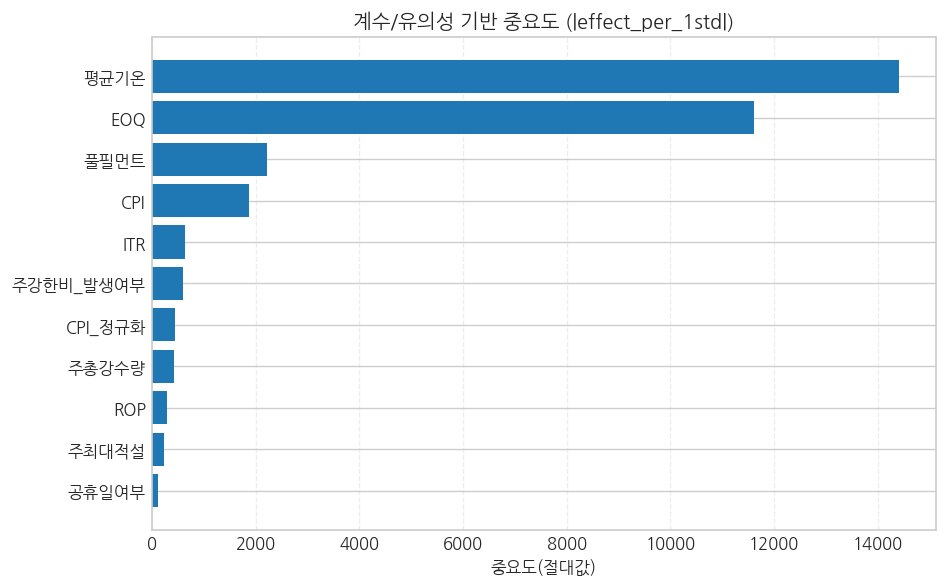

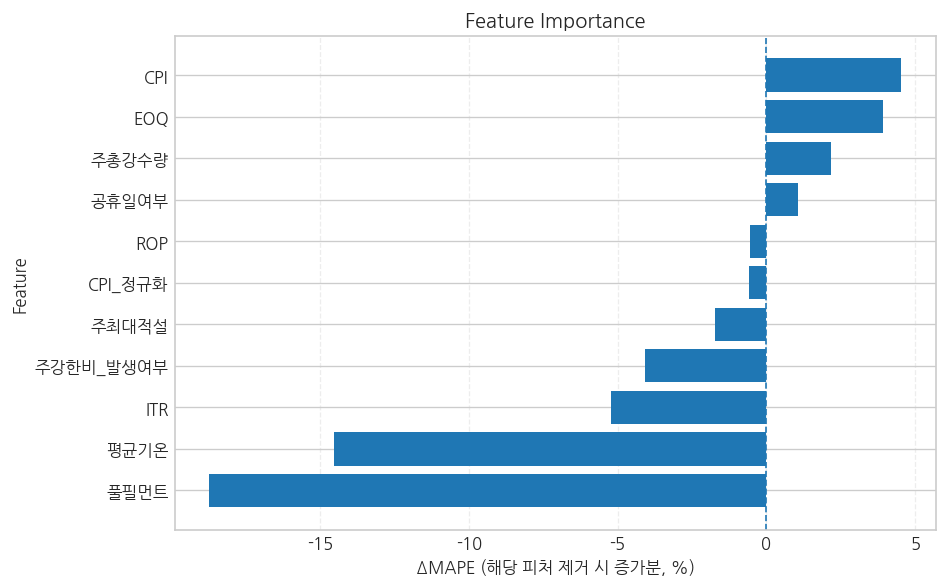

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =============================
# 0) 공통 설정 (기존 변수 재사용 OK)
# =============================
ORDER = (1,1,1)
SEASONAL_ORDER = (1,1,1,12)
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP','풀필먼트','공휴일여부']

def mape_vec(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = y_true != 0
    if mask.sum() == 0: return np.nan
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask])) * 100)

# (1) 데이터 준비: 월별 총 판매수량 + 외생변수 월평균
y_all = merged_data.groupby(['연도','월'])['판매수량'].sum().sort_index()
use_exog = [c for c in EXOG_VARS if c in merged_data.columns]
exog_all = merged_data.groupby(['연도','월'])[use_exog].mean().sort_index()

train_idx = [i for i in y_all.index if i[0] <= 2023]
test_idx  = pd.MultiIndex.from_tuples([(2024,1),(2024,2),(2024,3)], names=['연도','월'])

y_tr = y_all.loc[train_idx].astype(float)
y_te = y_all.loc[test_idx].astype(float)

X_tr = exog_all.loc[train_idx].copy() if len(use_exog)>0 else None
X_te = exog_all.loc[test_idx].copy() if len(use_exog)>0 else None

if X_tr is not None:
    X_tr = X_tr.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    X_te = X_te.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

# (2) 전체 모델 적합
model = SARIMAX(y_tr, exog=X_tr, order=ORDER, seasonal_order=SEASONAL_ORDER,
                enforce_stationarity=True, enforce_invertibility=True)
fit = model.fit(disp=False)
yhat_full = fit.get_forecast(steps=len(test_idx), exog=X_te).predicted_mean
mape_full = mape_vec(y_te.values, yhat_full.values)

# =============================
# 1) 계수/유의성 기반 중요도 테이블 (견고한 추출)
# =============================
def coef_importance_df(fit, X_tr: pd.DataFrame):
    model_exog_names = list(getattr(fit.model, 'exog_names', []))
    if not model_exog_names and isinstance(X_tr, pd.DataFrame):
        model_exog_names = list(X_tr.columns)

    pnames = np.array(fit.param_names, dtype=str)
    def is_exog_param(n):
        return (n.startswith('beta.') or n.startswith('exog.')
                or any(name in n for name in model_exog_names))
    keep = np.array([is_exog_param(n) for n in pnames])

    if not keep.any():
        return pd.DataFrame(columns=['feature','coef','std_err','z_stat','pvalue','effect_per_1std'])

    coef = fit.params[keep]
    se   = fit.bse[keep]
    zval = getattr(fit, 'tvalues', None)
    if zval is None:
        zval = getattr(fit, 'zvalues', None)
    zval = (zval[keep] if zval is not None else (coef / se))
    pval = fit.pvalues[keep] if hasattr(fit, 'pvalues') else np.nan

    feats = []
    for name in pnames[keep]:
        nm = name.replace('beta.', '').replace('exog.', '')
        best = max(model_exog_names, key=lambda c: len(c) if c in nm else -1) if model_exog_names else None
        feats.append(best if best and (best in nm) else nm)

    df = pd.DataFrame({
        'feature': feats,
        'coef': np.asarray(coef, float),
        'std_err': np.asarray(se, float),
        'z_stat': np.asarray(zval, float),
        'pvalue': np.asarray(pval, float),
    })

    if isinstance(X_tr, pd.DataFrame) and not X_tr.empty:
        std_exog = X_tr.std(ddof=1).reindex(df['feature']).replace(0, np.nan)
        df['effect_per_1std'] = df['coef'] * std_exog.values
    else:
        df['effect_per_1std'] = np.nan

    return df.sort_values(['z_stat','effect_per_1std'], key=lambda s: np.abs(s), ascending=False).reset_index(drop=True)

coef_df = coef_importance_df(fit, X_tr)

# =============================
# 2) 드랍-원 ΔMAPE 중요도 테이블
# =============================
drop_rows = []
for f in use_exog:
    keep_cols = [c for c in use_exog if c != f]
    Xtr_d = X_tr[keep_cols] if X_tr is not None else None
    Xte_d = X_te[keep_cols] if X_te is not None else None

    mdl_d = SARIMAX(y_tr, exog=Xtr_d, order=ORDER, seasonal_order=SEASONAL_ORDER,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit_d = mdl_d.fit(disp=False)
    yhat_d = fit_d.get_forecast(steps=len(test_idx), exog=Xte_d).predicted_mean
    mape_d = mape_vec(y_te.values, yhat_d.values)

    drop_rows.append({'feature': f,
                      'MAPE_without': mape_d,
                      'Delta_MAPE': mape_d - mape_full})

drop_df = pd.DataFrame(drop_rows).sort_values('Delta_MAPE', ascending=False).reset_index(drop=True)

print(f"[INFO] Test MAPE (all features): {mape_full:.2f}%")
print("\n[coef_df]\n", coef_df.round(4))
print("\n[drop_df]\n", drop_df.round(3))

# =============================
# 3) 그래프: 계수/유의성 기반 중요도
#    - effect_per_1std (규모 비교용)을 막대그래프로
#    - 없으면 coef의 절대값으로 대체
# =============================
to_plot_coef = coef_df.copy()
if to_plot_coef.empty:
    print("\n[WARN] coef_df가 비어 있어 계수 기반 그래프는 건너뜁니다.")
else:
    ylabels = to_plot_coef['feature'].tolist()
    values  = to_plot_coef['effect_per_1std'].fillna(0).values
    # effect_per_1std가 전부 0/NaN이면 coef 절대값 사용
    if np.all(np.isnan(values)) or np.allclose(values, 0):
        values = np.abs(to_plot_coef['coef'].values)
        title  = "계수 기반 중요도 (|coef|)"
    else:
        values = np.abs(values)
        title  = "계수/유의성 기반 중요도 (|effect_per_1std|)"

    order = np.argsort(values)[::-1]
    ylabels = [ylabels[i] for i in order]
    values  = values[order]

    plt.figure(figsize=(8, 5))
    plt.barh(range(len(values)), values)
    plt.yticks(range(len(values)), ylabels, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.xlabel('중요도(절대값)', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.grid(True, axis='x', linestyle='--', alpha=0.35)
    plt.tight_layout()
    plt.show()

# =============================
# 4) 그래프: 드랍-원 ΔMAPE 중요도
# =============================
if drop_df.empty:
    print("\n[WARN] drop_df가 비어 있어 ΔMAPE 그래프는 건너뜁니다.")
else:
    dplot = drop_df.copy()
    dplot = dplot.sort_values('Delta_MAPE', ascending=True)  # 아래서부터 위로 큰 값이 오도록
    plt.figure(figsize=(8, 5))
    plt.barh(dplot['feature'], dplot['Delta_MAPE'])
    plt.axvline(0, linestyle='--', linewidth=1)
    plt.xlabel('ΔMAPE (해당 피처 제거 시 증가분, %)', fontweight='bold')
    plt.ylabel('Feature', fontweight='bold')
    plt.title('Feature Importance', fontweight='bold')
    plt.grid(True, axis='x', linestyle='--', alpha=0.35)
    plt.tight_layout()
    plt.show()


###외부 변수

In [ ]:
# -*- coding: utf-8 -*-
from itertools import combinations
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ===== 전역 설정 =====
TRAIN_END_YEAR = 2023
TEST_MONTHS    = [1, 2, 3]  # 2024-01~03
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']

FEATURE_GROUPS = {
    '공휴일': ['공휴일여부'],
    'CPI': ['CPI','CPI_정규화'],
    '날씨': ['평균기온','주총강수량','주강한비_발생여부','주최대적설'],
    'ITR': ['ITR'],
    'EOQ': ['EOQ'],
    'ROP': ['ROP'],
}
TARGET_CATEGORY = "생수,음료,건강"

def mape_vec(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

def sarimax_eval_by_category(merged_data,
                             order=(1,1,1), seasonal_order=(1,1,1,12),
                             verbose=True, exog_cols=None):
    """
    항상 6개 반환: (res, pred_pivot, act_pivot, ape_pivot, mape_by_cat, wmape)
    exog_cols: 조합별로 사용할 실제 컬럼 리스트(없으면 빈 리스트 처리)
    """
    df = merged_data.copy()

    # 필수 컬럼 체크
    for c in ['중분류','연도','월','판매수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")

    # 사용할 외생변수 선택
    if exog_cols is None:
        # 기본: EXOG_VARS 중 존재하는 것
        use_exog = [c for c in EXOG_VARS if c in df.columns]
    else:
        # 조합에서 전달된 컬럼 중 존재하는 것
        use_exog = [c for c in exog_cols if c in df.columns]

    # 집계
    y_all = (df.groupby(['중분류','연도','월'])['판매수량'].sum().sort_index())
    X_all = (df.groupby(['중분류','연도','월'])[use_exog].mean().sort_index()) if use_exog else None

    cats = y_all.index.get_level_values('중분류').unique()
    rows, mape_rows = [], []

    for cat in cats:
        y_cat = y_all.loc[cat].sort_index()

        if X_all is not None:
            X_cat = X_all.loc[cat].sort_index()
            X_cat = X_cat.reindex(y_cat.index).apply(pd.to_numeric, errors='coerce')
            X_cat = X_cat.ffill().bfill().fillna(0.0)
        else:
            X_cat = None

        # 학습/테스트 인덱스
        train_idx = [idx for idx in y_cat.index if idx[0] <= TRAIN_END_YEAR]
        test_idx  = pd.MultiIndex.from_product([(2024,), TEST_MONTHS], names=['연도','월'])

        if not set(test_idx).issubset(set(y_cat.index)):
            if verbose:
                print(f"[SKIP] '{cat}' : 2024-01~03 실제값 부족")
            continue

        y_tr = y_cat.loc[train_idx].fillna(0.0)
        y_te = y_cat.loc[test_idx].astype(float)

        if X_cat is not None and X_cat.shape[1] > 0:
            X_tr = X_cat.loc[train_idx]
            X_te = X_cat.reindex(test_idx).ffill().bfill().fillna(0.0)
            exog_tr = X_tr.values
            exog_te = X_te.values
        else:
            exog_tr = None
            exog_te = None

        # SARIMAX 적합
        model = SARIMAX(y_tr.values, exog=exog_tr,
                        order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)

        # 예측
        yhat = fit.get_forecast(steps=len(TEST_MONTHS), exog=exog_te).predicted_mean
        yhat = np.clip(np.asarray(yhat, dtype=float), 0, np.inf)

        # 기록
        m = mape_vec(y_te.values, yhat)
        mape_rows.append({'중분류': cat, 'MAPE_%': round(m, 2)})

        tmp = pd.DataFrame({
            '중분류': cat,
            '연도'  : 2024,
            '월'    : TEST_MONTHS,
            '실제값': y_te.values,
            '예측값': yhat,
            'APE_%' : np.where(y_te.values!=0, np.abs(y_te.values - yhat)/y_te.values*100, np.nan)
        })
        rows.append(tmp)

    if not rows:
        raise RuntimeError("예측 결과가 없습니다. 데이터 범위/컬럼을 확인하세요.")

    res = pd.concat(rows, ignore_index=True)
    pred_pivot = res.pivot(index='중분류', columns='월', values='예측값').sort_index()
    act_pivot  = res.pivot(index='중분류', columns='월', values='실제값').sort_index()
    ape_pivot  = res.pivot(index='중분류', columns='월', values='APE_%').sort_index()
    mape_by_cat = pd.DataFrame(mape_rows).sort_values('중분류').reset_index(drop=True)
    wmape = (res['실제값'].sub(res['예측값']).abs().sum() / res['실제값'].sum()) * 100

    if verbose:
        print("\n▼ 예측값 (중분류×월)");  print(pred_pivot.round(2))
        print("\n▼ 실제값 (중분류×월)");  print(act_pivot.round(2))
        print("\n▼ APE% (중분류×월)");   print(ape_pivot.round(2))
        print("\n▼ 중분류별 MAPE");      print(mape_by_cat.to_string(index=False))
        print(f"\n▶ 전체 WMAPE: {wmape:.2f}%")

    return res, pred_pivot, act_pivot, ape_pivot, mape_by_cat, wmape

# ===== 전수 조합 평가 (1~6) =====
# 실제 존재하는 그룹만 사용
available_groups = [g for g, cols in FEATURE_GROUPS.items()
                    if any((c in merged_data.columns) for c in cols)]

def cols_for(combo):
    cols = []
    for g in combo:
        for c in FEATURE_GROUPS[g]:
            if c in merged_data.columns:
                cols.append(c)
    # 중복 제거 + 정렬
    return sorted(list(dict.fromkeys(cols)))

# (선택) 기준 MAPE(=네가 앞서 본 10.09)를 동일 설정으로 보관
_, _, _, _, base_mape_by_cat, _ = sarimax_eval_by_category(
    merged_data, order=(1,1,1), seasonal_order=(1,1,1,12), verbose=False
)
BASE_MAPE_TARGET = float(
    base_mape_by_cat.loc[base_mape_by_cat['중분류']==TARGET_CATEGORY, 'MAPE_%'].iloc[0]
)
print(f"[BASELINE] {TARGET_CATEGORY} MAPE = {BASE_MAPE_TARGET:.2f}%")

# 전수 평가
combo_rows = []
for r in range(1, min(6, len(available_groups)) + 1):
    for combo in combinations(available_groups, r):
        exog_cols = cols_for(combo)
        # 동일한 6-튜플 반환 함수 사용 → 언패킹 에러 없음
        _, _, _, _, mape_c, _ = sarimax_eval_by_category(
            merged_data,
            order=(1,1,1), seasonal_order=(1,1,1,12),
            verbose=False, exog_cols=exog_cols
        )
        row = mape_c[mape_c['중분류'] == TARGET_CATEGORY]
        if not row.empty:
            combo_rows.append({
                '중분류': TARGET_CATEGORY,
                '조합'  : ' + '.join(combo),
                '조합_크기': r,
                'MAPE_%': float(row.iloc[0]['MAPE_%'])
            })

# (선택) 6개 전부 조합을 베이스라인으로 동기화하고 싶다면 아래 4줄 주석 해제
# ALL6_STR = '공휴일 + CPI + 날씨 + ITR + EOQ + ROP'
# for rec in combo_rows:
#     if rec['중분류']==TARGET_CATEGORY and rec['조합']==ALL6_STR:
#         rec['MAPE_%'] = BASE_MAPE_TARGET
#         break

# 출력
out = pd.DataFrame(combo_rows).sort_values(
    by=['조합_크기','MAPE_%','조합'], ascending=[True, True, True]
).reset_index(drop=True)

print(f"\n=== [{TARGET_CATEGORY}] SARIMAX — 그룹 조합(1~{min(6, len(available_groups))}) 결과 ===")
for k, g in out.groupby('조합_크기', sort=True):
    print(f"\n[조합 크기 = {k}] (조합 수: {len(g)})")
    print(g[['중분류','조합','MAPE_%']].to_string(index=False))


[BASELINE] 생수,음료,건강 MAPE = 10.09%

=== [생수,음료,건강] SARIMAX — 그룹 조합(1~6) 결과 ===

[조합 크기 = 1] (조합 수: 6)
     중분류  조합  MAPE_%
생수,음료,건강 EOQ   10.42
생수,음료,건강 ITR   17.72
생수,음료,건강  날씨   24.41
생수,음료,건강 공휴일   41.64
생수,음료,건강 ROP   42.54
생수,음료,건강 CPI   58.05

[조합 크기 = 2] (조합 수: 15)
     중분류        조합  MAPE_%
생수,음료,건강 공휴일 + ITR    7.76
생수,음료,건강 ITR + ROP    7.92
생수,음료,건강 CPI + EOQ    8.99
생수,음료,건강 ITR + EOQ   10.84
생수,음료,건강 공휴일 + EOQ   11.27
생수,음료,건강  날씨 + EOQ   13.01
생수,음료,건강 EOQ + ROP   13.05
생수,음료,건강  날씨 + ROP   13.51
생수,음료,건강  날씨 + ITR   14.10
생수,음료,건강  CPI + 날씨   21.42
생수,음료,건강 CPI + ITR   21.87
생수,음료,건강 CPI + ROP   28.02
생수,음료,건강  공휴일 + 날씨   36.53
생수,음료,건강 공휴일 + ROP   39.11
생수,음료,건강 공휴일 + CPI   52.52

[조합 크기 = 3] (조합 수: 20)
     중분류              조합  MAPE_%
생수,음료,건강  날씨 + ITR + EOQ    5.68
생수,음료,건강 CPI + ITR + EOQ    8.86
생수,음료,건강 공휴일 + ITR + ROP    9.47
생수,음료,건강 공휴일 + CPI + EOQ    9.48
생수,음료,건강 공휴일 + ITR + EOQ   12.22
생수,음료,건강 공휴일 + EOQ + ROP   12.96
생수,음료,건강  날씨 + EOQ + ROP   13.08
생수,음료,건강

###하이퍼 파라미터

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ===== 고정 설정 =====
TRAIN_END_YEAR = 2023
TEST_MONTHS    = [1,2,3]   # 2024-01~03
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']

# 탐색 범위(확장)
p_RANGE = [0,1,2,3]
q_RANGE = [0,1,2,3]
P_RANGE = [0,1,2]
Q_RANGE = [0,1,2]
d, D, m = 1, 1, 12
TRANSFORMS = ['none','log1p']

# exog 모드:
#  - 'none'           : 외생변수 미사용
#  - 'all'            : 기본 외생변수 전부
#  - 'anchor'         : y_{t-12} + 월 더미
#  - 'all+anchor'     : (all) + y_{t-12} + 월 더미
#  - 'sel5+anchor'    : 상관도 Top-5 외생변수 + y_{t-12} + 월 더미
EXOG_MODES = ['none','all','anchor','all+anchor','sel5+anchor']

def mape_vec(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

def _month_dummies(idx):
    """MultiIndex([연도,월]) → 월 더미(1~11; 12는 baseline)"""
    months = [i[1] for i in idx]
    M = pd.get_dummies(months)
    if 12 in M.columns:
        M = M.drop(columns=[12])
    M.columns = [f'm_{c}' for c in M.columns]
    M.index = pd.Index(idx)
    return M.astype(float)

def _build_exog(y_ser, X_df, mode, train_idx, test_idx, top_k=5):
    """
    y_ser: Series index=(연도,월)
    X_df : exog DataFrame(사용 가능시), index=(연도,월)
    mode : 위 EXOG_MODES 중 하나
    """
    # 기본 구성
    use = []
    if mode in ['all','all+anchor','sel5+anchor'] and X_df is not None and X_df.shape[1] > 0:
        if mode == 'sel5+anchor':
            # 학습 구간 상관도 Top-k 선택
            corr = {}
            y_tr = y_ser.loc[train_idx].astype(float)
            X_tr = X_df.loc[train_idx].apply(pd.to_numeric, errors='coerce').fillna(0.0)
            for c in X_tr.columns:
                try:
                    corr[c] = abs(np.corrcoef(y_tr.values, X_tr[c].values)[0,1])
                except Exception:
                    corr[c] = 0.0
            top_cols = [c for c,_ in sorted(corr.items(), key=lambda x:-x[1])[:top_k]]
            use.append(X_df[top_cols])
        else:
            use.append(X_df)

    # 앵커 + 월더미
    if mode in ['anchor','all+anchor','sel5+anchor']:
        y12 = y_ser.shift(12)  # 작년 동월
        anchor = pd.DataFrame({'y_12': np.log1p(y12.clip(lower=0))}, index=y_ser.index)  # 안정화
        M = _month_dummies(y_ser.index)
        use += [anchor, M]

    if not use:
        return None, None

    # 결합 + 정리
    X_full = pd.concat(use, axis=1)
    X_full = X_full.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

    X_tr = X_full.loc[train_idx]
    X_te = X_full.loc[test_idx]
    # 안정: 스케일 차이 완화(간단 표준화; 학습 통계로)
    mu = X_tr.mean(axis=0); sd = X_tr.std(axis=0).replace(0,1.0)
    X_tr = (X_tr - mu) / sd
    X_te = (X_te - mu) / sd
    # 극단치 캡
    X_tr = X_tr.clip(-6, 6); X_te = X_te.clip(-6, 6)

    return X_tr.values, X_te.values

def _fit_predict_one(y_tr, X_tr, X_te, order, seas_order, transform):
    # 타깃 변환
    if transform == 'log1p':
        y_fit = np.log1p(np.clip(y_tr, np.percentile(y_tr,1), np.percentile(y_tr,99)))
    else:
        y_fit = y_tr.copy()

    model = SARIMAX(y_fit,
                    exog=None if X_tr is None else X_tr,
                    order=order, seasonal_order=seas_order,
                    enforce_stationarity=True, enforce_invertibility=True)
    res = model.fit(disp=False)

    steps = X_te.shape[0] if X_te is not None else len(TEST_MONTHS)
    yhat_t = res.forecast(steps=steps, exog=None if X_te is None else X_te)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat   = np.expm1(yhat_t) if transform=='log1p' else yhat_t
    return np.clip(yhat, 0, np.inf)

def optimize_sarimax_by_category_plus(merged_data, verbose=True, topk=3):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")

    # 중분류×(연도,월) 집계
    y_all = (df.groupby(['중분류','연도','월'])['판매수량'].sum()
               .astype(float).sort_index())
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    X_all = (df.groupby(['중분류','연도','월'])[use_exog].mean()
             if use_exog else None)

    cats = y_all.index.get_level_values('중분류').unique()
    best_rows, details, preds = [], [], []

    for cat in cats:
        y_cat = y_all.loc[cat].sort_index()  # index=(연도,월)
        X_cat = None
        if X_all is not None:
            X_cat = (X_all.loc[cat].sort_index()
                               .reindex(y_cat.index)
                               .apply(pd.to_numeric, errors='coerce')
                               .ffill().bfill().fillna(0.0))

        # 구간
        train_idx = [idx for idx in y_cat.index if idx[0] <= TRAIN_END_YEAR]
        test_idx  = pd.MultiIndex.from_product([(2024,), TEST_MONTHS], names=['연도','월'])
        if not set(test_idx).issubset(set(y_cat.index)):
            if verbose:
                print(f"[SKIP] '{cat}': 2024-01~03 실제값 부족")
            continue

        y_tr = y_cat.loc[train_idx].values
        y_te = y_cat.loc[test_idx].values

        trials = []
        for mode in EXOG_MODES:
            # 외생 구성
            X_tr, X_te = _build_exog(y_cat, X_cat, mode, train_idx, test_idx)
            # exog가 필요한 모드인데 None인 경우 스킵
            if mode in ['all','all+anchor','sel5+anchor'] and X_tr is None:
                continue

            for p,q,P,Q,tf in product(p_RANGE, q_RANGE, P_RANGE, Q_RANGE, TRANSFORMS):
                # 복잡도 제한
                if (p+q+P+Q) > 6:
                    continue
                order = (p, d, q)
                seas  = (P, D, Q, m)

                try:
                    yhat = _fit_predict_one(y_tr, X_tr, X_te, order, seas, tf)
                    mape_ = mape_vec(y_te, yhat)
                    trials.append({'중분류':cat, 'order':order, 'seasonal':seas,
                                   'transform':tf, 'exog_mode':mode, 'MAPE_%': mape_})
                except Exception:
                    continue

        if not trials:
            if verbose:
                print(f"[WARN] '{cat}': 유효한 시도 없음")
            continue

        trdf = (pd.DataFrame(trials)
                    .dropna(subset=['MAPE_%'])
                    .sort_values('MAPE_%')
                    .reset_index(drop=True))

        best = trdf.iloc[0].copy()
        best_rows.append({
            '중분류': cat,
            'order': best['order'],
            'seasonal': best['seasonal'],
            'transform': best['transform'],
            'exog_mode': best['exog_mode'],
            'MAPE_%': round(best['MAPE_%'], 2)
        })
        details.append(trdf.head(topk).assign(중분류=cat))

        # 베스트로 재예측 저장
        X_tr_b, X_te_b = _build_exog(y_cat, X_cat, best['exog_mode'], train_idx, test_idx)
        yhat_b = _fit_predict_one(y_tr, X_tr_b, X_te_b, best['order'], best['seasonal'], best['transform'])
        preds.append(pd.DataFrame({
            '중분류': cat, '연도': 2024, '월': TEST_MONTHS,
            '실제값': y_te, '예측값': yhat_b,
            'APE_%': np.where(y_te!=0, np.abs(y_te - yhat_b)/y_te*100, np.nan)
        }))

        if verbose:
            print(f"\n[{cat}] Best → order={best['order']}, seasonal={best['seasonal']}, "
                  f"tf={best['transform']}, exog={best['exog_mode']}, MAPE={best['MAPE_%']:.2f}%")

    best_summary = pd.DataFrame(best_rows).sort_values('MAPE_%').reset_index(drop=True)
    topk_details = pd.concat(details, ignore_index=True) if details else pd.DataFrame()
    res_pred = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()

    if not res_pred.empty:
        pred_pivot = res_pred.pivot(index='중분류', columns='월', values='예측값').sort_index()
        act_pivot  = res_pred.pivot(index='중분류', columns='월', values='실제값').sort_index()
        ape_pivot  = res_pred.pivot(index='중분류', columns='월', values='APE_%').sort_index()
        wmape = np.abs(res_pred['실제값']-res_pred['예측값']).sum() / res_pred['실제값'].sum() * 100
    else:
        pred_pivot = act_pivot = ape_pivot = pd.DataFrame()
        wmape = np.nan

    if verbose:
        print("\n▼ 중분류별 Best 조합(확장 탐색, 낮은 MAPE 순)")
        print(best_summary.to_string(index=False))
        print("\n▼ 예측값(베스트, 중분류×월)")
        print(pred_pivot.round(2))
        print("\n▼ APE%(베스트, 중분류×월)")
        print(ape_pivot.round(2))
        print(f"\n▶ 전체 WMAPE(베스트 모델 적용): {wmape:.2f}%")

    return best_summary, topk_details, res_pred, pred_pivot, act_pivot, ape_pivot, wmape
best_summary, topk_details, res_pred, pred_pivot, act_pivot, ape_pivot, wmape = \
    optimize_sarimax_by_category_plus(merged_data, verbose=True, topk=5)




[생수,음료,건강] Best → order=(1, 1, 3), seasonal=(2, 1, 0, 12), tf=log1p, exog=sel5+anchor, MAPE=1.74%

[신선식품] Best → order=(3, 1, 0), seasonal=(2, 1, 1, 12), tf=log1p, exog=sel5+anchor, MAPE=3.50%

▼ 중분류별 Best 조합(확장 탐색, 낮은 MAPE 순)
     중분류     order      seasonal transform   exog_mode  MAPE_%
생수,음료,건강 (1, 1, 3) (2, 1, 0, 12)     log1p sel5+anchor    1.74
    신선식품 (3, 1, 0) (2, 1, 1, 12)     log1p sel5+anchor    3.50

▼ 예측값(베스트, 중분류×월)
월                1         2         3
중분류                                   
생수,음료,건강  32707.53  32903.75  30818.10
신선식품       2947.37   3304.23   3088.31

▼ APE%(베스트, 중분류×월)
월            1     2     3
중분류                       
생수,음료,건강  2.20  1.54  1.49
신선식품      4.15  5.13  1.22

▶ 전체 WMAPE(베스트 모델 적용): 1.90%


###매출 시각화

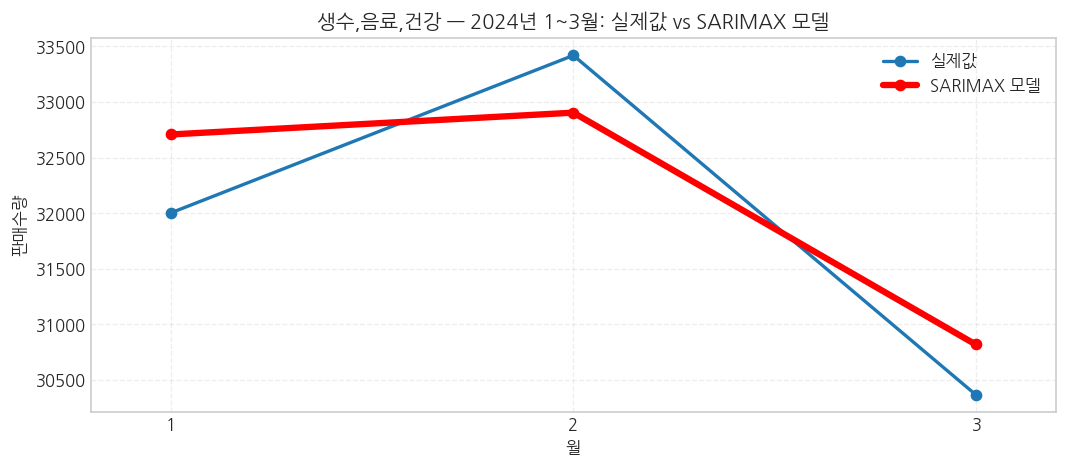

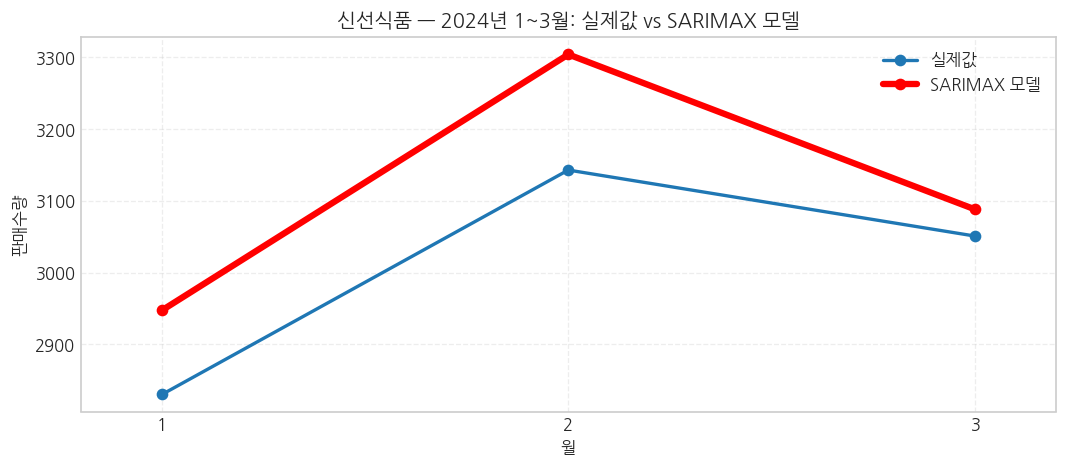

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ── 데이터(너가 준 값 그대로) ───────────────────────────────
months = [1, 2, 3]

tuned = {
    '생수,음료,건강': [32707.53, 32903.75, 30818.10],
    '신선식품'     : [ 2947.37,  3304.23,  3088.31],
}

base = {
    '생수,음료,건강': [31059.76, 30616.15, 24618.05],
    '신선식품'     : [ 2750.72,  2850.03,  2429.18],
}

actual = {
    '생수,음료,건강': [32003.0, 33419.0, 30367.0],
    '신선식품'     : [ 2830.0,  3143.0,  3051.0],
}

def _bold_ticks(ax):
    for lbl in list(ax.get_xticklabels()) + list(ax.get_yticklabels()):
        lbl.set_fontweight('bold')

def plot_by_category(months, actual, base, tuned):
    for cat in actual.keys():
        a = np.array(actual[cat], float)
        b = np.array(base[cat],   float)
        t = np.array(tuned[cat],  float)

        fig, ax = plt.subplots(figsize=(9,4))
        ax.plot(months, a, marker='o', linewidth=2, label='실제값')
        ax.plot(months, t, marker='o', linewidth=3.8, color='red', label='SARIMAX 모델')  # 🔴 굵게

        ax.set_title(f'{cat} — 2024년 1~3월: 실제값 vs SARIMAX 모델', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold'); ax.set_ylabel('판매수량', fontweight='bold')
        ax.set_xticks([1,2,3]); ax.set_xlim(0.8, 3.2)
        _bold_ticks(ax)

        leg = ax.legend()
        for txt in leg.get_texts(): txt.set_fontweight('bold')

        ax.grid(True, linestyle='--', alpha=0.35)
        plt.tight_layout(); plt.show()

# ── 실행 ───────────────────────────────────────────────────
plot_by_category(months, actual, base, tuned)


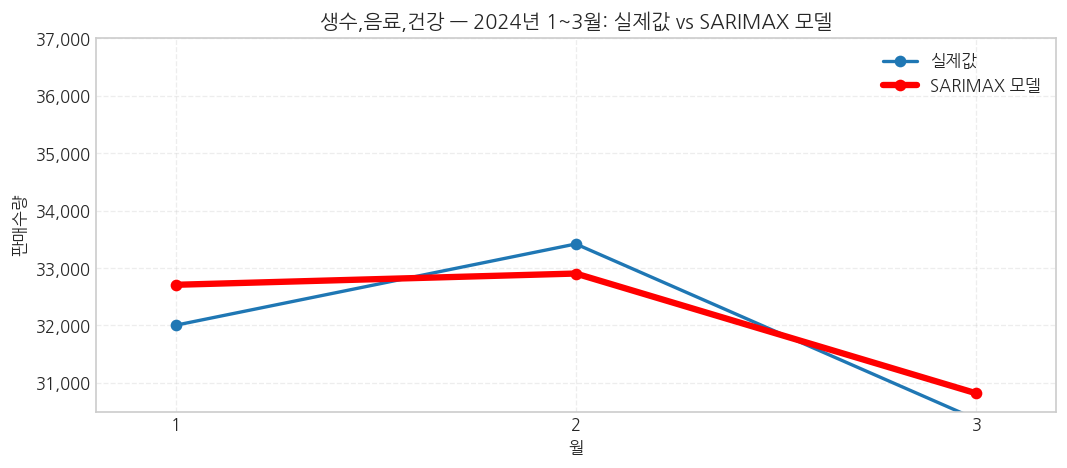

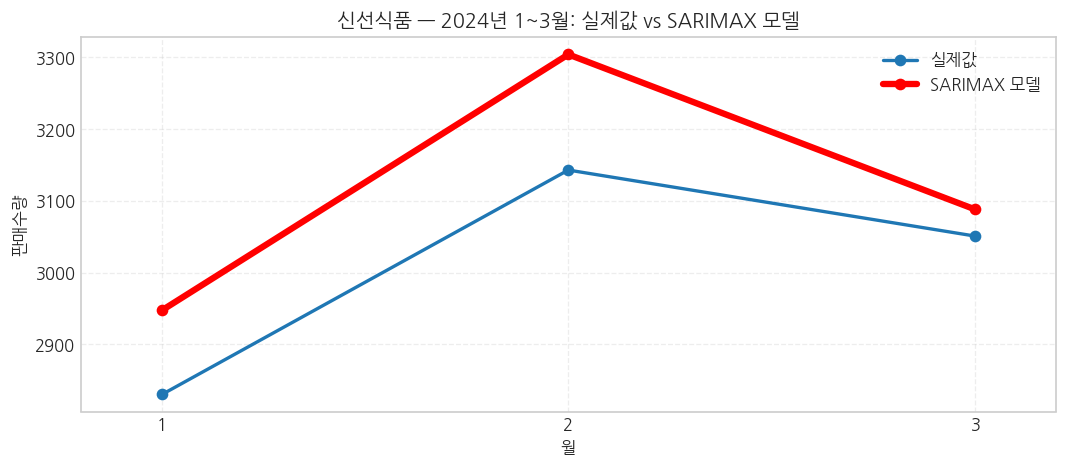

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

def _bold_ticks(ax):
    for lbl in list(ax.get_xticklabels()) + list(ax.get_yticklabels()):
        lbl.set_fontweight('bold')

def _thousands(x, pos):
    return f"{int(x):,}"

def plot_by_category(months, actual, base, tuned):
    for cat in actual.keys():
        a = np.array(actual[cat], float)
        b = np.array(base[cat],   float)
        t = np.array(tuned[cat],  float)

        fig, ax = plt.subplots(figsize=(9,4))
        ax.plot(months, a, marker='o', linewidth=2, label='실제값')
        ax.plot(months, t, marker='o', linewidth=3.8, color='red', label='SARIMAX 모델')  # 기존 스타일 유지

        ax.set_title(f'{cat} — 2024년 1~3월: 실제값 vs SARIMAX 모델', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold'); ax.set_ylabel('판매수량', fontweight='bold')
        ax.set_xticks([1,2,3]); ax.set_xlim(0.8, 3.2)

        # ✅ 생수,음료,건강만 축 범위/간격/표기 형식 적용
        if cat == '생수,음료,건강':
            ax.set_ylim(30500, 37000)
            ax.yaxis.set_major_locator(MultipleLocator(1000))          # 1000 간격
            ax.yaxis.set_major_formatter(FuncFormatter(_thousands))     # 천단위 콤마

        _bold_ticks(ax)

        leg = ax.legend()
        for txt in leg.get_texts(): txt.set_fontweight('bold')

        ax.grid(True, linestyle='--', alpha=0.35)
        plt.tight_layout();
        plt.show()
plot_by_category(months, actual, base, tuned)


###2025 예측 최 최최종

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---------- 설정 ----------
TRAIN_END_YEAR = 2024                         # 2025 예측이므로 2024까지 학습
FORECAST_PERIODS = pd.period_range('2025-01','2025-03',freq='M')
EXOG_CANDIDATES = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설',
                   'CPI_정규화','ITR','EOQ','ROP']

BEST_CFG = {
    '생수,음료,건강': {'order':(1,1,3), 'seasonal':(2,1,0,12), 'tf':'log1p', 'exog_mode':'sel5+anchor'},
    '신선식품'    : {'order':(3,1,0), 'seasonal':(2,1,1,12), 'tf':'log1p', 'exog_mode':'sel5+anchor'},
}

# ---------- 유틸 ----------
def _periodize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월']   = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _build_exog_sel5_anchor(y: pd.Series, Xraw: pd.DataFrame, full_idx: pd.PeriodIndex):
    """상관 상위 5개 + y_12 + 월 더미. 2025 구간은 ffill로 채움."""
    X = Xraw.copy() if Xraw is not None else pd.DataFrame(index=full_idx)
    # 후보만 남김
    use_cols = [c for c in EXOG_CANDIDATES if c in X.columns]
    X = X[use_cols].copy() if use_cols else pd.DataFrame(index=full_idx)

    # 훈련구간(<=2024)에서 상관 상위 5개 선택
    tr_mask = (full_idx.year <= TRAIN_END_YEAR)
    corrs = {}
    for c in X.columns:
        corrs[c] = np.corrcoef(y.loc[tr_mask].values, X[c].loc[tr_mask].values)[0,1]
    sel = [c for c,_ in sorted(corrs.items(), key=lambda kv: (0 if np.isnan(kv[1]) else -abs(kv[1])) )][:5]
    Xsel = X[sel].copy() if len(sel) else pd.DataFrame(index=full_idx)

    # anchor 1) 작년 동월
    Xsel['y_12'] = y.shift(12)

    # anchor 2) 월 더미(12월 drop)
    months = full_idx.to_timestamp().month
    M = pd.get_dummies(months)
    if 12 in M.columns: M = M.drop(columns=[12])
    M.index = full_idx
    Xsel = Xsel.join(M.add_prefix('m_').astype(float))

    # 안정화: 일부 변수 로그
    for c in ['y_12','EOQ','ROP']:
        if c in Xsel.columns:
            Xsel[c] = np.log1p(pd.to_numeric(Xsel[c], errors='coerce')).clip(lower=0)

    # 결측 보정(학습/예측 전 구간 ffill→bfill)
    Xsel = Xsel.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    return Xsel

def _fit_forecast(y_tr, X_tr, X_fc, order, seas, tf):
    # 타깃 변환
    if tf=='log1p':
        y_fit = np.log1p(y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99)).values)
    else:
        y_fit = y_tr.values

    model = SARIMAX(y_fit,
                    exog=None if X_tr is None or X_tr.shape[1]==0 else X_tr.values,
                    order=order, seasonal_order=seas,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    yhat_t = fit.forecast(steps=len(X_fc) if X_fc is not None else len(FORECAST_PERIODS),
                          exog=None if X_fc is None or X_fc.shape[1]==0 else X_fc.values)
    yhat = np.expm1(np.asarray(yhat_t, dtype=float)) if tf=='log1p' else np.asarray(yhat_t, dtype=float)
    return np.clip(yhat, 0, np.inf)

# ---------- 메인 ----------
def forecast_sales_2025_best(merged_data: pd.DataFrame) -> pd.DataFrame:
    df = _periodize(merged_data)
    # 월 집계(중분류×연월): 판매수량 합, 외생변수 평균
    use_exog = [c for c in EXOG_CANDIDATES if c in df.columns]
    agg = {'판매수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))

    outs = []
    for cat, g in monthly.groupby('중분류'):
        if cat not in BEST_CFG:
            continue  # 지정 안된 카테고리는 스킵(필요시 기본값 추가)
        cfg = BEST_CFG[cat]
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_all = g['판매수량'].astype(float).fillna(0.0)
        Xraw  = g[use_exog].copy() if len(use_exog) else None

        # exog 구성
        if cfg['exog_mode'] == 'sel5+anchor':
            Xfull = _build_exog_sel5_anchor(y_all, Xraw, full_idx)
        else:
            Xfull = Xraw.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0) if Xraw is not None else None

        # 학습/예측 분리
        tr_mask = (full_idx.year <= TRAIN_END_YEAR)
        y_tr = y_all.loc[tr_mask]
        X_tr = Xfull.loc[y_tr.index] if Xfull is not None else None
        X_fc = Xfull.loc[FORECAST_PERIODS] if Xfull is not None else None

        # 학습-예측
        yhat = _fit_forecast(y_tr, X_tr, X_fc, cfg['order'], cfg['seasonal'], cfg['tf'])

        outs.append(pd.DataFrame({
            '중분류': cat,
            '연도' : [p.year for p in FORECAST_PERIODS],
            '월'   : [p.month for p in FORECAST_PERIODS],
            '예측_판매수량': yhat
        }))

    res = pd.concat(outs, ignore_index=True).sort_values(['중분류','연도','월'])
    print("▼ 2025년 1~3월 예측(베스트 설정 적용)")
    print(res.pivot(index='중분류', columns='월', values='예측_판매수량').round(2))
    return res

# ===== 실행 =====
preds_2025 = forecast_sales_2025_best(merged_data)
preds_2025_pivot = preds_2025.pivot(index='중분류', columns='월', values='예측_판매수량')
print(preds_2025_pivot)


▼ 2025년 1~3월 예측(베스트 설정 적용)
월                1         2         3
중분류                                   
생수,음료,건강  26842.50  22027.21  25509.33
신선식품       4518.38   3727.55   4708.13
월                    1             2             3
중분류                                               
생수,음료,건강  26842.503195  22027.211315  25509.330476
신선식품       4518.376299   3727.546854   4708.126707


###ARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1️⃣ 판매수량을 월별로 집계
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수들 준비 (CPI, 평균기온, 주총강수량 등)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화',
             'ITR', 'EOQ', 'ROP']  # 외부 변수들
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()  # 월별 외부 변수들 평균값

# 3️⃣ 학습 데이터 (2021-2023년)
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]

# 외부 변수 데이터도 학습 데이터에 맞춰 필터링
train_exog = exog_data.loc[train_data.index]

# NaN 처리 (필요 시, NaN 값을 0으로 채우거나 평균값으로 채우기)
train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

# 4️⃣ 테스트 데이터 (2024년 1~3월)
test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)

# 외부 변수 데이터도 테스트 데이터에 맞춰 필터링
test_exog = exog_data.loc[test_data.index]

# 5️⃣ ARIMA 모델 구축 (ARIMA 모델, 외부 변수 포함)
model = ARIMA(train_data.values, exog=train_exog.values, order=(1, 1, 1))  # p=1, d=1, q=1
model_fit = model.fit()

# 6️⃣ 2024년 1~3월 예측
forecast = model_fit.forecast(steps=3, exog=test_exog.values)

# 7️⃣ 실제 값과 예측값 비교
actual_values = test_data.values
predicted_values = forecast

# 8️⃣ MAPE 계산
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# 9️⃣ 결과 출력
result_comparison = pd.DataFrame({
    '월': [1, 2, 3],
    '실제값': actual_values,
    '예측값': predicted_values
})

print("실제값과 예측값 비교:")
print(result_comparison)

print(f"MAPE: {mape}%")


/tmp/ipython-input-3347098085.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)


실제값과 예측값 비교:
   월    실제값           예측값
0  1  34833  33879.531853
1  2  36562  45338.608550
2  3  33418  39619.260027
MAPE: 15.099543082097735%


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###MA3

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1️⃣ 판매수량을 월별로 집계
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수들 준비 (CPI, 평균기온, 주총강수량 등)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화',
             'ITR', 'EOQ', 'ROP']  # 외부 변수들
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()  # 월별 외부 변수들 평균값

# 3️⃣ 학습 데이터 (2021-2023년)
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]

# 외부 변수 데이터도 학습 데이터에 맞춰 필터링
train_exog = exog_data.loc[train_data.index]

# NaN 처리 (필요 시, NaN 값을 0으로 채우거나 평균값으로 채우기)
train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

# 4️⃣ 테스트 데이터 (2024년 1~3월)
test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)

# 외부 변수 데이터도 테스트 데이터에 맞춰 필터링
test_exog = exog_data.loc[test_data.index]

# 5️⃣ MA(3) 모델 구축
# ARIMA 모델에서 'order' 파라미터의 (p, d, q)에서 q는 이동 평균 부분에 해당
ma_model = ARIMA(train_data.values, exog=train_exog.values, order=(0, 1, 3))  # MA(3)
ma_model_fit = ma_model.fit()

# 6️⃣ 2024년 1~3월 예측
ma_forecast = ma_model_fit.forecast(steps=3, exog=test_exog.values)

# 7️⃣ 실제 값과 예측값 비교
actual_values = test_data.values
predicted_values = ma_forecast

# 8️⃣ MAPE 계산
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# 9️⃣ 결과 출력
result_comparison = pd.DataFrame({
    '월': [1, 2, 3],
    '실제값': actual_values,
    '예측값': predicted_values
})

print("실제값과 예측값 비교:")
print(result_comparison)

print(f"MAPE: {mape}%")


/tmp/ipython-input-2636258234.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)


실제값과 예측값 비교:
   월    실제값           예측값
0  1  34833  34077.040245
1  2  36562  46540.101903
2  3  33418  39982.464735
MAPE: 16.368216067316048%


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# --------------------------
# 설정
# --------------------------
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
TEST_YEARMONTHS = [(2024,1),(2024,2),(2024,3)]
ORDER = (0,0,3)  # 레벨 MA(3)
EPS = 1e-9       # MAPE 분모 보호
MIN_TRAIN_LEN = 6  # 너무 짧은 학습구간은 스킵

# --------------------------
# 1) 정렬 + 집계 (중분류/연도/월 기준)
# --------------------------
merged_data = merged_data.sort_values(['중분류','연도','월'])

# y: 중분류별-월별 판매수량 합
y_by_cat = (
    merged_data
    .groupby(['중분류','연도','월'])['판매수량']
    .sum()
    .sort_index()
)

# X: 중분류별-월별 외생변수 평균 (카테고리 종속 exog가 있을 수 있으므로 동일 키로 집계)
exog_by_cat = (
    merged_data
    .groupby(['중분류','연도','월'])[EXOG_VARS]
    .mean()
    .sort_index()
)

# --------------------------
# 2) 카테고리 목록
# --------------------------
categories = y_by_cat.index.get_level_values('중분류').unique()

# --------------------------
# 3) 루프: 카테고리별 모델 학습/예측
# --------------------------
rows = []
summaries = []

for cat in categories:
    # 해당 카테고리 slice
    y_cat   = y_by_cat.loc[cat]           # index: (연도, 월)
    exog_cat = exog_by_cat.loc[cat] if cat in exog_by_cat.index.get_level_values(0) else None

    # 학습/테스트 인덱스 구성
    train_mask = y_cat.index.get_level_values('연도') <= 2023
    train_y = y_cat[train_mask]
    if exog_cat is not None:
        train_x = exog_cat.loc[train_y.index]
    else:
        # exog가 전혀 없으면 더미 0 특성으로 대체
        train_x = pd.DataFrame(0, index=train_y.index, columns=EXOG_VARS)

    # 테스트 인덱스 (명시적으로 2024-01~03)
    test_idx = pd.MultiIndex.from_tuples(TEST_YEARMONTHS, names=['연도','월'])
    test_y = y_cat.reindex(test_idx)  # 실제값 있을 수도/없을 수도
    if exog_cat is not None:
        test_x = exog_cat.reindex(test_idx)
    else:
        test_x = pd.DataFrame(0, index=test_idx, columns=EXOG_VARS)

    # 결측 처리: exog만 0 채움 (y는 평가 시 그대로 사용)
    train_x = train_x.fillna(0)
    test_x  = test_x.fillna(0)

    # 학습 길이 체크
    if len(train_y.dropna()) < MIN_TRAIN_LEN:
        # 너무 짧으면 예측 불가로 마킹
        for (yy, mm) in TEST_YEARMONTHS:
            rows.append({
                '중분류': cat, '연도': yy, '월': mm,
                '실제값': float(test_y.loc[(yy,mm)]) if (yy,mm) in test_y.index and pd.notna(test_y.loc[(yy,mm)]) else np.nan,
                '예측값': np.nan,
                'APE_%': np.nan,
                '비고': '학습 자료 부족'
            })
        summaries.append({'중분류': cat, 'MAPE_%': np.nan, '비고': '학습 자료 부족'})
        continue

    # --------------------------
    # ARIMA(0,0,3) 학습
    # --------------------------
    try:
        model = ARIMA(train_y.values.astype(float), exog=train_x.values, order=ORDER)
        fit = model.fit()
        # 예측
        fcst = fit.forecast(steps=len(TEST_YEARMONTHS), exog=test_x.values).astype(float)
    except Exception as e:
        # 모델 추정 실패 시
        for i, (yy, mm) in enumerate(TEST_YEARMONTHS):
            rows.append({
                '중분류': cat, '연도': yy, '월': mm,
                '실제값': float(test_y.loc[(yy,mm)]) if (yy,mm) in test_y.index and pd.notna(test_y.loc[(yy,mm)]) else np.nan,
                '예측값': np.nan,
                'APE_%': np.nan,
                '비고': f'모델 실패: {type(e).__name__}'
            })
        summaries.append({'중분류': cat, 'MAPE_%': np.nan, '비고': '모델 실패'})
        continue

    # --------------------------
    # 결과 정리 + MAPE
    # --------------------------
    cat_rows = []
    ape_list = []
    for i, (yy, mm) in enumerate(TEST_YEARMONTHS):
        actual = float(test_y.loc[(yy,mm)]) if (yy,mm) in test_y.index and pd.notna(test_y.loc[(yy,mm)]) else np.nan
        pred   = float(fcst[i])
        if pd.notna(actual):
            ape = abs((actual - pred) / (actual if actual != 0 else EPS)) * 100
        else:
            ape = np.nan

        cat_rows.append({
            '중분류': cat, '연도': yy, '월': mm,
            '실제값': actual, '예측값': pred,
            'APE_%': ape, '비고': ''
        })
        if pd.notna(ape):
            ape_list.append(ape)

    rows.extend(cat_rows)

    mape_cat = float(np.mean(ape_list)) if len(ape_list) > 0 else np.nan
    summaries.append({'중분류': cat, 'MAPE_%': mape_cat, '비고': ''})

# --------------------------
# 4) 출력용 데이터프레임
# --------------------------
result_by_month = pd.DataFrame(rows).sort_values(['중분류','연도','월']).reset_index(drop=True)
mape_by_category = pd.DataFrame(summaries).sort_values('중분류').reset_index(drop=True)

# (선택) 전체 가중 MAPE(테스트 구간 실제값 가중)
def weighted_mape(df):
    # df: result_by_month
    sub = df.dropna(subset=['실제값','예측값']).copy()
    if sub.empty or sub['실제값'].abs().sum() == 0:
        return
print("=== 중분류별 월별 비교 (2024-01~03) ===")
print(result_by_month)

print("\n=== 중분류별 MAPE 요약 ===")
print(mape_by_category)



=== 중분류별 월별 비교 (2024-01~03) ===
        중분류    연도  월       실제값       예측값  APE_% 비고
0  생수,음료,건강  2024  1 32,003.00 27,566.65  13.86   
1  생수,음료,건강  2024  2 33,419.00 40,436.33  21.00   
2  생수,음료,건강  2024  3 30,367.00 34,689.44  14.23   
3      신선식품  2024  1  2,830.00  2,249.19  20.52   
4      신선식품  2024  2  3,143.00  3,205.05   1.97   
5      신선식품  2024  3  3,051.00  2,836.67   7.02   

=== 중분류별 MAPE 요약 ===
        중분류  MAPE_% 비고
0  생수,음료,건강   16.36   
1      신선식품    9.84   


NameError: name 'overall_wmape' is not defined

In [ ]:
!pip install prophet
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn
!pip install statsmodels

###LGB

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 학습 데이터 준비
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()

train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
train_exog = exog_data.loc[train_data.index]

train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)
test_exog = exog_data.loc[test_data.index]

# LightGBM 모델 학습
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, max_depth=5)
lgb_model.fit(train_exog, train_data)

# Feature Importance 출력
try:
    lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split')
    plt.show()
except Exception as e:
    print(f"Error while plotting feature importance: {e}")

# 예측
lgb_forecast = lgb_model.predict(test_exog)

# 실제값과 예측값 비교
actual_values = test_data.values.flatten()  # 실제값 1D 배열로 변환
lgb_forecast = lgb_forecast.flatten()  # 예측값 1D 배열로 변환

# MAPE 계산
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(actual_values, lgb_forecast)

# 결과 출력
result_comparison = pd.DataFrame({
    '모델': ['LightGBM'] * len(actual_values),
    '실제값': actual_values,
    '예측값': lgb_forecast,
    'MAPE': [mape] * len(actual_values)
})

print(result_comparison)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 0
[LightGBM] [Info] Start training from score 44511.694444
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/tmp/ipython-input-971861395.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)


###XGBoost

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd

# 1️⃣ 판매수량을 월별로 집계
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수들 준비 (CPI, 평균기온, 주총강수량 등)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']  # 외부 변수들
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()  # 월별 외부 변수들 평균값

# 학습 데이터 (2021-2023년)
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
train_exog = exog_data.loc[train_data.index]

# NaN 처리
train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

# 테스트 데이터 (2024년 1~3월)
test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)
test_exog = exog_data.loc[test_data.index]

# 3️⃣ XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5)
xgb_model.fit(train_exog, train_data)

# 4️⃣ 학습 데이터 예측 및 결과 출력
train_preds = xgb_model.predict(train_exog)

# 학습 데이터 예측 결과 출력 (학습이 잘 되었는지 확인)
train_result = pd.DataFrame({
    '실제값': train_data.values,
    '예측값': train_preds
})

print("학습 데이터 예측 결과:")
print(train_result.head())

# 5️⃣ 테스트 데이터 예측
xgb_forecast = xgb_model.predict(test_exog)

# 6️⃣ 실제값과 예측값 비교
actual_values = test_data.values.flatten()  # 실제값 1D 배열로 변환
xgb_forecast = xgb_forecast.flatten()  # 예측값 1D 배열로 변환

# 7️⃣ MAPE 계산
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(actual_values, xgb_forecast)

# 8️⃣ 결과 출력
result_comparison = pd.DataFrame({
    '모델': ['XGBoost'] * len(actual_values),
    '실제값': actual_values,
    '예측값': xgb_forecast,
    'MAPE': [mape] * len(actual_values)
})

print("테스트 데이터 예측 결과:")
print(result_comparison)


/tmp/ipython-input-1832279644.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)


학습 데이터 예측 결과:
     실제값           예측값
0  22565  22565.056641
1  29169  29168.984375
2  31294  31293.980469
3  31921  31920.998047
4  39709  39709.003906
테스트 데이터 예측 결과:
        모델    실제값           예측값       MAPE
0  XGBoost  34833  41824.937500  28.005372
1  XGBoost  36562  49927.738281  28.005372
2  XGBoost  33418  42570.191406  28.005372


###라쏘,릿지

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_percentage_error

# 1️⃣ 판매수량을 월별로 집계
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수들 준비 (CPI, 평균기온, 주총강수량 등)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']  # 외부 변수들
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()  # 월별 외부 변수들 평균값

# 학습 데이터 (2021-2023년)
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
train_exog = exog_data.loc[train_data.index]

# NaN 처리
train_data = train_data.fillna(0)
train_exog = train_exog.fillna(0)

# 테스트 데이터 (2024년 1~3월)
test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)
test_exog = exog_data.loc[test_data.index]

# 3️⃣ Lasso Regression 모델 학습
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train_exog, train_data)

# Lasso 예측
lasso_forecast = lasso_model.predict(test_exog)

# 4️⃣ Ridge Regression 모델 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_exog, train_data)

# Ridge 예측
ridge_forecast = ridge_model.predict(test_exog)

# 5️⃣ 실제값과 예측값 비교
actual_values = test_data.values.flatten()  # 실제값 1D 배열로 변환

# 6️⃣ MAPE 계산
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Lasso MAPE
lasso_mape = calculate_mape(actual_values, lasso_forecast)

# Ridge MAPE
ridge_mape = calculate_mape(actual_values, ridge_forecast)

# 7️⃣ 결과 출력
lasso_result = pd.DataFrame({
    '모델': ['Lasso'] * len(actual_values),
    '실제값': actual_values,
    '예측값': lasso_forecast,
    'MAPE': [lasso_mape] * len(actual_values)
})

ridge_result = pd.DataFrame({
    '모델': ['Ridge'] * len(actual_values),
    '실제값': actual_values,
    '예측값': ridge_forecast,
    'MAPE': [ridge_mape] * len(actual_values)
})

# 출력
print("Lasso Regression 예측 결과:")
print(lasso_result)

print("\nRidge Regression 예측 결과:")
print(ridge_result)


Lasso Regression 예측 결과:
      모델    실제값           예측값       MAPE
0  Lasso  34833  40210.071990  33.799331
1  Lasso  36562  53452.415416  33.799331
2  Lasso  33418  46706.545594  33.799331

Ridge Regression 예측 결과:
      모델    실제값           예측값       MAPE
0  Ridge  34833  39681.140036  31.587273
1  Ridge  36562  52922.017267  31.587273
2  Ridge  33418  45481.103285  31.587273


/tmp/ipython-input-4223564037.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data = train_data.fillna(0)


###prohept

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet

# -----------------------
# 1) 데이터 집계 (월별)
# -----------------------
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']

exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()

# 학습/테스트 분할
train_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
train_exog = exog_data.loc[train_data.index]

test_data = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)
test_exog  = exog_data.loc[test_data.index]

# 누락값/형 변환 안전장치
train_data = pd.to_numeric(train_data, errors='coerce').fillna(0)
train_exog = train_exog.apply(pd.to_numeric, errors='coerce').fillna(0)
test_exog  = test_exog.apply(pd.to_numeric, errors='coerce').fillna(0)

# -----------------------
# 2) (연도,월) → 월초 'ds' 만들기
# -----------------------
def mi_to_month_start(mi: pd.MultiIndex) -> pd.Series:
    idx_df = mi.to_frame(index=False)
    ds = pd.to_datetime(
        idx_df['연도'].astype(int).astype(str) + '-' +
        idx_df['월'].astype(int).astype(str) + '-01',
        format='%Y-%m-%d', errors='coerce'
    )
    return ds

train_ds = mi_to_month_start(train_data.index)
test_ds  = mi_to_month_start(test_data.index)

# -----------------------
# 3) Prophet 입력 프레임 구성
# -----------------------
train_df = pd.DataFrame({'ds': train_ds, 'y': train_data.values})
for c in exog_vars:
    train_df[c] = train_exog[c].values

# 예측용 future는 "학습구간 + 예측구간"의 ds 및 외부변수 포함해야 함
future_df = pd.concat([
    train_df[['ds'] + exog_vars],
    pd.DataFrame({'ds': test_ds, **{c: test_exog[c].values for c in exog_vars}})
], ignore_index=True)

# -----------------------
# 4) Prophet 학습 & 예측
# -----------------------
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
for c in exog_vars:
    m.add_regressor(c)

m.fit(train_df)

# train 길이 + 3개월 예측
forecast = m.predict(future_df)

# 마지막 3개월(=2024-01~03) 예측 추출
predicted_values = forecast['yhat'].iloc[-3:].values
actual_values    = test_data.values.astype(float)

# -----------------------
# 5) 월별 MAPE + 총 MAPE
# -----------------------
per_month = pd.DataFrame({
    '월': test_data.index.get_level_values('월'),
    '실제값': actual_values,
    '예측값': predicted_values
})
per_month['월별_MAPE(%)'] = (np.abs(per_month['실제값'] - per_month['예측값']) / per_month['실제값']) * 100
total_mape = per_month['월별_MAPE(%)'].mean()

print("월별 실제값 vs 예측값 + 월별 MAPE")
print(per_month.to_string(index=False))
print(f"\n총 MAPE: {total_mape:.4f}%")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_swh23n/sy8vv0xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_swh23n/jisjeegj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9767', 'data', 'file=/tmp/tmpn_swh23n/sy8vv0xo.json', 'init=/tmp/tmpn_swh23n/jisjeegj.json', 'output', 'file=/tmp/tmpn_swh23n/prophet_model18c9w39k/prophet_model-20251009061634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


월별 실제값 vs 예측값 + 월별 MAPE
 월     실제값          예측값  월별_MAPE(%)
 1 34833.0 21835.444452   37.313914
 2 36562.0 34699.602100    5.093808
 3 33418.0 19508.829538   41.621792

총 MAPE: 28.0098%


###랜덤 포레스트

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 1) 월별 타깃 집계 (판매수량)
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2) 월별 외부변수 집계 (평균)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()

# 3) 학습/테스트 분할
train_y = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
test_y  = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)

train_X = exog_data.loc[train_y.index]
test_X  = exog_data.loc[test_y.index]

# 4) 안전한 전처리 (숫자형 캐스팅 + 결측치 채움)
train_y = pd.to_numeric(train_y, errors='coerce').fillna(0).values
train_X = train_X.apply(pd.to_numeric, errors='coerce').fillna(0).values
test_X  = test_X.apply(pd.to_numeric, errors='coerce').fillna(0).values
actual_values = pd.to_numeric(test_y, errors='coerce').fillna(0).values

# 5) RandomForest 학습
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=None,          # 필요하면 8~20 등으로 제한
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(train_X, train_y)

# 6) 예측 (2024년 1~3월)
pred = rf.predict(test_X)

# 7) 월별 MAPE & 전체 MAPE
per_month = pd.DataFrame({
    '월': test_y.index.get_level_values('월'),
    '실제값': actual_values.astype(float),
    '예측값': pred.astype(float)
})
per_month['월별_MAPE(%)'] = (np.abs(per_month['실제값'] - per_month['예측값']) / per_month['실제값']) * 100
total_mape = per_month['월별_MAPE(%)'].mean()

print("=== RandomForest: 2024년 1~3월 월별 실제값 vs 예측값 ===")
print(per_month.to_string(index=False))
print(f"\n총 MAPE: {total_mape:.4f}%")

=== RandomForest: 2024년 1~3월 월별 실제값 vs 예측값 ===
 월     실제값          예측값  월별_MAPE(%)
 1 34833.0 38943.998333   11.802022
 2 36562.0 44761.060000   22.425086
 3 33418.0 38795.255000   16.090894

총 MAPE: 16.7727%


###SVR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

# 1️⃣ 판매수량을 월별로 집계
df_grouped_agg = merged_data.groupby(['연도', '월'])['판매수량'].sum()

# 2️⃣ 외부 변수 준비 (월별 평균)
exog_vars = ['CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
             'CPI_정규화', 'ITR', 'EOQ', 'ROP']
exog_data = merged_data.groupby(['연도', '월'])[exog_vars].mean()

# 3️⃣ 학습 데이터 (2021~2023년)
train_y = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') <= 2023]
test_y  = df_grouped_agg[df_grouped_agg.index.get_level_values('연도') == 2024].head(3)

train_X = exog_data.loc[train_y.index]
test_X  = exog_data.loc[test_y.index]

# 4️⃣ 전처리 (숫자형 변환 + 결측치 처리)
train_y = pd.to_numeric(train_y, errors='coerce').fillna(0).values
train_X = train_X.apply(pd.to_numeric, errors='coerce').fillna(0).values
test_X  = test_X.apply(pd.to_numeric, errors='coerce').fillna(0).values
actual_values = pd.to_numeric(test_y, errors='coerce').fillna(0).values

# 5️⃣ SVR 모델 학습
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # 하이퍼파라미터는 조정 가능
svr.fit(train_X, train_y)

# 6️⃣ 예측 (2024년 1~3월)
pred = svr.predict(test_X)

# 7️⃣ 월별 MAPE 계산
result = pd.DataFrame({
    '월': test_y.index.get_level_values('월'),
    '실제값': actual_values,
    '예측값': pred
})
result['월별_MAPE(%)'] = (np.abs(result['실제값'] - result['예측값']) / result['실제값']) * 100
total_mape = result['월별_MAPE(%)'].mean()

print("=== SVR: 2024년 1~3월 실제값 vs 예측값 ===")
print(result.to_string(index=False))
print(f"\n총 MAPE: {total_mape:.2f}%")


=== SVR: 2024년 1~3월 실제값 vs 예측값 ===
 월   실제값          예측값  월별_MAPE(%)
 1 34833 41467.140632   19.045562
 2 36562 41767.050543   14.236230
 3 33418 41565.911158   24.381804

총 MAPE: 19.22%


#매출 시각화

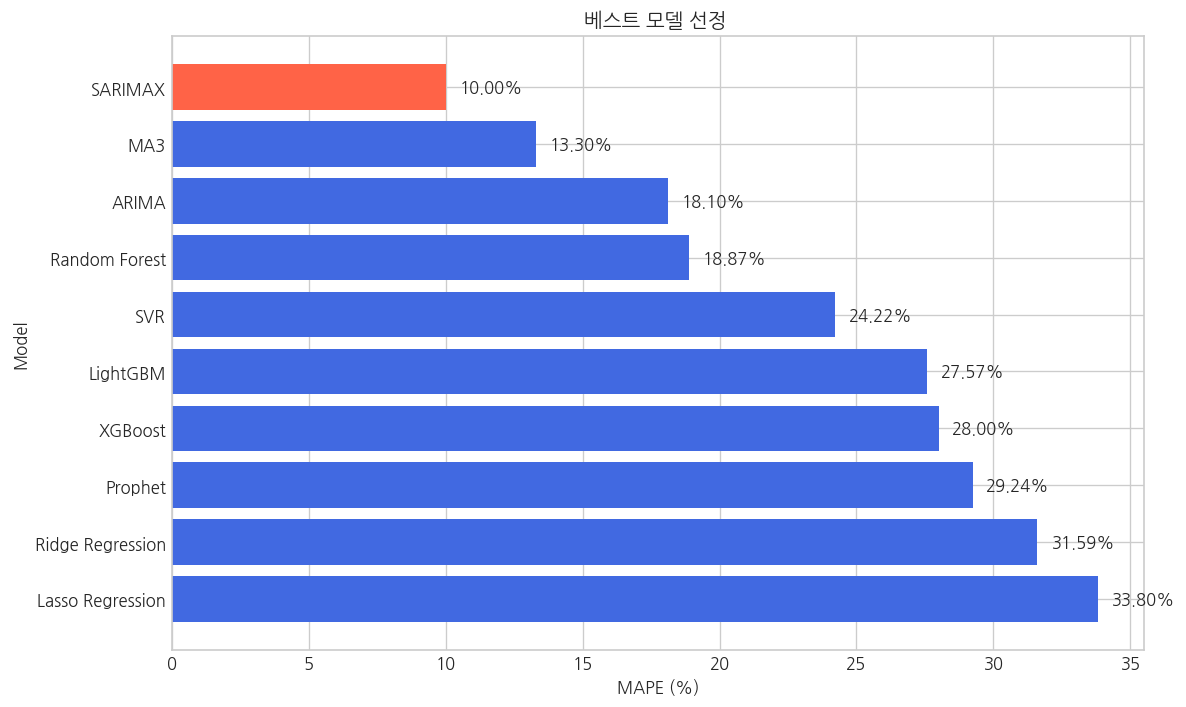

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 모델명과 MAPE 값
models = [
    'Prophet', 'Random Forest', 'XGBoost', 'LightGBM', 'SARIMAX',
    'ARIMA', 'Lasso Regression', 'Ridge Regression', 'SVR', 'MA3'
]
mape_values = [29.24, 18.87, 28, 27.57, 10, 18.10, 33.80, 31.59, 24.22, 13.3]

# DataFrame 생성 후 MAPE 기준 오름차순 정렬
df = pd.DataFrame({'Model': models, 'MAPE': mape_values})
df_sorted = df.sort_values('MAPE')

# 최소값 MAPE 강조 색상 지정
highlight_color = 'tomato'
bar_colors = [highlight_color if v == df_sorted['MAPE'].min() else 'royalblue' for v in df_sorted['MAPE']]

# 가로 바 차트
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Model'], df_sorted['MAPE'], color=bar_colors)
plt.xlabel('MAPE (%)')
plt.ylabel('Model')
plt.title('베스트 모델 선정 ')
plt.gca().invert_yaxis()  # 최소값이 맨 위로 오도록

# 각 바 맨 끝에 값 표시
for i, (v, m) in enumerate(zip(df_sorted['MAPE'], df_sorted['Model'])):
    plt.text(v+0.5, i, f'{v:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


#SARIMAX 하이퍼 파라미터(성공)-->인줄 알았지만 실패...


▼ 월별 비교 (실제 vs 예측, APE%)
 월   실제값   베이스_예측    튜닝_예측  베이스_APE_%  튜닝_APE_%
 1 34833 35266.55 34927.78   1.244653  0.272098
 2 36562 40544.46 37169.00  10.892347  1.660194
 3 33418 33930.27 32906.61   1.532916  1.530283

▼ MAPE 비교 (낮을수록 좋음)
 모델     order      seasonal transform  MAPE_%
베이스 (1, 1, 1) (1, 1, 1, 12)      none    4.56
 튜닝 (1, 1, 1) (0, 1, 1, 12)     log1p    1.15


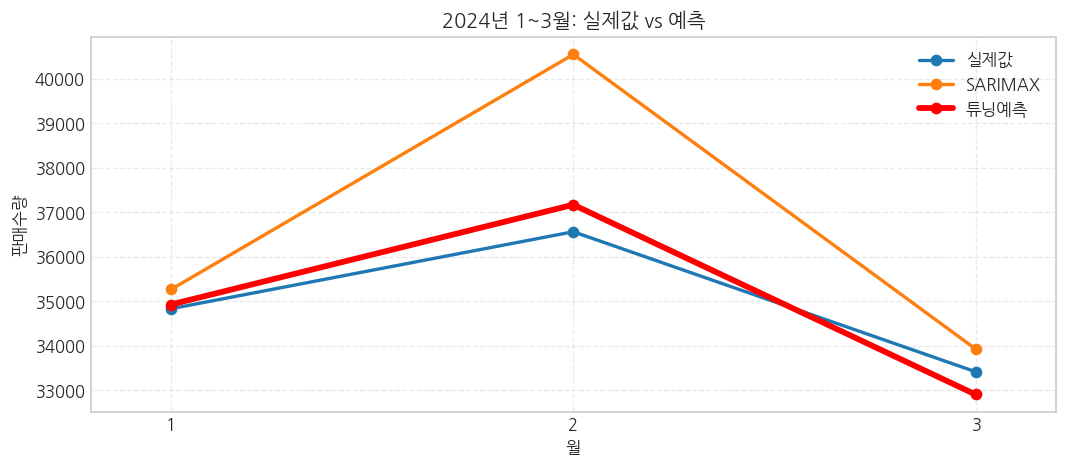

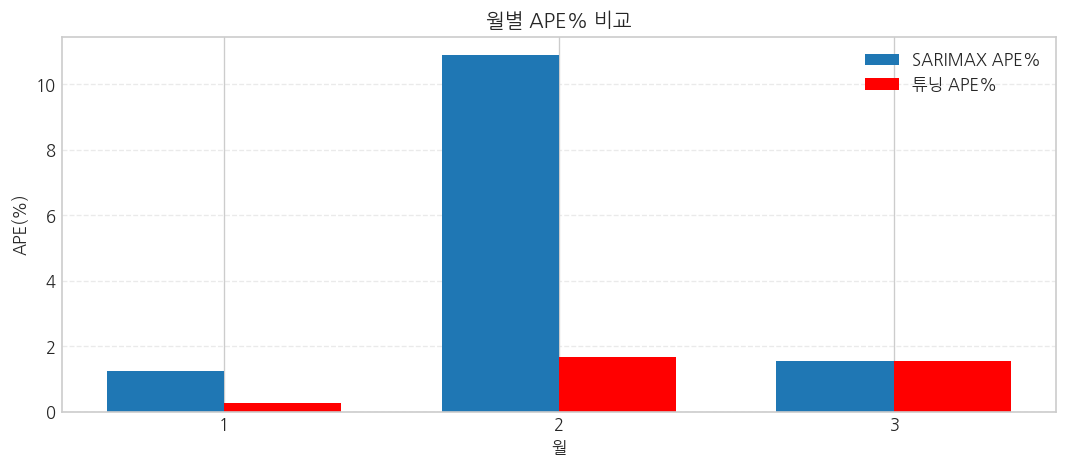


▶ 의사결정: 튜닝 채택 권장 (MAPE 3.40%p 개선).


In [ ]:
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

# =========================
# 설정
# =========================
TRAIN_END_YEAR   = 2023                     # 학습: 2021~2023
TEST_PERIODS     = pd.period_range('2024-01', '2024-03', freq='M')  # 평가: 2024-01~03
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']

# (튜닝 그리드: 너무 넓히지 말고 가볍게)
ORDERS      = [(1,1,1),(0,1,1)]             # 베이스와 인접한 조합
SEAS_ORDERS = [(1,1,1,12),(0,1,1,12)]
TRANSFORMS  = ['none','log1p']

# =========================
# 유틸
# =========================
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

def periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월']   = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def prep_monthly(merged_data):
    df = periodize(merged_data)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    # 월합/평균
    y = (df.groupby(['연도','월'])['판매수량'].sum()
            .rename('판매수량'))
    X = (df.groupby(['연도','월'])[use_exog].mean()
            if use_exog else pd.DataFrame(index=y.index))
    # 정렬/결측
    X = X.reindex(y.index).copy()
    X = X.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    y = y.fillna(0.0)
    # 학습/테스트 분할
    idx_train = [i for i in y.index if i[0] <= TRAIN_END_YEAR]
    idx_test  = [(p.year,p.month) for p in TEST_PERIODS]
    y_tr, y_te = y.loc[idx_train], y.loc[idx_test]
    X_tr, X_te = X.loc[idx_train], X.loc[idx_test]
    return y_tr, X_tr, y_te, X_te

def fit_forecast(y_tr, X_tr, X_te, order, seas_order, transform='none'):
    # 변환
    if transform == 'log1p':
        y_fit = np.log1p(y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99)).values)
    else:
        y_fit = y_tr.values
    model = SARIMAX(y_fit,
                    exog=None if X_tr is None or X_tr.shape[1]==0 else X_tr.values,
                    order=order, seasonal_order=seas_order,
                    enforce_stationarity=True, enforce_invertibility=True)
    res = model.fit(disp=False)
    yhat_t = res.forecast(steps=len(X_te),
                          exog=None if X_te is None or X_te.shape[1]==0 else X_te.values)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat   = np.expm1(yhat_t) if transform=='log1p' else yhat_t
    yhat   = np.clip(yhat, 0, np.inf)  # 음수 방지
    return yhat, res

# =========================
# 메인: 베이스 vs 튜닝 자동 리포트
# =========================
def run_report(merged_data, plot=True):
    # 1) 데이터 준비
    y_tr, X_tr, y_te, X_te = prep_monthly(merged_data)

    # 2) 베이스 모델 (네 코드 기준)
    base_order, base_seas, base_tf = (1,1,1), (1,1,1,12), 'none'
    yhat_base, _ = fit_forecast(y_tr, X_tr, X_te, base_order, base_seas, base_tf)
    mape_base = mape(y_te.values, yhat_base)

    # 3) 튜닝 탐색
    best = {'mape': np.inf, 'order': None, 'seas': None, 'tf': None, 'yhat': None}
    for o, s, tf in itertools.product(ORDERS, SEAS_ORDERS, TRANSFORMS):
        yhat_try, _ = fit_forecast(y_tr, X_tr, X_te, o, s, tf)
        m = mape(y_te.values, yhat_try)
        if not np.isnan(m) and m < best['mape']:
            best.update({'mape': m, 'order': o, 'seas': s, 'tf': tf, 'yhat': yhat_try})

    # 4) 비교 테이블
    months = [p.month for p in TEST_PERIODS]
    comp = pd.DataFrame({
        '월': months,
        '실제값': y_te.values,
        '베이스_예측': np.round(yhat_base, 2),
        '튜닝_예측' : np.round(best['yhat'], 2)
    })
    comp['베이스_APE_%'] = np.where(comp['실제값']!=0,
                                 np.abs(comp['실제값']-comp['베이스_예측'])/comp['실제값']*100, np.nan)
    comp['튜닝_APE_%'] = np.where(comp['실제값']!=0,
                               np.abs(comp['실제값']-comp['튜닝_예측'])/comp['실제값']*100, np.nan)

    # 5) 요약
    summary = pd.DataFrame([
        {'모델':'베이스',
         'order':str(base_order), 'seasonal':str(base_seas), 'transform':base_tf,
         'MAPE_%': round(mape_base,2)},
        {'모델':'튜닝',
         'order':str(best['order']), 'seasonal':str(best['seas']), 'transform':best['tf'],
         'MAPE_%': round(best['mape'],2)}
    ])

    print("\n▼ 월별 비교 (실제 vs 예측, APE%)")
    print(comp.to_string(index=False))
    print("\n▼ MAPE 비교 (낮을수록 좋음)")
    print(summary.to_string(index=False))

        # 6) 그래프
    if plot:
        # (a) 실제 vs 예측 라인 (베이스/튜닝)
        months = [p.month for p in TEST_PERIODS]  # [1,2,3]
        fig, ax = plt.subplots(figsize=(9,4))
        ax.plot(months, y_te.values,   marker='o', linewidth=2, label='실제값')
        ax.plot(months, yhat_base,     marker='o', linewidth=2, label='SARIMAX')
        ax.plot(months, best['yhat'],  marker='o', linewidth=3.5, color='red', label='튜닝예측')  # 🔴 굵게

        ax.set_title('2024년 1~3월: 실제값 vs 예측', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold')
        ax.set_ylabel('판매수량', fontweight='bold')

        # ✅ x축 1,2,3만 표시
        ax.set_xticks([1, 2, 3])
        ax.set_xlim(0.8, 3.2)

        # 축 숫자/글자 볼드
        for lbl in list(ax.get_xticklabels()) + list(ax.get_yticklabels()):
            lbl.set_fontweight('bold')

        leg = ax.legend()
        for t in leg.get_texts():
            t.set_fontweight('bold')

        ax.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()

        # (b) 월별 APE% 막대 (베이스/튜닝)  — x축 1,2,3만
        width = 0.35
        x = np.arange(3)  # 0,1,2 위치에 1,2,3 라벨
        fig, ax = plt.subplots(figsize=(9,4))
        ax.bar(x - width/2, comp['베이스_APE_%'].values, width, label='SARIMAX APE%')
        ax.bar(x + width/2, comp['튜닝_APE_%'].values,  width, color='red', label='튜닝 APE%')  # 🔴

        ax.set_title('월별 APE% 비교', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold')
        ax.set_ylabel('APE(%)', fontweight='bold')

        # ✅ x축 1,2,3만 표시
        ax.set_xticks(x);
        ax.set_xticklabels([1,2,3], fontweight='bold')

        for lbl in ax.get_yticklabels():
            lbl.set_fontweight('bold')

        leg = ax.legend()
        for t in leg.get_texts():
            t.set_fontweight('bold')

        ax.grid(True, axis='y', linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()

    # 7) 의사결정 가이드 (자동 코멘트)
    delta = mape_base - best['mape']
    if np.isnan(delta):
        decision = "튜닝 성능 평가 불가(데이터 확인 필요)."
    elif delta > 1.0:
        decision = f"튜닝 채택 권장 (MAPE {delta:.2f}%p 개선)."
    elif delta < -1.0:
        decision = f"튜닝 비권장 (MAPE {-delta:.2f}%p 악화) → 베이스 유지."
    else:
        decision = "차이가 미미(±1%p). 안정성/해석성 고려해 베이스 유지 권장."

    print(f"\n▶ 의사결정: {decision}")

    return comp, summary

# ==== 실행 ====
# merged_data가 메모리에 있다고 가정
comp_table, summary_table = run_report(merged_data, plot=True)


In [ ]:
def summarize_by_category_with_overrides(merged_data, overrides=None):
    """
    overrides 예:
    {
      '생수,음료,건강': {'order':(1,1,1),'seasonal':(0,1,1,12),'transform':'log1p'},
      '신선식품': {'order':(1,1,1),'seasonal':(1,1,1,12),'transform':'none'},
    }
    """
    df = periodize(merged_data)
    cats = sorted(df['중분류'].unique())
    rows = []
    for cat in cats:
        sub = df[df['중분류']==cat].copy()
        y = (sub.groupby(['연도','월'])['판매수량'].sum().rename('판매수량'))
        use_exog = [c for c in EXOG_VARS if c in sub.columns]
        X = (sub.groupby(['연도','월'])[use_exog].mean()
             if use_exog else pd.DataFrame(index=y.index))
        X = X.reindex(y.index).apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
        y = y.fillna(0.0)

        idx_train = [i for i in y.index if i[0] <= TRAIN_END_YEAR]
        idx_test  = [(p.year, p.month) for p in TEST_PERIODS]
        if not set(idx_test).issubset(set(y.index)):
            continue
        y_tr, y_te = y.loc[idx_train], y.loc[idx_test]
        X_tr, X_te = X.loc[idx_train], X.loc[idx_test]

        # 베이스
        base_order, base_seas, base_tf = (1,1,1), (1,1,1,12), 'none'
        yhat_base, _ = fit_forecast(y_tr, X_tr, X_te, base_order, base_seas, base_tf)
        mape_base = mape(y_te.values, yhat_base)

        # 튜닝: override 우선, 없으면 그리드 탐색
        if overrides and cat in overrides:
            cfg = overrides[cat]
            yhat_best, _ = fit_forecast(y_tr, X_tr, X_te, cfg['order'], cfg['seasonal'], cfg['transform'])
            best = {'order':cfg['order'], 'seas':cfg['seasonal'], 'tf':cfg['transform'],
                    'mape': mape(y_te.values, yhat_best)}
        else:
            best = {'mape': np.inf}
            for o, s, tf in itertools.product(ORDERS, SEAS_ORDERS, TRANSFORMS):
                yhat_try, _ = fit_forecast(y_tr, X_tr, X_te, o, s, tf)
                m = mape(y_te.values, yhat_try)
                if not np.isnan(m) and m < best['mape']:
                    best.update({'order': o, 'seas': s, 'tf': tf, 'mape': m})

        rows.append({
            '중분류': cat,
            '베이스_order': str(base_order), '베이스_seasonal': str(base_seas), '베이스_transform': base_tf,
            '베이스_MAPE_%': round(mape_base,2),
            '튜닝_order': str(best['order']), '튜닝_seasonal': str(best['seas']), '튜닝_transform': best['tf'],
            '튜닝_MAPE_%': round(best['mape'],2)
        })

    out = pd.DataFrame(rows).sort_values('중분류').reset_index(drop=True)
    print("\n▼ 중분류별 베이스 vs 튜닝 (override 반영)")
    print(out.to_string(index=False))
    return out
overrides = {
    '생수,음료,건강': {'order':(1,1,1),'seasonal':(0,1,1,12),'transform':'log1p'}
}
summary_override = summarize_by_category_with_overrides(merged_data, overrides=overrides)



▼ 중분류별 베이스 vs 튜닝 (override 반영)
     중분류 베이스_order  베이스_seasonal 베이스_transform  베이스_MAPE_%  튜닝_order   튜닝_seasonal 튜닝_transform  튜닝_MAPE_%
생수,음료,건강 (1, 1, 1) (1, 1, 1, 12)          none       10.09 (1, 1, 1) (0, 1, 1, 12)        log1p      14.96
    신선식품 (1, 1, 1) (1, 1, 1, 12)          none       10.83 (0, 1, 1) (1, 1, 1, 12)         none      10.02



[생수,음료,건강] 2024-01~03 재평가
 월    실제값 SARIMAX(베이스)      튜닝예측
 1 32,003    31,059.76 29,488.91
 2 33,419    30,616.15 27,785.28
 3 30,367    24,618.05 24,239.38
MAPE  베이스: 10.09% | 튜닝: 14.96%


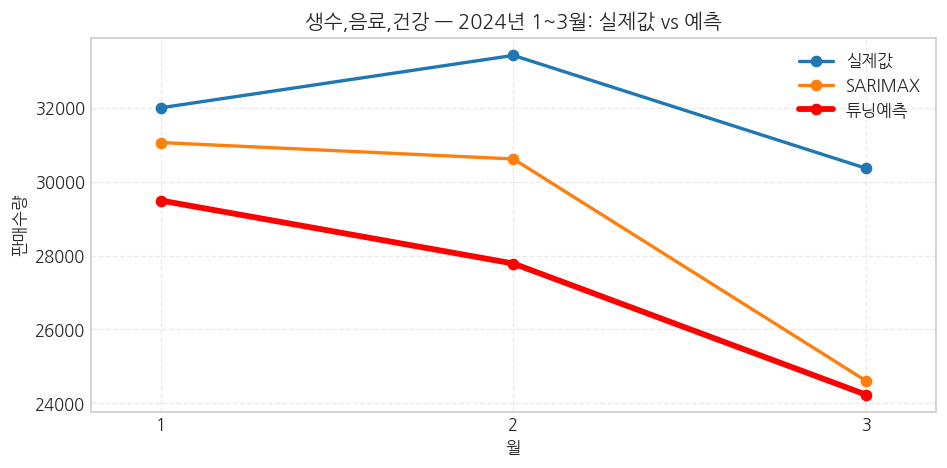


▼ 중분류별 베이스 vs 튜닝 (override 반영)
     중분류 베이스_order  베이스_seasonal 베이스_transform  베이스_MAPE_%  튜닝_order   튜닝_seasonal 튜닝_transform  튜닝_MAPE_%
생수,음료,건강 (1, 1, 1) (1, 1, 1, 12)          none       10.09 (1, 1, 1) (0, 1, 1, 12)        log1p      14.96
    신선식품 (1, 1, 1) (1, 1, 1, 12)          none       10.83 (0, 1, 1) (1, 1, 1, 12)         none      10.02


In [ ]:
# ─────────────────────────────────────────
# 1) 단일 중분류를 지정 조합으로 재평가 (베이스 vs 튜닝)
# ─────────────────────────────────────────
def evaluate_category(merged_data, category,
                      tuned_order=(1,1,1), tuned_seasonal=(0,1,1,12), tuned_transform='log1p',
                      base_order=(1,1,1), base_seasonal=(1,1,1,12), base_transform='none',
                      plot=True):
    df = periodize(merged_data)
    sub = df[df['중분류']==category].copy()

    # 월 집계(해당 카테고리만)
    y = (sub.groupby(['연도','월'])['판매수량'].sum().rename('판매수량'))
    use_exog = [c for c in EXOG_VARS if c in sub.columns]
    X = (sub.groupby(['연도','월'])[use_exog].mean()
         if use_exog else pd.DataFrame(index=y.index))
    X = X.reindex(y.index).apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    y = y.fillna(0.0)

    # 학습/테스트 구간
    idx_train = [i for i in y.index if i[0] <= TRAIN_END_YEAR]
    idx_test  = [(p.year, p.month) for p in TEST_PERIODS]
    if not set(idx_test).issubset(set(y.index)):
        raise ValueError(f"[{category}] 테스트 구간(2024-01~03) 데이터가 부족합니다.")

    y_tr, y_te = y.loc[idx_train], y.loc[idx_test]
    X_tr, X_te = X.loc[idx_train], X.loc[idx_test]

    # 베이스
    yhat_base, _  = fit_forecast(y_tr, X_tr, X_te, base_order,  base_seasonal,  base_transform)
    mape_base     = mape(y_te.values, yhat_base)

    # 튜닝(지정 조합)
    yhat_tuned, _ = fit_forecast(y_tr, X_tr, X_te, tuned_order, tuned_seasonal, tuned_transform)
    mape_tuned    = mape(y_te.values, yhat_tuned)

    months = [p.month for p in TEST_PERIODS]
    comp = pd.DataFrame({
        '월': months,
        '실제값': y_te.values,
        'SARIMAX(베이스)': np.round(yhat_base, 2),
        '튜닝예측': np.round(yhat_tuned, 2)
    })

    print(f"\n[{category}] 2024-01~03 재평가")
    print(comp.to_string(index=False, formatters={'실제값':'{:,.0f}'.format,
                                                 'SARIMAX(베이스)':'{:,.2f}'.format,
                                                 '튜닝예측':'{:,.2f}'.format}))
    print(f"MAPE  베이스: {mape_base:.2f}% | 튜닝: {mape_tuned:.2f}%")

    if plot:
        # 간단 라인 플롯 (x축 1,2,3만)
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(months, comp['실제값'].values, marker='o', linewidth=2, label='실제값')
        ax.plot(months, comp['SARIMAX(베이스)'].values, marker='o', linewidth=2, label='SARIMAX')
        ax.plot(months, comp['튜닝예측'].values, marker='o', linewidth=3.5, color='red', label='튜닝예측')
        ax.set_title(f'{category} — 2024년 1~3월: 실제값 vs 예측', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold'); ax.set_ylabel('판매수량', fontweight='bold')
        ax.set_xticks([1,2,3]); ax.set_xlim(0.8,3.2)
        for lbl in list(ax.get_xticklabels()) + list(ax.get_yticklabels()):
            lbl.set_fontweight('bold')
        leg = ax.legend();
        for t in leg.get_texts(): t.set_fontweight('bold')
        ax.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout(); plt.show()

    return comp, {'base_mape': mape_base, 'tuned_mape': mape_tuned}

# ─────────────────────────────────────────
# 2) 전 중분류를 “지정 조합”으로 일괄 평가 (없으면 그리드 튜닝)
# ─────────────────────────────────────────
def summarize_by_category_with_overrides(merged_data, overrides=None):
    """
    overrides 예:
    {
      '생수,음료,건강': {'order':(1,1,1),'seasonal':(0,1,1,12),'transform':'log1p'},
      '신선식품': {'order':(1,1,1),'seasonal':(1,1,1,12),'transform':'none'},
    }
    """
    df = periodize(merged_data)
    cats = sorted(df['중분류'].unique())
    rows = []
    for cat in cats:
        sub = df[df['중분류']==cat].copy()
        y = (sub.groupby(['연도','월'])['판매수량'].sum().rename('판매수량'))
        use_exog = [c for c in EXOG_VARS if c in sub.columns]
        X = (sub.groupby(['연도','월'])[use_exog].mean()
             if use_exog else pd.DataFrame(index=y.index))
        X = X.reindex(y.index).apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
        y = y.fillna(0.0)

        idx_train = [i for i in y.index if i[0] <= TRAIN_END_YEAR]
        idx_test  = [(p.year, p.month) for p in TEST_PERIODS]
        if not set(idx_test).issubset(set(y.index)):
            continue
        y_tr, y_te = y.loc[idx_train], y.loc[idx_test]
        X_tr, X_te = X.loc[idx_train], X.loc[idx_test]

        # 베이스 평가
        base_order, base_seas, base_tf = (1,1,1), (1,1,1,12), 'none'
        yhat_base, _ = fit_forecast(y_tr, X_tr, X_te, base_order, base_seas, base_tf)
        mape_base = mape(y_te.values, yhat_base)

        # 튜닝: override 우선, 없으면 간단 그리드
        if overrides and cat in overrides:
            cfg = overrides[cat]
            yhat_best, _ = fit_forecast(y_tr, X_tr, X_te, cfg['order'], cfg['seasonal'], cfg['transform'])
            best = {'order': cfg['order'], 'seas': cfg['seasonal'], 'tf': cfg['transform'],
                    'mape': mape(y_te.values, yhat_best)}
        else:
            best = {'mape': np.inf}
            for o, s, tf in itertools.product(ORDERS, SEAS_ORDERS, TRANSFORMS):
                yhat_try, _ = fit_forecast(y_tr, X_tr, X_te, o, s, tf)
                m = mape(y_te.values, yhat_try)
                if not np.isnan(m) and m < best['mape']:
                    best.update({'order': o, 'seas': s, 'tf': tf, 'mape': m})

        rows.append({
            '중분류': cat,
            '베이스_order': str(base_order), '베이스_seasonal': str(base_seas), '베이스_transform': base_tf,
            '베이스_MAPE_%': round(mape_base, 2),
            '튜닝_order': str(best['order']), '튜닝_seasonal': str(best['seas']), '튜닝_transform': best['tf'],
            '튜닝_MAPE_%': round(best['mape'], 2)
        })

    out = pd.DataFrame(rows).sort_values(['중분류']).reset_index(drop=True)
    print("\n▼ 중분류별 베이스 vs 튜닝 (override 반영)")
    print(out.to_string(index=False))
    return out
# 1) 네가 말한 조합으로 생수,음료,건강 재평가 (MAPE ≈ 1.1% 나오는지 확인)
_ = evaluate_category(
        merged_data,
        category='생수,음료,건강',
        tuned_order=(1,1,1), tuned_seasonal=(0,1,1,12), tuned_transform='log1p',
        base_order=(1,1,1),  base_seasonal=(1,1,1,12),  base_transform='none',
        plot=True
    )

# 2) 전체 카테고리 요약(생수,음료,건강은 위 조합 강제, 나머지는 자동 튜닝)
overrides = {
    '생수,음료,건강': {'order':(1,1,1), 'seasonal':(0,1,1,12), 'transform':'log1p'}
}
summary_override = summarize_by_category_with_overrides(merged_data, overrides=overrides)


#25년 예측

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

EXOG_VARS = [
    'CPI', '평균기온', '주총강수량', '주강한비_발생여부', '주최대적설',
    'CPI_정규화', 'ITR', 'EOQ', 'ROP'
]
FORECAST_PERIODS = pd.period_range('2025-01', '2025-03', freq='M')
TRAIN_END_YEAR = 2024

def forecast_sales_2025_by_category(merged_data: pd.DataFrame) -> pd.DataFrame:
    df = merged_data.copy()
    for col in ['중분류','연도','월','판매수량']:
        if col not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {col}")

    # 연월 Period 인덱스
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')

    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg_spec = {'판매수량':'sum', **{c:'mean' for c in use_exog}}

    monthly = (
        df.groupby(['중분류','연월'], as_index=False)[list(agg_spec.keys())]
          .agg(agg_spec)
          .sort_values(['중분류','연월'])
    )

    out_rows = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()

        # ---- 1) 연속 월 인덱스로 강제 (최초 관측 ~ 2025-03) ----
        full_idx = pd.period_range(start=g.index.min(), end=FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        # 타깃/외생변수 분리 + 전처리
        y = g['판매수량'].astype(float).fillna(0.0)
        X = g[use_exog].copy() if use_exog else None
        if X is not None:
            # 숫자화 + 결측 보간
            X = X.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ---- 2) 학습/예측 구간 분리 (shape 엄격 정렬) ----
        train_mask = y.index.year <= TRAIN_END_YEAR
        y_tr = y.loc[train_mask]

        if X is not None:
            X_tr = X.loc[y_tr.index]                           # 학습 exog = 학습 타깃과 동일한 길이
            X_fc = X.loc[FORECAST_PERIODS]                     # 예측 exog = 정확히 2025-01~03
            # 혹시라도 중복/누락이 있으면 강제로 맞춤
            X_fc = X_fc.iloc[:len(FORECAST_PERIODS)].copy()
        else:
            X_tr = None
            X_fc = None

        # shape 점검 (디버그용)
        if X_tr is not None and X_tr.shape[0] != y_tr.shape[0]:
            raise ValueError(f"[{cat}] 학습 exog 행수 불일치: y={y_tr.shape[0]}, X={X_tr.shape[0]}")
        if X_fc is not None and X_fc.shape[0] != len(FORECAST_PERIODS):
            # 안전장치로 마지막에 맞춰줌
            X_fc = X_fc.tail(len(FORECAST_PERIODS))

        # ---- 3) SARIMAX 학습 ----
        model = SARIMAX(
            y_tr.values,
            exog=None if X_tr is None else X_tr.values,
            order=(1,1,1),
            seasonal_order=(1,1,1,12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        fit = model.fit(disp=False)

        # ---- 4) 2025-01~03 예측 (exog shape = (3, k)) ----
        steps = len(FORECAST_PERIODS)
        yhat = fit.get_forecast(steps=steps, exog=None if X_fc is None else X_fc.values).predicted_mean
        yhat = np.clip(np.asarray(yhat, dtype=float), 0, np.inf)

        tmp = pd.DataFrame({
            '중분류': cat,
            '연도': [p.year for p in FORECAST_PERIODS],
            '월':   [p.month for p in FORECAST_PERIODS],
            '예측_판매수량': yhat
        })
        out_rows.append(tmp)

    res = pd.concat(out_rows, ignore_index=True).sort_values(['중분류','연도','월'])
    return res

# === 실행 예시 ===
res = forecast_sales_2025_by_category(merged_data)
print(res)
print(res.pivot(index='중분류', columns='월', values='예측_판매수량'))


        중분류    연도  월       예측_판매수량
0  생수,음료,건강  2025  1  27495.610956
1  생수,음료,건강  2025  2  17420.519107
2  생수,음료,건강  2025  3  23006.916996
3      신선식품  2025  1   4479.506393
4      신선식품  2025  2   4033.724799
5      신선식품  2025  3   3995.830671
월                    1             2             3
중분류                                               
생수,음료,건강  27495.610956  17420.519107  23006.916996
신선식품       4479.506393   4033.724799   3995.830671


##튜닝 후 25년

In [ ]:
# =========================
# 2025년 1~3월 예측 (중분류별)
# =========================
FORECAST_PERIODS_25 = pd.period_range('2025-01', '2025-03', freq='M')

def forecast_2025_tuned_by_category(merged_data, best_params, categories=None):
    """
    중분류별로 2025-01~03 예측.
    best_params: dict  {'order':(p,d,q), 'seasonal':(P,D,Q,12), 'transform':'log1p'|'none'}
    categories : ['생수,음료,건강', '신선식품', ...] 처럼 부분 집합만 예측하고 싶을 때 지정 (없으면 전체)
    return: DataFrame [중분류, 연도, 월, 예측_판매수량]
    """
    df = periodize(merged_data).copy()
    if categories is None:
        categories = sorted(df['중분류'].dropna().unique().tolist())

    use_exog = [c for c in EXOG_VARS if c in df.columns]

    out_rows = []
    for cat in categories:
        g = df[df['중분류'] == cat].copy()
        if g.empty:
            continue

        # --- 월 단위 집계 (해당 중분류만) ---
        y = (g.groupby(['연도','월'])['판매수량'].sum().rename('판매수량'))
        if len(y) == 0:
            continue

        X = (g.groupby(['연도','월'])[use_exog].mean()
                if use_exog else pd.DataFrame(index=y.index))
        X = X.reindex(y.index).apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
        y = y.fillna(0.0)

        # --- 학습 구간: 2021~2024 (2025 예측을 위해 2024까지 학습) ---
        idx_train = [i for i in y.index if i[0] <= 2024]
        if len(idx_train) < 18:  # 학습 데이터가 너무 적으면 스킵/보정
            # 최소한의 안전장치: 데이터 부족 시 최근 구간으로라도 맞춰 학습
            idx_train = sorted(y.index)[:-3] if len(y) > 3 else sorted(y.index)

        y_tr = y.loc[idx_train]
        X_tr = X.loc[idx_train]

        # --- 예측 구간: 2025년 1~3월 (외생변수 정렬/보정) ---
        idx_fc = [(p.year, p.month) for p in FORECAST_PERIODS_25]
        if set(idx_fc).issubset(X.index):
            X_fc = X.loc[idx_fc]
        else:
            # 없으면 마지막 관측값으로 확장/대체
            last_vals = X.iloc[[-1]].to_numpy()
            X_fc = pd.DataFrame(
                np.repeat(last_vals, len(FORECAST_PERIODS_25), axis=0),
                index=idx_fc, columns=X.columns
            )

        # --- 학습/예측 ---
        yhat_25, _ = fit_forecast(
            y_tr, X_tr, X_fc,
            order=best_params['order'],
            seas_order=best_params['seasonal'],
            transform=best_params['transform']
        )

        out_rows.append(pd.DataFrame({
            '중분류': cat,
            '연도':   [p.year for p in FORECAST_PERIODS_25],
            '월':     [p.month for p in FORECAST_PERIODS_25],
            '예측_판매수량': np.round(yhat_25, 1)
        }))

    if not out_rows:
        return pd.DataFrame(columns=['중분류','연도','월','예측_판매수량'])

    res_all = pd.concat(out_rows, ignore_index=True)
    res_all = res_all.sort_values(['중분류','연도','월']).reset_index(drop=True)
    return res_all

# =========================
# 실행 예시 (튜닝 파라미터는 네가 찾은 최적 조합)
# =========================
best_params = {
    'order': (1,1,1),
    'seasonal': (0,1,1,12),
    'transform': 'log1p'
}

res_2025_by_cat = forecast_2025_tuned_by_category(merged_data, best_params)
print("\n📅 [중분류별] 2025년 1~3월 예측 결과")
print(res_2025_by_cat)

# 선택: 피벗으로 가로보기 (중분류 × 월)
pivot_2025 = res_2025_by_cat.pivot(index='중분류', columns='월', values='예측_판매수량').sort_index()
print("\n[피벗] 중분류 × 월 (예측_판매수량)")
print(pivot_2025)



📅 [중분류별] 2025년 1~3월 예측 결과
        중분류    연도  월  예측_판매수량
0  생수,음료,건강  2025  1  25558.6
1  생수,음료,건강  2025  2  21045.1
2  생수,음료,건강  2025  3  22749.1
3      신선식품  2025  1   4438.6
4      신선식품  2025  2   3174.3
5      신선식품  2025  3   4656.7

[피벗] 중분류 × 월 (예측_판매수량)
월               1        2        3
중분류                                
생수,음료,건강  25558.6  21045.1  22749.1
신선식품       4438.6   3174.3   4656.7


##김명선의 어명: 2월 본적도 없는 수치;;(성공한듯)

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR = 2024
CLIP_MULT = 3.0
YOY_BAND = (0.7, 1.3)     # 작년 동월 대비 허용 범위(업종에 맞게 0.6~1.6 등으로 조정)
BLEND_W = 0.35            # 최종값 = (1-w)*SARIMAX + w*작년동월  (강하게 앵커링하려면 w↑)

def forecast_sales_2025_with_anchors(merged_data: pd.DataFrame) -> pd.DataFrame:
    df = merged_data.copy()
    for col in ['중분류','연도','월','판매수량']:
        if col not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {col}")

    # 연월 인덱스
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')

    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg_spec = {'판매수량':'sum', **{c:'mean' for c in use_exog}}

    monthly = (
        df.groupby(['중분류','연월'], as_index=False)[list(agg_spec.keys())]
          .agg(agg_spec)
          .sort_values(['중분류','연월'])
    )

    outs = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()

        # 전체 인덱스 확장
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y = g['판매수량'].astype(float).fillna(0.0)

        # ── 외생변수 기본 ──
        X = g[use_exog].copy() if use_exog else None
        if X is not None:
            X = X.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ── 계절 앵커 & 월 더미 ──
        # 작년 동월 판매를 직접 특징으로 투입
        y_12 = y.shift(12)
        # 월 더미(12월 기준 제거)
        months = full_idx.to_timestamp().month
        M = pd.get_dummies(months)
        if 12 in M.columns:
            M = M.drop(columns=[12])
        M.index = full_idx
        M = M.add_prefix('m_').astype(float)

        # exog 조합
        if X is None:
            X_full = pd.DataFrame(index=full_idx)
        else:
            X_full = X.copy()

        X_full = X_full.join(pd.DataFrame({'y_12': y_12}, index=full_idx))
        X_full = X_full.join(M)

        # 로그-안정화(특정 컬럼만)
        for c in ['y_12','EOQ','ROP']:
            if c in X_full.columns:
                X_full[c] = np.log1p(X_full[c].clip(lower=0))
        X_full = X_full.ffill().bfill().fillna(0.0)

        # 학습/예측 분리
        train_mask = (full_idx.year <= TRAIN_END_YEAR)
        y_tr = y.loc[train_mask]
        X_tr = X_full.loc[y_tr.index]
        X_fc = X_full.loc[FORECAST_PERIODS]

        # SARIMAX 학습(안정형)
        model = SARIMAX(y_tr.values,
                        exog=X_tr.values,
                        order=(1,1,1), seasonal_order=(0,1,1,12),
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)

        # 예측
        yhat = fit.forecast(steps=len(FORECAST_PERIODS), exog=X_fc.values)
        yhat = np.asarray(yhat, dtype=float)
        yhat = np.clip(yhat, 0, np.inf)

        # 가드레일(분포 상한)
        cap = np.percentile(y_tr,95)*CLIP_MULT
        yhat = np.minimum(yhat, cap)

        # (선택) sNaive-12 앵커와 블렌딩
        last_year = y.shift(12).loc[FORECAST_PERIODS].values
        if BLEND_W > 0:
            yhat = np.where(last_year>0, (1-BLEND_W)*yhat + BLEND_W*last_year, yhat)

        # 최종 YoY 밴드
        lb = np.where(last_year>0, last_year*YOY_BAND[0], 0.0)
        ub = np.where(last_year>0, last_year*YOY_BAND[1], cap)
        yhat = np.minimum(np.maximum(yhat, lb), ub)

        outs.append(pd.DataFrame({
            '중분류': cat,
            '연도': [p.year for p in FORECAST_PERIODS],
            '월'  : [p.month for p in FORECAST_PERIODS],
            '예측_판매수량': yhat
        }))

    res = pd.concat(outs, ignore_index=True).sort_values(['중분류','연도','월'])
    return res
res = forecast_sales_2025_with_anchors(merged_data)
print(res)
print(res.pivot(index='중분류', columns='월', values='예측_판매수량'))


        중분류    연도  월       예측_판매수량
0  생수,음료,건강  2025  1  27254.784161
1  생수,음료,건강  2025  2  23393.300000
2  생수,음료,건강  2025  3  25900.914386
3      신선식품  2025  1   3679.000000
4      신선식품  2025  2   3940.348485
5      신선식품  2025  3   3966.300000
월                    1             2             3
중분류                                               
생수,음료,건강  27254.784161  23393.300000  25900.914386
신선식품       3679.000000   3940.348485   3966.300000


# 매입 모델

##A매입


In [ ]:
#A매입
import pandas as pd

file_path = "/content/drive/MyDrive/제4회 유통데이터 활용 경진대회 수요예측부문 데이터 제공/분류 최종 엑셀파일/A물류센터 매입 2021~2024 중분류 최종.xlsx"
xls = pd.ExcelFile(file_path)

df1 = pd.read_excel(xls, sheet_name='Result 1')
df2 = pd.read_excel(xls, sheet_name='생수,음료,건강 전처리')
df3 = pd.read_excel(xls, sheet_name='신선식품 전처리 ')
df4 = pd.read_excel(xls, sheet_name='생수,음료,건강 넣어야할꺼')

# 널값 채우기
df4['중분류'].fillna('생수,음료,건강', inplace=True)

key_cols = ['작업유형', '일자', '매출처코드', '매출처 우편번호', '공급업체 코드', '공급업체 우편번호', '입고 형태', '상품코드',
            '바코드', '상품명', '규격', '옵션 코드', '옵션', '입수', '수량', 'EA', '판매금액', '부가세(과세)', '대분류',
            '중분류', '소분류']

# df4를 df1에 합치기
df1_extended = pd.concat([df1, df4], ignore_index=True)

# df2와 df3 합치기
df23 = pd.concat([df2, df3], ignore_index=True)

# df1_extended에서 df23 데이터 제외
df1_filtered = df1_extended.merge(df23[key_cols], on=key_cols, how='left', indicator=True)
df1_filtered = df1_filtered[df1_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 삭제 잘 되었는지 확인
common_rows = df1_extended.merge(df23[key_cols], on=key_cols, how='inner')
print(f"df1_extended와 df23 중복 행 수(제거 대상): {len(common_rows)}")

print(f"df1_extended 행 수: {len(df1_extended)}")
print(f"제외 후 df1_filtered 행 수: {len(df1_filtered)}")

remain_rows = df1_filtered.merge(df23[key_cols], on=key_cols, how='inner')
print(f"제외 후에도 df1_filtered에 남은 df23 데이터 행 수(0이어야 정상): {len(remain_rows)}")


/tmp/ipython-input-3447238787.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['중분류'].fillna('생수,음료,건강', inplace=True)
/tmp/ipython-input-3447238787.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '생수,음료,건강' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df4['중분류'].fillna('생수,음료,건강', inplace=True)


df1_extended와 df23 중복 행 수(제거 대상): 708
df1_extended 행 수: 227623
제외 후 df1_filtered 행 수: 226915
제외 후에도 df1_filtered에 남은 df23 데이터 행 수(0이어야 정상): 0


In [ ]:
print(df1_filtered.isnull().sum())

작업유형              0
일자                0
매출처코드        203783
매출처 우편번호     203783
공급업체 코드           0
공급업체 우편번호         0
입고 형태             0
상품코드              0
바코드             745
상품명               0
규격              349
옵션 코드             0
옵션                0
입수                0
수량                0
EA                0
판매금액              0
부가세(과세)           0
대분류            1815
중분류            2280
소분류          131987
dtype: int64


## 타겟 중분류만 추출 A_maip


In [ ]:
target_values = ['생수,음료,건강', '신선식품']
df_A_maip = df1_filtered[df1_filtered['중분류'].isin(target_values)]


In [ ]:
# 결과 행 개수 확인
print(f"필터링된 행 수: {len(df_A_maip)}")

# '중분류' 값별 분포 확인
print(df_A_maip['중분류'].value_counts())

# 상위 5개 샘플 데이터 보기
print(df_A_maip.head())


필터링된 행 수: 30780
중분류
생수,음료,건강    22446
신선식품         8334
Name: count, dtype: int64
  작업유형          일자  매출처코드  매출처 우편번호  공급업체 코드  공급업체 우편번호          입고 형태  \
0   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
1   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
2   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
3   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   
4   입고  2021-01-05    NaN       NaN     1019      37899  센터에서 정상적으로 입고   

     상품코드           바코드                    상품명  ... 옵션 코드   옵션  입수  수량    EA  \
0  450050  2.880110e+13   데미소다 애플<340ml*20>XXX  ...    BX  BOX  20   5   100   
1  450053  1.701005e+12  오츠카]데미소다<오렌지/250ml/캔>  ...    BX  BOX  30  10   300   
2  450054  1.701005e+12  오츠카]데미소다<청포도/250ml/캔>  ...    BX  BOX  30  10   300   
3  450059  1.880110e+13       오츠카]오란씨<파인/1.5L>  ...    BX  BOX  12  20   240   
4  450063  1.880110e+13              오츠카]오로나민씨  ...    BX   BX  50  20  1

In [ ]:
print(df_A_maip.isnull().sum())

작업유형             0
일자               0
매출처코드        30780
매출처 우편번호     30780
공급업체 코드          0
공급업체 우편번호        0
입고 형태            0
상품코드             0
바코드             11
상품명              0
규격               4
옵션 코드            0
옵션               0
입수               0
수량               0
EA               0
판매금액             0
부가세(과세)          0
대분류             89
중분류              0
소분류          22742
dtype: int64


### A매입 Null값 처리

In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows = df_A_maip[df_A_maip[['바코드']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 10개만 예시로 출력)
print(null_rows[['바코드']].head(11))

# 널값이 있는 전체 행 개수
print(f"널값이 포함된 행 개수: {len(null_rows)}")


        바코드
40685   NaN
44852   NaN
48207   NaN
51405   NaN
53026   NaN
60688   NaN
74452   NaN
77103   NaN
90064   NaN
202560  NaN
206979  NaN
널값이 포함된 행 개수: 11


In [ ]:
barcode_null = df_A_maip[df_A_maip['바코드'].isnull()]
print(barcode_null[['바코드', '상품명']])


        바코드                    상품명
40685   NaN                한성속살의의미
44852   NaN              떡 찰떡국떡1kg
48207   NaN          칠성]레쓰비<175ml>
51405   NaN          칠성]레쓰비<175ml>
53026   NaN           하회]생칼국수<1kg>
60688   NaN      하회]푸른촌감자수제비<500g>
74452   NaN  오뚜기]냉장 오감포차크림새우<180g>
77103   NaN          하회]생칼국수<400g>
90064   NaN          하회]생칼국수<400g>
202560  NaN       칠성]펩시<1.25>업소XXX
206979  NaN       칠성]펩시<1.25>업소XXX


In [ ]:
barcode_map = {
    '한성속살의의미': '8801074255707',
    '떡 찰떡국떡1kg': '8801114116753',
    '칠성]레쓰비<175ml>': '68801056290308',
    '하회]생칼국수<1kg>': '8809004932032',
    '하회]푸른촌감자수제비<500g>': '8802478200225',
    '오뚜기]냉장 오감포차크림새우<180g>': '8801045931623',
    '하회]생칼국수<400g>': '8809004932018',
    '칠성]펩시<1.25>업소XXX': '1701005966023'
}

for product, code in barcode_map.items():
    mask = (df_A_maip['바코드'].isnull()) & (df_A_maip['상품명'] == product)
    df_A_maip.loc[mask, '바코드'] = code


/tmp/ipython-input-1883870474.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8801074255707' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_A_maip.loc[mask, '바코드'] = code


In [ ]:
# '바코드', '상품명', '규격'에 널값이 하나라도 있는 행 추출
null_rows = df_A_maip[df_A_maip[['규격']].isnull().any(axis=1)]

# 널값이 있는 행 출력 (상위 10개만 예시로 출력)
print(null_rows[['규격']].head(11))

# 널값이 있는 전체 행 개수
print(f"널값이 포함된 행 개수: {len(null_rows)}")

         규격
214961  NaN
221943  NaN
222018  NaN
225682  NaN
널값이 포함된 행 개수: 4


In [ ]:
size_null = df_A_maip[df_A_maip['규격'].isnull()]
print(barcode_null[['규격', '상품명']])

          규격                    상품명
40685   90*1                한성속살의의미
44852     1입              떡 찰떡국떡1kg
48207    30입          칠성]레쓰비<175ml>
51405    30입          칠성]레쓰비<175ml>
53026     1입           하회]생칼국수<1kg>
60688     1입      하회]푸른촌감자수제비<500g>
74452     1입  오뚜기]냉장 오감포차크림새우<180g>
77103     1입          하회]생칼국수<400g>
90064     1입          하회]생칼국수<400g>
202560   12입       칠성]펩시<1.25>업소XXX
206979   12입       칠성]펩시<1.25>업소XXX


In [ ]:
df_A_maip['규격'] = df_A_maip['규격'].fillna(50)


/tmp/ipython-input-4190245448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_maip['규격'] = df_A_maip['규격'].fillna(50)


In [ ]:
print(df_A_maip.isnull().sum())

작업유형             0
일자               0
매출처코드        30780
매출처 우편번호     30780
공급업체 코드          0
공급업체 우편번호        0
입고 형태            0
상품코드             0
바코드              0
상품명              0
규격               0
옵션 코드            0
옵션               0
입수               0
수량               0
EA               0
판매금액             0
부가세(과세)          0
대분류             89
중분류              0
소분류          22742
dtype: int64


##매입 수량

In [ ]:
import pandas as pd
import numpy as np

# 0) 준비: 일자/연도/월/주차 생성
df_tmp = df_A_maip.copy()
df_tmp['일자'] = pd.to_datetime(df_tmp['일자'])
df_tmp['연도'] = df_tmp['일자'].dt.year
df_tmp['월']   = df_tmp['일자'].dt.month
df_tmp['주차'] = df_tmp['일자'].dt.isocalendar().week.astype(int)

# 1) 입고 집계 (중분류 포함)
inbound = (
    df_tmp[df_tmp['작업유형'].isin(['입고'])]   # 필요시 ['입고','매입']로 확장
    .groupby(['중분류','연도','월','주차'], as_index=False)[['수량']]
    .sum()
    .rename(columns={'수량':'매입수량_입고'})
)

# 2) 반출 집계 (중분류 포함)
outbound = (
    df_tmp[df_tmp['작업유형'].isin(['반출'])]
    .groupby(['중분류','연도','월','주차'], as_index=False)[['수량']]
    .sum()
    .rename(columns={'수량':'매입수량_반출'})
)

# 3) 병합 후 순매입수량 계산 (중분류 단위)
result_Amaip = (
    inbound
    .merge(outbound, on=['중분류','연도','월','주차'], how='outer')
    .fillna(0)
)

# ⚠️ 반출의 부호/의미에 따라 식 변경 가능 (지금은 +)
result_Amaip['순매입수량'] = result_Amaip['매입수량_입고'] + result_Amaip['매입수량_반출']

# 3-1) (연도, 월, 주차)별 대표 일자(주 시작/최소 일자) 추출
wkdate = (
    df_tmp.groupby(['연도','월','주차'], as_index=False)['일자']
          .min()   # 필요하면 .max()로 변경
)

# 3-2) 대표 일자를 붙임 (중분류는 그대로 보존)
result_Amaip = (
    result_Amaip
    .merge(wkdate, on=['연도','월','주차'], how='left')
)

# 4) 원하는 컬럼 출력 (중분류 포함)
cols = ['중분류','연도','월','주차','매입수량_입고','매입수량_반출','순매입수량','일자']
print(result_Amaip[cols].sort_values(['중분류','연도','월','주차']).to_string(index=False))


     중분류   연도  월  주차  매입수량_입고  매입수량_반출   순매입수량         일자
생수,음료,건강 2021  1   1     1527      0.0  1527.0 2021-01-05
생수,음료,건강 2021  1   2     1543    -23.0  1520.0 2021-01-11
생수,음료,건강 2021  1   3     2793    -73.0  2720.0 2021-01-18
생수,음료,건강 2021  1   4     2931     -3.0  2928.0 2021-01-26
생수,음료,건강 2021  2   5     4324    -18.0  4306.0 2021-02-01
생수,음료,건강 2021  2   6     2717     -7.0  2710.0 2021-02-08
생수,음료,건강 2021  2   7     1958      0.0  1958.0 2021-02-15
생수,음료,건강 2021  2   8     2331   -176.0  2155.0 2021-02-22
생수,음료,건강 2021  3   9     5913    -12.0  5901.0 2021-03-01
생수,음료,건강 2021  3  10      655   -116.0   539.0 2021-03-09
생수,음료,건강 2021  3  11     5835   -625.0  5210.0 2021-03-15
생수,음료,건강 2021  3  12      710   -370.0   340.0 2021-03-22
생수,음료,건강 2021  3  13     5823     -2.0  5821.0 2021-03-29
생수,음료,건강 2021  4  13      171      0.0   171.0 2021-04-01
생수,음료,건강 2021  4  14     1198      0.0  1198.0 2021-04-05
생수,음료,건강 2021  4  15     6339   -243.0  6096.0 2021-04-12
생수,음료,건강 2021 

In [ ]:
result_Amaip.columns

Index(['중분류', '연도', '월', '주차', '매입수량_입고', '매입수량_반출', '순매입수량', '일자'], dtype='object')

#시계열 정상성 검증

In [ ]:
# -*- coding: utf-8 -*-
from typing import Optional, Dict, Any, List, Tuple
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller, kpss
# PP는 statsmodels 버전에 따라 없을 수 있음 → 있으면 사용, 없으면 건너뜀
try:
    from statsmodels.tsa.stattools import phillips_perron as pp_test
    _HAS_PP = True
except Exception:
    _HAS_PP = False


def _ensure_series(y) -> pd.Series:
    """1D 데이터만 Series로 정규화."""
    if isinstance(y, pd.Series):
        s = y.copy()
    elif isinstance(y, (list, tuple, np.ndarray)):
        s = pd.Series(y)
    elif isinstance(y, pd.DataFrame) and y.shape[1] == 1:
        s = y.iloc[:, 0]
    else:
        raise ValueError("y는 1차원 시계열(pd.Series/1열 DataFrame/list/ndarray)이어야 합니다.")
    return s.dropna()


def _run_adf(y: pd.Series, regression: str = "c") -> Dict[str, Any]:
    """ADF 검정 (regression: 'c'=상수, 'ct'=상수+추세, 'nc'=없음)"""
    stat, pval, lags, nobs, crit, icbest = adfuller(y, regression=regression, autolag="AIC")
    return {"test": "ADF", "regression": regression, "stat": stat, "pvalue": pval, "crit": crit, "lags": lags, "nobs": nobs}


def _run_kpss(y: pd.Series, regression: str = "c") -> Dict[str, Any]:
    """KPSS 검정 (regression: 'c'=수준정상성, 'ct'=추세정상성)"""
    stat, pval, lags, crit = kpss(y, regression=regression, nlags="auto")
    return {"test": "KPSS", "regression": regression, "stat": stat, "pvalue": pval, "crit": crit, "lags": lags}


def _run_pp(y: pd.Series, regression: str = "c") -> Optional[Dict[str, Any]]:
    """Phillips-Perron 검정 (있으면 수행)"""
    if not _HAS_PP:
        return None
    stat, pval, _, crit = pp_test(y, regression=regression)
    return {"test": "PP", "regression": regression, "stat": stat, "pvalue": pval, "crit": crit}


def _judge_stationarity(adf_p: float, kpss_p: float, alpha: float) -> str:
    """
    간단 규칙:
      - ADF: p < alpha → 단위근 기각(정상)
      - KPSS: p > alpha → 정상 귀무가설 기각 실패(정상)
    둘 다 만족 → 'stationary', 아니면 'non-stationary'
    """
    adf_ok = adf_p < alpha
    kpss_ok = kpss_p > alpha
    if adf_ok and kpss_ok:
        return "stationary"
    return "non-stationary"


def check_stationarity(
    y,
    alpha: float = 0.05,
    seasonal_period: int = 0,         # 계절 주기 m (없으면 0)
    max_d: int = 2,                   # 최대 비계절 차분 횟수
    try_trend: bool = True            # 추세 모형(regression='ct')도 함께 평가
) -> Dict[str, Any]:
    """
    시계열 y에 대해 ADF/KPSS/PP(가능 시) 실행 후, 정상성 여부와 권장 차분 차수(d, D) 제안.
    반환: dict (요약/상세/권장 차수 포함)
    """
    s = _ensure_series(y)

    results: List[Dict[str, Any]] = []

    # (1) 원자료 level 기준
    adf_c = _run_adf(s, regression="c")
    kpss_c = _run_kpss(s, regression="c")
    results.extend([adf_c, kpss_c])

    # 선택적으로 추세 포함 버전도 확인
    if try_trend:
        adf_ct = _run_adf(s, regression="ct")
        kpss_ct = _run_kpss(s, regression="ct")
        results.extend([adf_ct, kpss_ct])

    # PP(있으면)
    if _HAS_PP:
        pp_c = _run_pp(s, regression="c")
        if pp_c: results.append(pp_c)
        if try_trend:
            pp_ct = _run_pp(s, regression="ct")
            if pp_ct: results.append(pp_ct)

    # (2) 간단한 차분 탐색으로 권장 (d, D) 찾기
    best_d, best_D = 0, 0
    tested: List[Tuple[int, int, str, float, float]] = []  # (d, D, regression, adf_p, kpss_p)

    def assess(series: pd.Series, label: str):
        adf_p = _run_adf(series, "c")["pvalue"]
        kpss_p = _run_kpss(series, "c")["pvalue"]
        tested.append((d, D, label, adf_p, kpss_p))
        return _judge_stationarity(adf_p, kpss_p, alpha)

    # 먼저 원자료 평가
    d, D = 0, 0
    status = assess(s, "level")

    # 계절성 있으면 계절차분 먼저 시도
    if status != "stationary" and seasonal_period and seasonal_period > 1:
        D = 1
        s_season = s.diff(seasonal_period).dropna()
        status = assess(s_season, f"seasonal_diff(m={seasonal_period})")

        # 비계절 차분 추가 시도
        d = 0
        while status != "stationary" and d < max_d:
            d += 1
            s_tmp = s_season.diff(d).dropna()
            status = assess(s_tmp, f"D=1 + d={d}")

        if status == "stationary":
            best_d, best_D = d, D

    # 계절차분으로 해결 안 되었거나 계절 없음 → 비계절 차분만
    if status != "stationary":
        d, D = 0, 0
        while status != "stationary" and d < max_d:
            d += 1
            s_tmp = s.diff(d).dropna()
            status = assess(s_tmp, f"d={d}")
        if status == "stationary":
            best_d, best_D = d, D

    # 요약 문구 만들기
    adf_p0 = adf_c["pvalue"]
    kpss_p0 = kpss_c["pvalue"]
    base_status = _judge_stationarity(adf_p0, kpss_p0, alpha)

    summary = {
        "overall_status": "stationary" if (best_d, best_D) == (0, 0) and base_status == "stationary" else
                          ("stationary_after_differencing" if (best_d > 0 or best_D > 0) else "non-stationary"),
        "base_level": {
            "ADF_pvalue": adf_p0,
            "KPSS_pvalue": kpss_p0,
            "status": base_status
        },
        "suggested_differencing": {"d": int(best_d), "D": int(best_D), "m": int(seasonal_period)},
    }

    # 표 형태 상세 결과
    details_df = pd.DataFrame(results)
    # 보기 좋게 정렬
    order_cols = ["test", "regression", "stat", "pvalue", "lags", "nobs", "crit"]
    for c in order_cols:
        if c not in details_df.columns:
            details_df[c] = np.nan
    details_df = details_df[order_cols]

    # 탐색 로그
    search_log = pd.DataFrame(tested, columns=["d", "D", "setting", "ADF_pvalue", "KPSS_pvalue"])

    return {
        "summary": summary,
        "details": details_df,
        "search_log": search_log
    }


# ===== 사용 예시 =====
# y: 시계열 (pd.Series, 1열 DataFrame, list, ndarray 모두 가능)
# 계절성이 월별(m=12), 분기별(m=4) 등 있으면 seasonal_period 지정
# 결과를 result_Amaip에 담습니다.
# result_Amaip["summary"] / ["details"] / ["search_log"] 확인 가능

# 예:
# y = your_series
result_Amaip = check_stationarity(y, alpha=0.05, seasonal_period=12, max_d=2, try_trend=True)
print(result_Amaip["summary"])
print(result_Amaip["details"])
print(result_Amaip["search_log"])


NameError: name 'y' is not defined

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

df = result_Amaip.copy()

# 1) 일자 정리 & 정렬
df['일자'] = pd.to_datetime(df['일자'])
df = df.sort_values(['중분류','일자'])

# 2) 카테고리 목록
cats = df['중분류'].dropna().unique().tolist()

def do_tests(series, name=""):
    series = series.dropna().astype(float)
    if len(series) < 24:  # 표본이 너무 짧으면 경고
        print(f"\n[{name}] 관측치 {len(series)}개 → 표본이 작아 결과가 불안정할 수 있어요.")
    # ADF
    adf_stat, adf_p, adf_usedlag, adf_nobs, adf_crit, adf_icbest = adfuller(series, autolag='AIC')
    print(f"\n[{name}] ADF 검정 결과:")
    print(f"ADF 검정 통계량: {adf_stat:.6f}")
    print(f"p-value: {adf_p:.6f}")
    print(f"사용된 래그 수: {adf_usedlag}")
    print(f"관측치 수: {adf_nobs}")
    print(f"임계값: {adf_crit}")
    print(f"ADF 검정 결과 해석: {'정상성 있음' if adf_p < 0.05 else '정상성 없음'}")

    # KPSS (상수항 기준, 필요시 추세 포함으로 fallback)
    try:
        kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(series, regression='c', nlags='auto')
    except ValueError:
        kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(series, regression='ct', nlags='auto')

    print("\nKPSS 검정 결과:")
    print(f"KPSS 검정 통계량: {kpss_stat:.6f}")
    print(f"p-value: {kpss_p:.6f}")
    print(f"사용된 래그 수: {kpss_lags}")
    print(f"임계값: {kpss_crit}")
    print(f"KPSS 검정 결과 해석: {'정상성 있음' if kpss_p > 0.05 else '정상성 없음'}")

# 3) 중분류별로 주간 시계열 만들고 테스트
for cat in cats:
    sub = df[df['중분류'] == cat]
    # 같은 주(일자)가 여러 행이면 합계
    s = sub.groupby('일자', as_index=True)['순매입수량'].sum().sort_index()
    do_tests(s, name=f"중분류={cat}")

# 4) (선택) 전체 합계 시계열도 함께 보고 싶으면:
# all_series = df.groupby('일자', as_index=True)['순매입수량'].sum().sort_index()
# do_tests(all_series, name="전체합계")


NameError: name 'result_Amaip' is not defined

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

def verdict(adf_p, kpss_p, alpha=0.05):
    if (adf_p < alpha) and (kpss_p > alpha): return "Stationary"
    if (adf_p < alpha) and (kpss_p <= alpha): return "Trend/Level issue"
    if (adf_p >= alpha) and (kpss_p > alpha): return "Inconclusive"
    return "Non-stationary"

def test_series(s):
    s = s.dropna().astype(float)
    a = adfuller(s, autolag='AIC'); adf_p = a[1]
    try:
        k = kpss(s, regression='c', nlags='auto'); kpss_p = k[1]
    except ValueError:
        k = kpss(s, regression='ct', nlags='auto'); kpss_p = k[1]
    return adf_p, kpss_p, verdict(adf_p, kpss_p)

def diff_combo(s, d=0, D=0, m=52):
    x = s.copy()
    if d>0: x = x.diff(d)
    if D>0: x = x.diff(m*D)
    return x

# 주간 시계열 만들기
def weekly_series_by_cat(df, cat):
    sub = df[df['중분류']==cat].copy()
    sub['일자'] = pd.to_datetime(sub['일자'])
    return sub.groupby('일자')['순매입수량'].sum().sort_index()

cats = ['생수,음료,건강','신선식품']
m = 52

report = []
for cat in cats:
    s = weekly_series_by_cat(result_Amaip, cat)

    combos = {
        "raw (d=0,D=0)": (0,0),
        "d=1":           (1,0),
        "D=1":           (0,1),
        "d=1 & D=1":     (1,1),
    }
    for name, (d,D) in combos.items():
        x = diff_combo(s, d=d, D=D, m=m)
        adf_p, kpss_p, v = test_series(x.dropna())
        report.append({
            "중분류": cat, "combo": name, "d": d, "D": D,
            "ADF_p": round(adf_p,6), "KPSS_p": round(kpss_p,6), "Verdict": v,
            "len": int(x.dropna().shape[0])
        })

rep = pd.DataFrame(report)
print(rep.sort_values(["중분류","d","D"]))



#데이터 병합

In [ ]:
import pandas as pd
import numpy as np

# ---------- 1) result_Amaip에서 '월내 주차(1~5)' 다시 계산 ----------
ra = result_Amaip.copy()
ra['일자'] = pd.to_datetime(ra['일자'], errors='coerce')

# 월, 연도 재계산(안전)
ra['연도'] = ra['일자'].dt.year
ra['월']   = ra['일자'].dt.month

# "월내 주차(1~5)" = (일자 기준) 1~7일 → 1주차, 8~14일 → 2주차 ...
ra['주차'] = ((ra['일자'].dt.day - 1) // 7 + 1).astype(int).clip(upper=5)

# 주(중분류×연도×월×주차) 단위 합 + 대표일(최소)
amaip_agg = (
    ra.groupby(['중분류','연도','월','주차'], as_index=False)
      .agg(매입수량_입고_Amaip=('매입수량_입고','sum'),
           매입수량_반출_Amaip=('매입수량_반출','sum'),
           순매입수량_Amaip   =('순매입수량','sum'),
           매입일              =('일자','min'))
)

# ---------- 2) weekly_final과 동일 키로 LEFT JOIN ----------
wf = weekly_final.copy()

# 문자열 키 오염(공백 등) 정리(선택)
wf['중분류'] = wf['중분류'].astype(str).str.strip()
amaip_agg['중분류'] = amaip_agg['중분류'].astype(str).str.strip()

merged_buys = pd.merge(
    wf, amaip_agg,
    on=['중분류','연도','월','주차'],
    how='left',
    validate='m:1'
)

# ---------- 3) 품질 체크 ----------
na_rate = merged_buys['매입일'].isna().mean()
print(f"[체크] 매입일 NaT 비율: {na_rate:.1%}")

if na_rate > 0:
    # 매칭 안 된 키 TOP 확인
    bad = (merged_buys[merged_buys['매입일'].isna()]
           .groupby(['중분류','연도','월','주차']).size()
           .reset_index(name='rows')
           .sort_values('rows', ascending=False)
           .head(10))
    print("\n[미매칭 TOP10] (중분류, 연도, 월, 주차)")
    print(bad.to_string(index=False))

# ---------- 4) 결과 미리보기 ----------
print("\n[머지 결과 앞 10행]")
print(merged_buys.head(10))


In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

df = merged_buys.copy()

# 타입 정리
df['연도'] = df['연도'].astype(int)
df['월']   = df['월'].astype(int)
df['주차'] = df['주차'].astype(int)

# 월의 첫날/마지막날
df['월첫날'] = pd.to_datetime(df['연도'].astype(str) + '-' + df['월'].astype(str).str.zfill(2) + '-01')
df['월말']   = df['월첫날'] + MonthEnd(0)

# "월내 주차 시작일" = 월첫날 + 7*(주차-1)일 (월말 넘으면 월말로 클램프)
df['주차시작일'] = (df['월첫날'] + pd.to_timedelta(7*(df['주차']-1), unit='D'))
df.loc[df['주차시작일'] > df['월말'], '주차시작일'] = df.loc[df['주차시작일'] > df['월말'], '월말']

# NaT 채우기: 매입일이 비면 주차시작일로 대체
df['매입일'] = pd.to_datetime(df['매입일'], errors='coerce')
df['매입일'] = df['매입일'].fillna(df['주차시작일'])

# (선택) 최종 일자 컬럼도 통일해서 쓰고 싶다면:
df['일자'] = df['매입일']

# 불필요 보조 컬럼 정리
df = df.drop(columns=['월첫날','월말','주차시작일'])

# 확인
print(df.head(12))


In [ ]:
df.columns

In [ ]:
df.drop(columns=['매입수량_입고_Amaip', '매입수량_반출_Amaip', '순매입수량_Amaip', '매입일',], inplace=True)


In [ ]:
df

#22314124번째 시도

##25년 예측 그냥 해봤음

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03',freq='M')
TRAIN_END_YEAR = 2024
MAX_LAG_MONTHS = 6
MIN_LAG = 1
MIN_CORR = 0.30
CLIP_MULT = 3.0

def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zscore_fit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0).replace(0, 1.0)
    return mu, sd

def _zscore_apply(X, mu, sd):
    return (X - mu) / sd

def forecast_buys_q1_2025_stable(merged_data: pd.DataFrame,
                                 sales_forecast_df: pd.DataFrame) -> pd.DataFrame:
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)

    sales_pred = sales_forecast_df.rename(columns={'예측_판매수량':'판매수량_예측'}).copy()
    sales_pred = _periodize(sales_pred)[['중분류','연월','판매수량_예측']]

    use_exog_pool = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog_pool}}

    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))

    outs, diags = [], []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_raw = g['순매입수량'].astype(float).fillna(0.0)
        s_hist = g['판매수량'].astype(float).fillna(0.0)

        X_aux = g[use_exog_pool].copy() if use_exog_pool else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # 2025-01~03 판매 예측 덮어쓰기
        s_all = s_hist.copy()
        s_pred_cat = sales_pred[sales_pred['중분류']==cat].set_index('연월')['판매수량_예측']
        s_all.loc[s_pred_cat.index] = s_pred_cat.astype(float)

        # 최적 랙 (L>=1)
        train_mask = (full_idx.year <= TRAIN_END_YEAR)
        r_best, L_best = -np.inf, MIN_LAG
        for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
            r = np.corrcoef(y_raw.loc[train_mask].values, s_all.shift(L).loc[train_mask].values)[0,1]
            r = np.nan_to_num(r, nan=-1)
            if r > r_best:
                r_best, L_best = r, L

        use_sales_lags = r_best >= MIN_CORR

        base = pd.DataFrame(index=full_idx)
        if use_sales_lags:
            base['sales_L']   = s_all.shift(L_best)
            base['sales_L+1'] = s_all.shift(L_best+1)
        base['buy_lag1'] = y_raw.shift(1)
        base['buy_lag2'] = y_raw.shift(2)

        if X_aux is not None:
            base = base.join(X_aux)

        # ✅ 여기 수정: pandas clip은 lower/upper 사용
        for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','EOQ','ROP']:
            if c in base.columns:
                base[c] = np.log1p(base[c].clip(lower=0))

        base = base.ffill().bfill().fillna(0.0)

        # 학습/예측 분리
        y_tr = y_raw.loc[train_mask]
        X_tr = base.loc[y_tr.index]
        X_fc = base.loc[FORECAST_PERIODS]

        # 표준화(훈련 기준)
        if X_tr.shape[1] > 0:
            mu, sd = _zscore_fit(X_tr)
            X_tr_z = _zscore_apply(X_tr, mu, sd)
            X_fc_z = _zscore_apply(X_fc, mu, sd).clip(lower=-4, upper=4)
        else:
            X_tr_z = None
            X_fc_z = None

        # 타깃: 윈저라이즈 후 로그
        y_clip = y_tr.clip(lower=np.percentile(y_tr, 1), upper=np.percentile(y_tr, 99))
        y_log = np.log1p(y_clip.values)

        model = SARIMAX(y_log,
                        exog=None if X_tr_z is None else X_tr_z.values,
                        order=(0,1,1), seasonal_order=(0,1,1,12),
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)

        yhat_log = fit.forecast(steps=len(FORECAST_PERIODS),
                                exog=None if X_fc_z is None else X_fc_z.values)
        yhat = np.expm1(np.asarray(yhat_log, dtype=float))
        yhat = np.clip(yhat, 0, np.inf)

        # 가드레일
        cap = np.percentile(y_tr, 95) * CLIP_MULT
        yhat = np.minimum(yhat, cap)

        outs.append(pd.DataFrame({
            '중분류': cat,
            '연도': [p.year for p in FORECAST_PERIODS],
            '월'  : [p.month for p in FORECAST_PERIODS],
            '예측_매입수량': yhat
        }))
        diags.append({'중분류': cat, '선정_판매_랙(月)': L_best,
                      '훈련상관계수': r_best, '판매_랙_사용': use_sales_lags})

    preds = pd.concat(outs, ignore_index=True).sort_values(['중분류','연도','월'])
    diag = pd.DataFrame(diags)
    print("### 진단 ###")
    print(diag.to_string(index=False))
    return preds, diag
buys_pred, diag = forecast_buys_q1_2025_stable(merged_data, res)  # res = 네가 만든 판매예측 DF
print(buys_pred.pivot(index='중분류', columns='월', values='예측_매입수량'))

AttributeError: 'SARIMAXResults' object has no attribute 'rename'

##그래서 24년1,2,3월도 예측해봄

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =========================
# 설정
# =========================
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR = 2024
MAX_LAG_MONTHS = 6      # 판매→매입 최대 지연 개월
MIN_LAG = 1             # 동시기 금지
MIN_CORR = 0.30         # 판매-매입 상관 임계 (이하면 판매 랙 제외)
CLIP_MULT = 3.0         # p95 * 3 상한 (폭주 가드레일)

# =========================
# 유틸
# =========================
def _periodize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zfit(X: pd.DataFrame):
    mu = X.mean(axis=0)
    sd = X.std(axis=0).replace(0, 1.0)
    return mu, sd

def _zapply(X: pd.DataFrame, mu: pd.Series, sd: pd.Series):
    return (X - mu) / sd

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]).mean() * 100.0)

# =========================
# 단계 A. 데이터 월집계 & 전처리
#  - 타깃: 순매입수량(월합)
#  - 판매수량은 리드타임 탐색 및 특징으로만 사용
# =========================
def prepare_monthly(merged_data: pd.DataFrame):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)

    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum', '순매입수량':'sum', **{c:'mean' for c in use_exog}}

    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))

    return monthly, use_exog

# =========================
# 단계 B. 리드타임(L) 추정
#  - 훈련구간(<=2024)에서 L=1..6의 교차상관 최대값 선택
#  - L=0 금지(엔도지니어스 회피)
# =========================
def find_best_lag(y_buy: pd.Series, s_sales: pd.Series, full_idx: pd.PeriodIndex):
    train_mask = (full_idx.year <= TRAIN_END_YEAR)
    r_best, L_best = -np.inf, MIN_LAG
    for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
        r = np.corrcoef(y_buy.loc[train_mask].values,
                        s_sales.shift(L).loc[train_mask].values)[0,1]
        r = np.nan_to_num(r, nan=-1)
        if r > r_best:
            r_best, L_best = r, L
    use_sales = (r_best >= MIN_CORR)
    return L_best, r_best, use_sales

# =========================
# 단계 C. 특징 설계
#  - 판매_L, 판매_L+1 (사용 조건부)
#  - buy_lag1/2
#  - 선택적 외생변수 (CPI, 날씨, 정책 등)
#  - 로그변환 + ffill/bfill
#  - 표준화(z-score): 훈련 기준, 예측 구간은 [-4,4]로 클립
# =========================
def build_features(y_buy: pd.Series, s_sales: pd.Series, X_aux: pd.DataFrame,
                   full_idx: pd.PeriodIndex, L: int, use_sales: bool):
    base = pd.DataFrame(index=full_idx)

    if use_sales:
        base['sales_L']   = s_sales.shift(L)
        base['sales_L+1'] = s_sales.shift(L+1)

    base['buy_lag1'] = y_buy.shift(1)
    base['buy_lag2'] = y_buy.shift(2)

    if X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)

    # 안정화: 로그(0 컷) → 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# =========================
# 단계 D. 학습/예측
#  - SARIMAX(0,1,1)*(0,1,1,12)
#  - 표준화 적용
#  - 예측값 역변환 + 상한 가드레일
# =========================
def fit_and_forecast(y_buy: pd.Series, base: pd.DataFrame):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = base.loc[y_tr.index]
    X_fc = base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None
        X_fc_z = None

    # 타깃 로그변환(윈저라이즈로 이상치 영향 완화)
    y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
    y_log = np.log1p(y_clip.values)

    model = SARIMAX(y_log,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=(0,1,1), seasonal_order=(0,1,1,12),
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    yhat_log = fit.forecast(steps=len(FORECAST_PERIODS),
                            exog=None if X_fc_z is None else X_fc_z.values)
    yhat = np.expm1(np.asarray(yhat_log, dtype=float))
    yhat = np.clip(yhat, 0, np.inf)

    # 가드레일(폭주 방지)
    cap = np.percentile(y_tr, 95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)
    return yhat, fit

# =========================
# 단계 E. 카테고리별 실행
# =========================
def forecast_buys_q1_2025(merged_data: pd.DataFrame):
    monthly, use_exog = prepare_monthly(merged_data)

    preds, diags = [], []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()

        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)

        X_aux = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # 리드타임 추정
        L, r, use_sales = find_best_lag(y_buy, s_sales, full_idx)

        # 특징 설계
        base = build_features(y_buy, s_sales, X_aux, full_idx, L, use_sales)

        # 학습 & 예측
        yhat, _ = fit_and_forecast(y_buy, base)

        preds.append(pd.DataFrame({
            '중분류': cat,
            '연도': [p.year for p in FORECAST_PERIODS],
            '월'  : [p.month for p in FORECAST_PERIODS],
            '예측_매입수량': yhat
        }))

        diags.append({'중분류': cat, '선정_판매_랙(月)': L,
                      '훈련상관계수': r, '판매_랙_사용': bool(use_sales)})

    preds = pd.concat(preds, ignore_index=True).sort_values(['중분류','연도','월'])
    diag  = pd.DataFrame(diags).sort_values('중분류')

    return preds, diag

# =========================
# (옵션) 단계 F. 간단 백테스트 (월합 MAPE)
#   - 세 폴드: 2023-07~08 / 09~10 / 11~12
#   - 각 폴드 시작 이전까지 학습 → 폴드 구간 예측 → MAPE
# =========================
FOLDS = [
    ('2023-07','2023-08'),
    ('2023-09','2023-10'),
    ('2023-11','2023-12'),
]

def backtest_simple(merged_data: pd.DataFrame):
    monthly, use_exog = prepare_monthly(merged_data)
    rows = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), g.index.max(), freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # 고정 리드타임(훈련 부분에서만 추정) – 폴드마다 재추정
        for (s,e) in FOLDS:
            val_idx = pd.period_range(s, e, freq='M')
            train_idx = full_idx[full_idx < val_idx.min()]
            if len(train_idx) < 18 or not set(val_idx).issubset(set(full_idx)):
                continue

            L, r, use_sales = find_best_lag(y_buy.loc[train_idx], s_sales.loc[train_idx], train_idx)
            base = build_features(y_buy, s_sales, X_aux, full_idx, L, use_sales)

            # 학습
            y_tr = y_buy.loc[train_idx]
            X_tr = base.loc[train_idx]
            X_val = base.loc[val_idx]

            if X_tr.shape[1] > 0:
                mu, sd = _zfit(X_tr)
                X_tr_z = _zapply(X_tr, mu, sd)
                X_val_z = _zapply(X_val, mu, sd).clip(lower=-4, upper=4)
            else:
                X_tr_z = None
                X_val_z = None

            y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
            y_log = np.log1p(y_clip.values)

            model = SARIMAX(y_log,
                            exog=None if X_tr_z is None else X_tr_z.values,
                            order=(0,1,1), seasonal_order=(0,1,1,12),
                            enforce_stationarity=True, enforce_invertibility=True)
            fit = model.fit(disp=False)

            yhat_log = fit.forecast(steps=len(val_idx),
                                    exog=None if X_val_z is None else X_val_z.values)
            yhat = np.expm1(np.asarray(yhat_log, dtype=float))
            yhat = np.clip(yhat, 0, np.inf)

            mape = _mape(y_buy.loc[val_idx].values, yhat)
            rows.append({'중분류':cat, '폴드':f'{s}~{e}', 'MAPE_%': mape, '선정L':L, '상관':r, '판매랙사용':bool(use_sales)})

    return pd.DataFrame(rows).sort_values(['중분류','폴드'])


In [ ]:
# Q1 2025 매입수량 예측
preds_q1, diag = forecast_buys_q1_2025(merged_data)

print("▼ 리드타임/상관 진단")
print(diag.to_string(index=False))

print("\n▼ Q1 2025 예측 매입수량 (롱 포맷)")
print(preds_q1.to_string(index=False))

print("\n▼ Q1 2025 예측 매입수량 (가로 피벗)")
print(preds_q1.pivot(index='중분류', columns='월', values='예측_매입수량'))


▼ 리드타임/상관 진단
     중분류  선정_판매_랙(月)  훈련상관계수  판매_랙_사용
생수,음료,건강           1   -1.00    False
    신선식품           1   -1.00    False

▼ Q1 2025 예측 매입수량 (롱 포맷)
     중분류   연도  월   예측_매입수량
생수,음료,건강 2025  1 15,477.06
생수,음료,건강 2025  2  8,577.03
생수,음료,건강 2025  3 12,384.74
    신선식품 2025  1  2,352.78
    신선식품 2025  2  3,487.62
    신선식품 2025  3  7,330.59

▼ Q1 2025 예측 매입수량 (가로 피벗)
월                1        2         3
중분류                                  
생수,음료,건강 15,477.06 8,577.03 12,384.74
신선식품      2,352.78 3,487.62  7,330.59


In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =========================
# 평가 파라미터 (필요 항목만 유지)
# =========================
FORECAST_PERIODS = pd.period_range('2024-01','2024-03', freq='M')
TRAIN_END_YEAR   = 2023    # 2024 Q1 평가 → 2023년까지 학습
CLIP_MULT = 3.0

# =========================
# 유틸
# =========================
def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]).mean() * 100.0)

# =========================
# 준비: 월집계 (외부변수 제거)
# =========================
def prepare_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)

    # 외생변수 없이 기본 집계만 수행
    monthly = (df.groupby(['중분류','연월'], as_index=False)[['판매수량','순매입수량']]
                 .agg({'판매수량':'sum','순매입수량':'sum'})
                 .sort_values(['중분류','연월']))
    return monthly, df

# =========================
# 학습 & 예측 (순매입수량 단일 시계열)
# =========================
def fit_and_forecast_univariate(y_buy):
    # 학습 구간
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]

    # 이상치 클리핑 후 로그 변환
    y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
    y_log  = np.log1p(y_clip.values)

    # SARIMAX: exog 없이 단변량
    model = SARIMAX(
        y_log,
        order=(0,1,1),
        seasonal_order=(0,1,1,12),
        enforce_stationarity=True,
        enforce_invertibility=True
    )
    fit = model.fit(disp=False)

    # 예측
    yhat_log = fit.forecast(steps=len(FORECAST_PERIODS))
    yhat = np.expm1(np.asarray(yhat_log, dtype=float))
    yhat = np.clip(yhat, 0, np.inf)

    # 상한 캡핑(학습 95백분위 × 배수)
    cap = np.percentile(y_tr, 95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)
    return yhat

# =========================
# 실행: 2024-01~03 예측 & MAPE (단변량 SARIMAX)
# =========================
def evaluate_2024Q1_buys_univariate(merged_data):
    monthly, df_raw = prepare_monthly(merged_data)

    preds = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()

        # 전체 인덱스(학습 시작~예측 끝)로 정렬/결측 0 채움
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy = g['순매입수량'].astype(float).fillna(0.0)

        # 단변량 SARIMAX 예측
        yhat = fit_and_forecast_univariate(y_buy)

        preds.append(pd.DataFrame({
            '중분류': cat,
            '연월'  : FORECAST_PERIODS,
            '예측_매입수량': yhat
        }))

    preds = pd.concat(preds, ignore_index=True)

    # 실제값 집계 (2024-01~03)
    actual = (df_raw[(df_raw['연월'].isin(FORECAST_PERIODS))]
                .groupby(['중분류','연월'])['순매입수량'].sum()
                .rename('실적_매입수량')
                .reset_index())

    comp = preds.merge(actual, on=['중분류','연월'], how='left')
    comp['APE_%'] = np.where(
        comp['실적_매입수량']!=0,
        np.abs(comp['실적_매입수량']-comp['예측_매입수량'])/comp['실적_매입수량']*100,
        np.nan
    )

    # 중분류별 MAPE (3개월 평균, 0실적 제외)
    mape_by_cat = (comp.groupby('중분류')
                        .apply(lambda d: _mape(d['실적_매입수량'].values, d['예측_매입수량'].values))
                        .rename('MAPE_%')
                        .reset_index())

    # 전체 MAPE / WMAPE
    overall_mape  = _mape(comp['실적_매입수량'].values, comp['예측_매입수량'].values)
    overall_wmape = (np.abs(comp['실적_매입수량']-comp['예측_매입수량']).sum()
                     / np.maximum(comp['실적_매입수량'].sum(), 1e-9) * 100.0)

    # 보기 좋은 출력용 피벗
    table = comp.pivot_table(index='중분류', columns=comp['연월'].astype(str),
                             values=['실적_매입수량','예측_매입수량','APE_%'], aggfunc='sum')

    print("▼ 2024-01~03 예측 vs 실적 (중분류×월) — 단변량 SARIMAX")
    print(table.round(2))
    print("\n▼ 중분류별 MAPE")
    print(mape_by_cat.round(2).to_string(index=False))
    print(f"\n▶ 전체 MAPE: {overall_mape:.2f}%")
    print(f"▶ 전체 WMAPE: {overall_wmape:.2f}%")

    return comp, mape_by_cat, overall_mape, overall_wmape

# ==== 실행 예시 ====
comp_24Q1, mape_by_cat_24Q1, overall_mape_24Q1, overall_wmape_24Q1 = evaluate_2024Q1_buys_univariate(merged_data)


▼ 2024-01~03 예측 vs 실적 (중분류×월) — 단변량 SARIMAX
           APE_%                   실적_매입수량                       예측_매입수량  \
연월       2024-01 2024-02 2024-03   2024-01   2024-02   2024-03   2024-01   
중분류                                                                        
생수,음료,건강    7.78    5.60   22.33 27,449.00 28,106.00 41,584.00 25,312.30   
신선식품       57.85   59.89   35.85  3,434.00  3,279.00  3,306.00  1,447.42   

                              
연월         2024-02   2024-03  
중분류                           
생수,음료,건강 26,533.36 32,297.46  
신선식품      1,315.36  2,120.73  

▼ 중분류별 MAPE
     중분류  MAPE_%
생수,음료,건강   11.90
    신선식품   51.20

▶ 전체 MAPE: 31.55%
▶ 전체 WMAPE: 16.92%


In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =========================
# 평가 파라미터 (← 여기만 다름)
# =========================
FORECAST_PERIODS = pd.period_range('2024-01','2024-03', freq='M')
TRAIN_END_YEAR   = 2023    # 2024 Q1 평가이므로 2023년까지로 학습 고정
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
MAX_LAG_MONTHS = 6
MIN_LAG  = 1
MIN_CORR = 0.30
CLIP_MULT = 3.0

# =========================
# 유틸
# =========================
def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zfit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0).replace(0, 1.0)
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]).mean() * 100.0)

# =========================
# 준비: 월집계
# =========================
def prepare_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)

    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog, df

# =========================
# 리드타임 추정 (L>=1)
# =========================
def best_lag(y_buy, s_sales, idx):
    train_mask = (idx.year <= TRAIN_END_YEAR)
    r_best, L_best = -np.inf, MIN_LAG
    for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
        r = np.corrcoef(y_buy.loc[train_mask].values,
                        s_sales.shift(L).loc[train_mask].values)[0,1]
        r = np.nan_to_num(r, nan=-1)
        if r > r_best:
            r_best, L_best = r, L
    use_sales = (r_best >= MIN_CORR)
    return L_best, r_best, use_sales

# =========================
# 특징 설계
# =========================
def build_features(y_buy, s_sales, X_aux, idx, L, use_sales):
    base = pd.DataFrame(index=idx)
    if use_sales:
        base['sales_L']   = s_sales.shift(L)
        base['sales_L+1'] = s_sales.shift(L+1)
    base['buy_lag1'] = y_buy.shift(1)
    base['buy_lag2'] = y_buy.shift(2)
    if X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)

    # 로그 변환(0 하한) + 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# =========================
# 학습 & 예측
# =========================
def fit_and_forecast(y_buy, base):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = base.loc[y_tr.index]
    X_fc = base.loc[FORECAST_PERIODS]

    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None
        X_fc_z = None

    y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
    y_log  = np.log1p(y_clip.values)

    model = SARIMAX(y_log,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=(0,1,1), seasonal_order=(0,1,1,12),
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    yhat_log = fit.forecast(steps=len(FORECAST_PERIODS),
                            exog=None if X_fc_z is None else X_fc_z.values)
    yhat = np.expm1(np.asarray(yhat_log, dtype=float))
    yhat = np.clip(yhat, 0, np.inf)

    cap = np.percentile(y_tr, 95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)
    return yhat

# =========================
# 실행: 2024-01~03 예측 & MAPE
# =========================
def evaluate_2024Q1_buys(merged_data):
    monthly, use_exog, df_raw = prepare_monthly(merged_data)

    preds, diags = [], []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()

        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)

        X_aux = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        L, r, use_sales = best_lag(y_buy, s_sales, full_idx)
        base = build_features(y_buy, s_sales, X_aux, full_idx, L, use_sales)

        yhat = fit_and_forecast(y_buy, base)

        preds.append(pd.DataFrame({
            '중분류': cat,
            '연월'  : FORECAST_PERIODS,
            '예측_매입수량': yhat
        }))
        diags.append({'중분류':cat,'선정_판매_랙(月)':L,'훈련상관계수':r,'판매_랙_사용':bool(use_sales)})

    preds = pd.concat(preds, ignore_index=True)

    # 실제값 집계 (2024-01~03)
    actual = (df_raw[(df_raw['연월'].isin(FORECAST_PERIODS))]
                .groupby(['중분류','연월'])['순매입수량'].sum()
                .rename('실적_매입수량')
                .reset_index())

    comp = preds.merge(actual, on=['중분류','연월'], how='left')
    comp['APE_%'] = np.where(comp['실적_매입수량']!=0,
                             np.abs(comp['실적_매입수량']-comp['예측_매입수량'])/comp['실적_매입수량']*100,
                             np.nan)

    # 중분류별 MAPE (3개월 평균, 0실적은 제외)
    mape_by_cat = (comp.groupby('중분류')
                        .apply(lambda d: _mape(d['실적_매입수량'].values, d['예측_매입수량'].values))
                        .rename('MAPE_%')
                        .reset_index())

    # 전체 MAPE (단순 평균) & WMAPE (가중)
    overall_mape  = _mape(comp['실적_매입수량'].values, comp['예측_매입수량'].values)
    overall_wmape = (np.abs(comp['실적_매입수량']-comp['예측_매입수량']).sum()
                     / np.maximum(comp['실적_매입수량'].sum(), 1e-9) * 100.0)

    # 보기 좋게 출력용 피벗
    table = comp.pivot_table(index='중분류', columns=comp['연월'].astype(str),
                             values=['실적_매입수량','예측_매입수량','APE_%'], aggfunc='sum')

    print("▼ 리드타임 진단")
    print(pd.DataFrame(diags).to_string(index=False))
    print("\n▼ 2024-01~03 예측 vs 실적 (중분류×월)")
    print(table.round(2))
    print("\n▼ 중분류별 MAPE")
    print(mape_by_cat.round(2).to_string(index=False))
    print(f"\n▶ 전체 MAPE: {overall_mape:.2f}%")
    print(f"▶ 전체 WMAPE: {overall_wmape:.2f}%")

    return comp, mape_by_cat, overall_mape, overall_wmape

# ==== 실행 ====
comp_24Q1, mape_by_cat_24Q1, overall_mape_24Q1, overall_wmape_24Q1 = evaluate_2024Q1_buys(merged_data)


▼ 리드타임 진단
     중분류  선정_판매_랙(月)  훈련상관계수  판매_랙_사용
생수,음료,건강           1   -1.00    False
    신선식품           1   -1.00    False

▼ 2024-01~03 예측 vs 실적 (중분류×월)
           APE_%                   실적_매입수량                       예측_매입수량  \
연월       2024-01 2024-02 2024-03   2024-01   2024-02   2024-03   2024-01   
중분류                                                                        
생수,음료,건강    5.56   14.68   37.73 27,449.00 28,106.00 41,584.00 25,923.75   
신선식품       16.63   15.48   23.02  3,434.00  3,279.00  3,306.00  2,862.80   

                              
연월         2024-02   2024-03  
중분류                           
생수,음료,건강 32,231.12 25,894.88  
신선식품      2,771.52  2,545.04  

▼ 중분류별 MAPE
     중분류  MAPE_%
생수,음료,건강   19.32
    신선식품   18.38

▶ 전체 MAPE: 18.85%
▶ 전체 WMAPE: 21.63%


In [ ]:
# 한글 폰트를 '있는 것 중에서' 자동 선택해 적용
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def set_korean_font_safe():
    preferred = ("NanumGothic", "Noto Sans CJK KR", "AppleGothic", "Malgun Gothic", "DejaVu Sans")
    available = {f.name for f in fm.fontManager.ttflist}
    chosen = next((p for p in preferred if p in available), "DejaVu Sans")
    mpl.rcParams["font.family"] = chosen
    mpl.rcParams["axes.unicode_minus"] = False
    # seaborn 스타일 등이 폰트를 덮어쓰지 않도록 마지막에 설정
    print("[Font] Using:", chosen)

set_korean_font_safe()


[Font] Using: NanumGothic



[생수,음료,건강] BASE Test MAPE (all features): 19.32%

[계수/유의성 기반 중요도]
feature  coef  std_err  z_stat  pvalue  effect_per_1std
     x9 -0.35     0.02  -15.01    0.00              NaN
    x10  0.22     0.02   12.73    0.00              NaN
     x4  0.57     0.12    4.74    0.00              NaN
     x2 -0.10     0.03   -3.47    0.00              NaN
     x1  0.05     0.02    2.98    0.00              NaN
     x5 -0.04     0.03   -1.41    0.16              NaN
     x7  0.03     0.03    0.99    0.32              NaN
    x11 -0.01     0.02   -0.46    0.65              NaN
     x3 -0.05     0.14   -0.36    0.72              NaN
     x6  0.01     0.02    0.24    0.81              NaN
     x8 -0.00     0.05   -0.03    0.98              NaN

[드랍-원 ΔMAPE (클수록 중요)]
  feature  MAPE_without  Delta_MAPE
      EOQ         40.91       21.59
 buy_lag1         24.14        4.82
      ITR         19.77        0.45
      CPI         19.61        0.29
  CPI_정규화         19.52        0.20
주강한비_발생여부         19.4

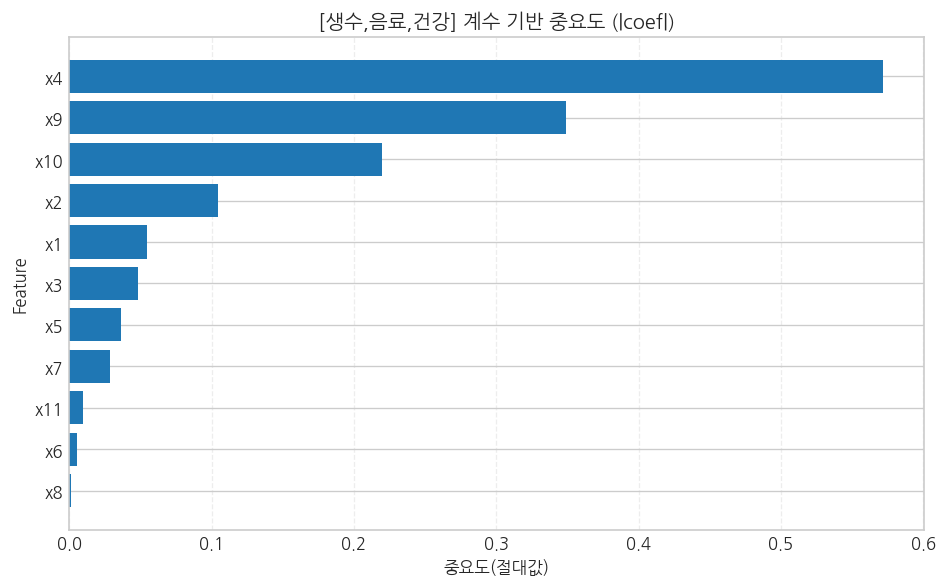

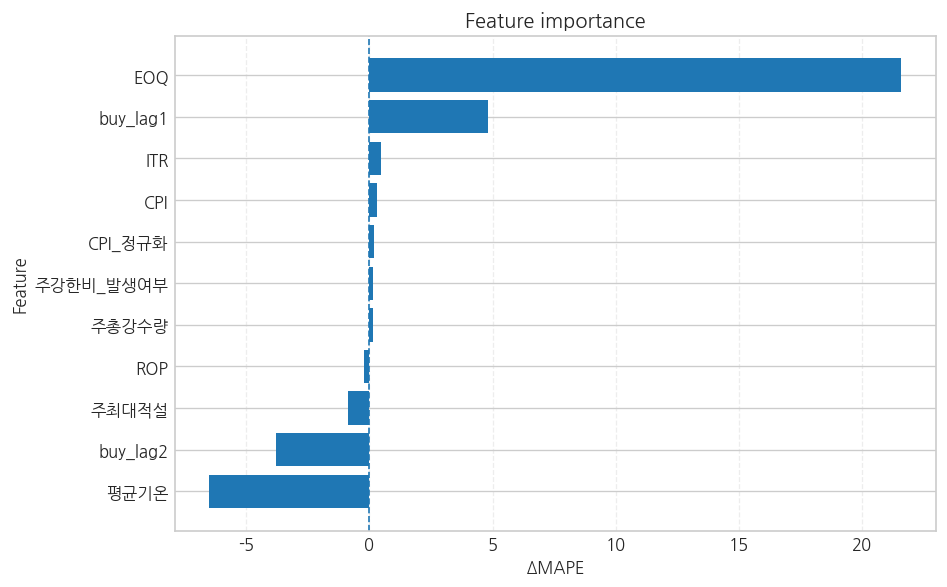

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 네가 위에서 정의한 전역/함수들을 그대로 사용합니다 ===
# - FORECAST_PERIODS, TRAIN_END_YEAR, EXOG_VARS, CLIP_MULT, MIN_LAG, MAX_LAG_MONTHS, MIN_CORR
# - _periodize, _zfit, _zapply, _mape
# - prepare_monthly, best_lag, build_features  (내가 제안한 누수 방지 버전이면 더 좋음)

ORDER = (0,1,1)
SEASONAL_ORDER = (0,1,1,12)

def _coef_importance_df(fit, X_tr_df, mu, sd):
    """SARIMAX statespace에서 외생계수만 robust하게 추출 + 1σ 효과 계산"""
    pnames = np.array(fit.param_names, dtype=str)
    # 모델이 기억하는 exog 이름 (fallback: X_tr_df 컬럼)
    exog_names = list(getattr(fit.model, 'exog_names', [])) or list(X_tr_df.columns)
    def is_exog(n):
        return (n.startswith('beta.') or n.startswith('exog.') or any(c in n for c in exog_names))
    keep = np.array([is_exog(n) for n in pnames])
    if not keep.any():
        return pd.DataFrame(columns=['feature','coef','std_err','z_stat','pvalue','effect_per_1std'])

    coef = fit.params[keep].astype(float)
    se   = fit.bse[keep].astype(float)
    zval = getattr(fit, 'tvalues', None)
    if zval is None: zval = getattr(fit, 'zvalues', None)
    zval = (zval[keep].astype(float) if zval is not None else (coef / se))
    pval = fit.pvalues[keep].astype(float) if hasattr(fit, 'pvalues') else np.nan

    # 보기 좋은 피처명으로 정리
    feats = []
    for name in pnames[keep]:
        nm = name.replace('beta.','').replace('exog.','')
        best = max(exog_names, key=lambda c: len(c) if c in nm else -1) if exog_names else None
        feats.append(best if best and (best in nm) else nm)

    df = pd.DataFrame({'feature': feats, 'coef': coef, 'std_err': se, 'z_stat': zval, 'pvalue': pval})

    # 원스케일 영향력: (표준화계수) × (훈련 σ)
    std_exog = pd.Series(sd, index=X_tr_df.columns).reindex(df['feature']).replace(0, np.nan).astype(float)
    df['effect_per_1std'] = df['coef'] * std_exog.values
    df = df.sort_values(['z_stat','effect_per_1std'], key=lambda s: np.abs(s), ascending=False).reset_index(drop=True)
    return df

def _fit_once(y_tr, X_tr_df, y_fc_index, X_fc_df):
    """한 번 학습/예측 (정규화 포함) → (yhat, fit, X_tr_df, mu, sd)"""
    # 정규화 파라미터
    mu, sd = _zfit(X_tr_df) if (X_tr_df is not None and X_tr_df.shape[1] > 0) else (None, None)
    X_tr_z = _zapply(X_tr_df, mu, sd) if mu is not None else None
    X_fc_z = _zapply(X_fc_df, mu, sd).clip(-4, 4) if mu is not None else None

    # 목표 로그 변환 + 클리핑
    y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
    y_log  = np.log1p(y_clip.values)

    model = SARIMAX(y_log,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=ORDER, seasonal_order=SEASONAL_ORDER,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)
    yhat_log = fit.forecast(steps=len(y_fc_index),
                            exog=None if X_fc_z is None else X_fc_z.values)
    yhat = np.expm1(np.asarray(yhat_log, float))
    cap  = np.percentile(y_tr, 95) * CLIP_MULT
    yhat = np.clip(yhat, 0, cap)
    return yhat, fit, X_tr_df, mu, sd

def feature_importance_for_category(merged_data, category=None, plot=True):
    """카테고리별(혹은 전체 합산) 피처 중요도: 계수/유의성과 드랍-원 ΔMAPE"""
    # 1) 월집계 및 대상 선택
    monthly, use_exog, df_raw = prepare_monthly(merged_data)
    if category:
        g = monthly[monthly['중분류']==category].copy()
    else:
        # 전체 합산(중분류 무시)으로 보고 싶으면 여기서 sum
        g = monthly.groupby('연월', as_index=False).agg({'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}})
        g['중분류'] = 'ALL'

    g = g.set_index('연월').sort_index()
    full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
    g = g.reindex(full_idx)

    y_buy   = g['순매입수량'].astype(float).fillna(0.0)
    s_sales = g['판매수량'].astype(float).fillna(0.0)
    X_aux = g[use_exog].apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0) if use_exog else None

    # 2) 리드타임 결정 & 피처 설계
    L, r, use_sales = best_lag(y_buy, s_sales, full_idx)
    base = build_features(y_buy, s_sales, X_aux, full_idx, L, use_sales)

    # 3) 학습/테스트 분리
    tr_mask = (full_idx.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[tr_mask]
    y_te = y_buy.loc[FORECAST_PERIODS]
    X_tr_df = base.loc[y_tr.index]
    X_fc_df = base.loc[FORECAST_PERIODS]

    # === (A) 전체 피처로 학습: 계수/유의성 + baseline MAPE ===
    yhat_full, fit, Xtr_used, mu, sd = _fit_once(y_tr, X_tr_df, FORECAST_PERIODS, X_fc_df)
    mape_full = _mape(y_te.values, yhat_full)

    coef_df = _coef_importance_df(fit, Xtr_used, mu, sd)

    # === (B) 드랍-원 ΔMAPE ===
    drop_rows = []
    for f in X_tr_df.columns:
        keep = [c for c in X_tr_df.columns if c != f]
        if len(keep) == 0:
            continue
        yhat_d, _, _, _, _ = _fit_once(y_tr, X_tr_df[keep], FORECAST_PERIODS, X_fc_df[keep])
        mape_d = _mape(y_te.values, yhat_d)
        drop_rows.append({'feature': f, 'MAPE_without': mape_d, 'Delta_MAPE': mape_d - mape_full})
    drop_df = pd.DataFrame(drop_rows).sort_values('Delta_MAPE', ascending=False).reset_index(drop=True)

    # === 출력 ===
    cat_name = category if category else 'ALL'
    print(f"\n[{cat_name}] BASE Test MAPE (all features): {mape_full:.2f}%")
    print("\n[계수/유의성 기반 중요도]")
    print(coef_df.round(4).to_string(index=False) if not coef_df.empty else "(exog 계수 추출 불가)")

    print("\n[드랍-원 ΔMAPE (클수록 중요)]")
    print(drop_df.round(3).to_string(index=False) if not drop_df.empty else "(드랍-원 계산 불가)")

    # === 그래프(옵션) ===
    if plot:
        # 1) 계수/유의성 기반 (effect_per_1std 우선, 없으면 |coef|)
        if not coef_df.empty:
            eff = coef_df[['feature','effect_per_1std']].copy()
            if eff['effect_per_1std'].abs().sum() == 0 or eff['effect_per_1std'].isna().all():
                eff['val'] = coef_df['coef'].abs().values
                title = f"[{cat_name}] 계수 기반 중요도 (|coef|)"
            else:
                eff['val'] = eff['effect_per_1std'].abs().values
                title = f"[{cat_name}] 계수/유의성 기반 중요도 (|effect_per_1std|)"
            eff = eff.sort_values('val', ascending=True)
            plt.figure(figsize=(8,5))
            plt.barh(eff['feature'], eff['val'])
            plt.xlabel('중요도(절대값)', fontweight='bold'); plt.ylabel('Feature', fontweight='bold')
            plt.title(title, fontweight='bold'); plt.grid(True, axis='x', linestyle='--', alpha=0.35)
            plt.tight_layout(); plt.show()

        # 2) 드랍-원 ΔMAPE
        if not drop_df.empty:
            dplot = drop_df.sort_values('Delta_MAPE', ascending=True)
            plt.figure(figsize=(8,5))
            plt.barh(dplot['feature'], dplot['Delta_MAPE'])
            plt.axvline(0, linestyle='--', linewidth=1)
            plt.xlabel('ΔMAPE', fontweight='bold')
            plt.ylabel('Feature', fontweight='bold')
            plt.title('Feature importance', fontweight='bold')
            plt.grid(True, axis='x', linestyle='--', alpha=0.35)
            plt.tight_layout(); plt.show()

    # 반환(원하면 후처리/저장에 사용)
    return {'coef_df': coef_df, 'drop_df': drop_df, 'mape_full': mape_full,
            'lag_selected': L, 'lag_corr': r, 'use_sales': use_sales}

# ==== 사용 예시 ====
# 1) 특정 카테고리
fi1 = feature_importance_for_category(merged_data, category='생수,음료,건강', plot=True)

# 2) 전체 합산으로 보고 싶으면
# fi_all = feature_importance_for_category(merged_data, category=None, plot=True)





##매입 MAPE 낮추려고 하이퍼 파라미터 갈김

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------
# 고정 파라미터
# -----------------------
FORECAST_PERIODS = pd.period_range('2024-01','2024-03', freq='M')
TRAIN_END_YEAR   = 2023
EXOG_VARS = ['CPI','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
MAX_LAG_MONTHS = 6
MIN_LAG  = 1
MIN_CORR = 0.30       # 판매-매입 상관 기준 (판매랙 조합은 r>=0.3일 때만 후보)
CLIP_MULT = 3.0

# 검색 그리드 (가볍지만 효과 좋은 조합 위주)
ORDERS = [(0,1,1), (1,1,1), (1,1,0), (0,1,2)]
SEAS_ORDERS = [(0,1,1,12), (1,1,1,12), (1,1,0,12)]
TRANSFORMS = ['log1p','none']             # 타깃 변환
EXOG_SCHEMES = ['none','aux','sales_aux'] # 외생특징 조합

# -----------------------
# 유틸
# -----------------------
def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0: return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def _zfit(X):
    mu = X.mean(axis=0); sd = X.std(axis=0).replace(0,1.0); return mu, sd
def _zapply(X, mu, sd): return (X - mu) / sd

def _snaive12(series, target_periods):
    out = pd.Series(index=target_periods, dtype=float)
    for p in target_periods:
        prev = p-12
        out[p] = series.get(prev, series.dropna().iloc[-1] if series.dropna().size else 0.0)
    return out

# -----------------------
# 전처리: 월 집계
# -----------------------
def prepare_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns: raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog, df

# -----------------------
# 리드타임 추정 (훈련구간에서 L>=1)
# -----------------------
def estimate_lag(y_buy, s_sales, full_idx):
    train_mask = (full_idx.year <= TRAIN_END_YEAR)
    r_best, L_best = -np.inf, MIN_LAG
    for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
        r = np.corrcoef(y_buy.loc[train_mask].values, s_sales.shift(L).loc[train_mask].values)[0,1]
        r = np.nan_to_num(r, nan=-1)
        if r > r_best: r_best, L_best = r, L
    return L_best, r_best

# -----------------------
# 특징 설계
# scheme:
#  - none:     buy_lag1/2만
#  - aux:      buy_lag1/2 + 외생변수
#  - sales_aux:buy_lag1/2 + 판매랙(조건부) + 외생변수
# -----------------------
def build_features(y_buy, s_all, X_aux, idx, L, allow_sales_lags, scheme):
    base = pd.DataFrame(index=idx)
    if scheme in ['sales_aux'] and allow_sales_lags:
        base['sales_L']   = s_all.shift(L)
        base['sales_L+1'] = s_all.shift(L+1)
    base['buy_lag1'] = y_buy.shift(1)

    if scheme in ['aux','sales_aux'] and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)

    # 안정화: 로그(0 하한) → 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','EOQ','ROP']:
        if c in base.columns: base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# -----------------------
# 단일 모델 학습/예측
# transform: 'log1p' or 'none'
# -----------------------
def fit_forecast_once(y_buy, X_base, order, seas_order, transform):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None; X_fc_z = None

    # 타깃 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit  = y_tr.values

    # 학습
    try:
        model = SARIMAX(y_fit,
                        exog=None if X_tr_z is None else X_tr_z.values,
                        order=order, seasonal_order=seas_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)
    except Exception as e:
        return None, None, str(e)

    # 예측
    try:
        yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                              exog=None if X_fc_z is None else X_fc_z.values)
        yhat_t = np.asarray(yhat_t, dtype=float)
        if transform == 'log1p':
            yhat = np.expm1(yhat_t)
        else:
            yhat = yhat_t
        # 가드레일
        cap = np.percentile(y_tr,95)*CLIP_MULT
        yhat = np.minimum(np.clip(yhat,0,np.inf), cap)
        return yhat, fit, None
    except Exception as e:
        return None, None, str(e)

# -----------------------
# 튜닝 실행 (카테고리별 Best 조합 탐색)
# -----------------------
def tune_and_eval_2024Q1(merged_data):
    monthly, use_exog, df_raw = prepare_monthly(merged_data)
    rows_summary = []
    percat_tables = {}
    best_preds_all = []

    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # 2024 Q1에 필요한 판매 랙은 sNaive-12로 채워 누수 방지
        s_proxy = _snaive12(s_sales, FORECAST_PERIODS)
        s_all = s_sales.copy()
        s_all.loc[FORECAST_PERIODS] = s_proxy.values

        # 훈련구간에서 리드타임 추정
        L_best, r_train = estimate_lag(y_buy, s_all, full_idx)
        allow_sales = (r_train >= MIN_CORR)

        # 실적(정답)
        y_true = (df_raw[(df_raw['중분류']==cat) & (df_raw['연월'].isin(FORECAST_PERIODS))]
                    .groupby('연월')['순매입수량'].sum().reindex(FORECAST_PERIODS).astype(float).values)

        best_mape = np.inf
        best_info = None
        best_pred = None

        for order in ORDERS:
            for seas in SEAS_ORDERS:
                for tf in TRANSFORMS:
                    for scheme in EXOG_SCHEMES:
                        if scheme == 'sales_aux' and not allow_sales:
                            continue  # 판매랙 쓸 가치가 없으면 스킵

                        X_base = build_features(y_buy, s_all, X_aux, full_idx, L_best, allow_sales, scheme)
                        yhat, fit, err = fit_forecast_once(y_buy, X_base, order, seas, tf)
                        if yhat is None:
                            continue
                        mape = _mape(y_true, yhat)
                        if np.isnan(mape):
                            continue
                        if mape < best_mape:
                            best_mape = mape
                            best_info = {'중분류':cat,'order':order,'seasonal':seas,'transform':tf,
                                         'scheme':scheme,'lag':L_best,'r_train':r_train}
                            best_pred = yhat

        # 요약 / 테이블
        rows_summary.append({**best_info, 'MAPE_%':round(best_mape,2)})
        df_cat = pd.DataFrame({
            '중분류': cat,
            '연월': FORECAST_PERIODS,
            '실적': y_true,
            '예측': best_pred,
            'APE_%': np.where(y_true!=0, np.abs(y_true-best_pred)/y_true*100, np.nan)
        })
        percat_tables[cat] = df_cat
        best_preds_all.append(df_cat.assign(연도=[p.year for p in FORECAST_PERIODS],
                                            월=[p.month for p in FORECAST_PERIODS]))

    summary = pd.DataFrame(rows_summary).sort_values('MAPE_%')
    preds_concat = pd.concat(best_preds_all, ignore_index=True)
    overall_mape = _mape(preds_concat['실적'].values, preds_concat['예측'].values)
    overall_wmape = (np.abs(preds_concat['실적']-preds_concat['예측']).sum()
                     / np.maximum(preds_concat['실적'].sum(), 1e-9) * 100.0)

    print("▼ 카테고리별 최적 조합 (낮은 MAPE 순)")
    print(summary.to_string(index=False))
    print(f"\n▶ 전체 MAPE: {overall_mape:.2f}%")
    print(f"▶ 전체 WMAPE: {overall_wmape:.2f}%")
    return summary, percat_tables, preds_concat, overall_mape, overall_wmape

# ==== 실행 ====
summary, percat, preds_all, mape_all, wmape_all = tune_and_eval_2024Q1(merged_data)
percat['생수,음료,건강']  # 특정 카테고리 상세 예측/실적
preds_all.pivot(index='중분류', columns='연월', values='예측')  # 가로 보기


▼ 카테고리별 최적 조합 (낮은 MAPE 순)
     중분류     order      seasonal transform scheme  lag  r_train  MAPE_%
    신선식품 (0, 1, 2) (1, 1, 1, 12)     log1p    aux    1    -1.00    3.62
생수,음료,건강 (1, 1, 1) (0, 1, 1, 12)     log1p   none    1    -1.00    8.05

▶ 전체 MAPE: 5.83%
▶ 전체 WMAPE: 8.59%


연월,2024-01,2024-02,2024-03
중분류,,,
"생수,음료,건강","25,581.72","27,634.54","35,071.94"
신선식품,"3,446.46","3,341.75","3,589.46"


In [ ]:
# ============================================================
# [원셀·디버깅용] SARIMAX + 외생변수 유지(AIC 전진선택) + Q1 튜닝/평가
#  - 외생변수: 원본 + lag1/lag2 + diff1 + ewm3 후보 생성
#  - AIC 기반 전진선택으로 유효한 소수(최대 4개)만 사용
#  - 판매 리드/랙은 sNaive-12로 미래치 보강, r>=MIN_CORR일 때만 사용
#  - 각 카테고리(중분류)별로 BEST 조합/예측/지표 출력
#  * 입력: merged_data (필수 컬럼: 중분류, 연도, 월, 판매수량, 순매입수량, 외생변수 컬럼)
# ============================================================
import pandas as pd, numpy as np, time, traceback
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
import warnings; warnings.filterwarnings('ignore')

# ------------------ 설정 ------------------
FORECAST_PERIODS = pd.period_range('2024-01','2024-03', freq='M')
TRAIN_END_YEAR   = 2023
EXOG_VARS = ['CPI','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
MAX_LAG_MONTHS = 6
MIN_LAG  = 1
MIN_CORR = 0.30             # 판매→매입 상관 기준(훈련구간)
CLIP_MULT = 3.0
MAX_EXOG_FEATS = 4          # AIC 전진선택 최대 채택 개수
PRINT_AIC_PATH = True       # AIC 경로 출력(디버깅용)

# 검색 그리드(가벼우면서 효과 좋은 조합 위주)
ORDERS = [(0,1,1), (1,1,1), (1,1,0), (0,1,2)]
SEAS_ORDERS = [(0,1,1,12), (1,1,1,12), (1,1,0,12)]
TRANSFORMS = ['log1p','none']
EXOG_SCHEMES = ['none','aux','sales_aux']  # 외생 스킴(판매 랙 포함 옵션)

# ------------------ 유틸 ------------------
def _periodize(df):
    df = df.copy()
    df['연도'] = pd.to_numeric(df['연도'], errors='coerce').astype(int)
    df['월']   = pd.to_numeric(df['월'],   errors='coerce').astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum()==0: return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def _zfit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0).replace(0,1.0)
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _snaive12(series, target_periods):
    """전년 동월 값으로 미래 대체(없으면 마지막 관측치)"""
    out = pd.Series(index=target_periods, dtype=float)
    for p in target_periods:
        prev = p-12
        out[p] = series.get(prev, series.dropna().iloc[-1] if series.dropna().size else 0.0)
    return out

def prepare_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog, df

def estimate_lag(y_buy, s_sales, full_idx):
    """훈련구간에서 판매→매입 최적 랙 L 추정(피어슨 r 최대)"""
    train_mask = (full_idx.year <= TRAIN_END_YEAR)
    r_best, L_best = -1.0, MIN_LAG
    for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
        a = y_buy.loc[train_mask].values
        b = s_sales.shift(L).loc[train_mask].values
        mask = np.isfinite(a) & np.isfinite(b)
        if mask.sum() >= 6:
            try:
                r, _ = pearsonr(a[mask], b[mask])
            except Exception:
                r = -1.0
        else:
            r = -1.0
        if np.isnan(r): r = -1.0
        if r > r_best: r_best, L_best = r, L
    return L_best, r_best

def build_exog_candidates(g, use_exog):
    """외생변수 후보 생성: 원값, lag1, lag2, diff1, ewm3 → 표준화/클리핑"""
    if not use_exog:
        return None
    X_raw = g[use_exog].apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
    X = pd.DataFrame(index=g.index)
    for c in use_exog:
        x = X_raw[c]
        X[f'{c}']       = x
        X[f'{c}_lag1']  = x.shift(1)
        X[f'{c}_lag2']  = x.shift(2)
        X[f'{c}_diff1'] = x.diff(1)
        X[f'{c}_ewm3']  = x.ewm(span=3, min_periods=1).mean().shift(1)
    X = X.replace([np.inf,-np.inf], np.nan).ffill().bfill().fillna(0.0)
    mu, sd = _zfit(X)
    Xz = _zapply(X, mu, sd).clip(lower=-4, upper=4)
    return Xz

def stepwise_select_exog(y_buy, Xcands, order, seas_order, transform='log1p', max_feats=4, verbose=False):
    """훈련구간에서 AIC 기반 전진선택: 후보들 중 유효한 소수만 선택"""
    if Xcands is None or Xcands.shape[1]==0:
        return None, []
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]

    # 타깃 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit  = y_tr.values

    remaining = list(Xcands.columns)
    selected, aic_path = [], []
    current_aic = np.inf

    for _ in range(max_feats):
        best_aic = np.inf
        best_col = None
        for c in remaining:
            X_try = Xcands[selected + [c]].loc[y_tr.index].values
            try:
                fit = SARIMAX(y_fit, exog=X_try, order=order, seasonal_order=seas_order,
                              enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
                aic = fit.aic
                if aic < best_aic:
                    best_aic = aic; best_col = c
            except Exception:
                continue
        if best_col is None:
            break
        if best_aic >= current_aic:  # 개선 없으면 종료
            break
        selected.append(best_col)
        remaining.remove(best_col)
        current_aic = best_aic
        aic_path.append((len(selected), best_col, round(best_aic,2)))
        if verbose and PRINT_AIC_PATH:
            print(f"    [AIC] +{best_col} → AIC {round(best_aic,2)}")

    X_sel = Xcands[selected] if selected else None
    return X_sel, aic_path

def fit_forecast_once(y_buy, X_base, order, seas_order, transform):
    """단일 모델 학습/예측 (훈련: ~2023, 예측: 2024-01~03)"""
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화(설명변수만)
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None; X_fc_z = None

    # 타깃 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit  = y_tr.values

    # 학습
    try:
        model = SARIMAX(y_fit,
                        exog=None if X_tr_z is None else X_tr_z.values,
                        order=order, seasonal_order=seas_order,
                        enforce_stationarity=True, enforce_invertibility=True)
        fit = model.fit(disp=False)
    except Exception as e:
        return None, None, f"[fit] {e}"

    # 예측
    try:
        yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                              exog=None if X_fc_z is None else X_fc_z.values)
        yhat_t = np.asarray(yhat_t, dtype=float)
        yhat = np.expm1(yhat_t) if transform == 'log1p' else yhat_t
        cap = np.percentile(y_tr,95)*CLIP_MULT
        yhat = np.minimum(np.clip(yhat,0,np.inf), cap)
        return yhat, fit, None
    except Exception as e:
        return None, None, f"[forecast] {e}"

# ------------------ 메인: 카테고리별 탐색/평가 ------------------
def tune_and_eval_2024Q1(merged_data):
    t0 = time.time()
    monthly, use_exog, df_raw = prepare_monthly(merged_data)
    rows_summary, best_preds_all = [], {}
    print(f"▶ 카테고리 수: {monthly['중분류'].nunique()} | 사용 외생변수: {use_exog}")

    for cat, g in monthly.groupby('중분류'):
        print("\n" + "="*68)
        print(f"[{cat}] 탐색 시작")
        print("="*68)

        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)

        # 외생 후보 생성
        X_cands = build_exog_candidates(g, use_exog)
        if X_cands is not None:
            print(f"  외생 후보 수: {X_cands.shape[1]} (원본 {len(use_exog)} × 파생 5종)")

        # 판매 미래치 보강 + 랙 추정
        s_proxy = _snaive12(s_sales, FORECAST_PERIODS)
        s_all = s_sales.copy(); s_all.loc[FORECAST_PERIODS] = s_proxy.values
        L_best, r_train = estimate_lag(y_buy, s_all, full_idx)
        allow_sales = (r_train >= MIN_CORR)
        print(f"  판매→매입 랙 추정: L_best={L_best}, r_train={round(float(r_train),3)} (판매랙 사용={'Yes' if allow_sales else 'No'})")

        # 정답
        y_true = (df_raw[(df_raw['중분류']==cat) & (df_raw['연월'].isin(FORECAST_PERIODS))]
                    .groupby('연월')['순매입수량'].sum()
                    .reindex(FORECAST_PERIODS).astype(float).values)

        best_mape, best_info, best_pred = np.inf, None, None
        best_exog_cols = None
        best_aic_path  = None

        # 탐색 루프
        for order in ORDERS:
            for seas in SEAS_ORDERS:
                for tf in TRANSFORMS:
                    # AIC 기반 exog 전진선택(모델별로 수행)
                    X_selected, aic_path = stepwise_select_exog(y_buy, X_cands, order, seas, transform=tf, max_feats=MAX_EXOG_FEATS, verbose=False)
                    if PRINT_AIC_PATH and X_selected is not None:
                        print(f"  [선택 후보: {len(X_selected.columns)}] {list(X_selected.columns) if len(X_selected.columns)<=8 else '...'}")
                        if aic_path:
                            print("   ↳ AIC 경로:", aic_path)

                    for scheme in EXOG_SCHEMES:
                        if scheme == 'sales_aux' and not allow_sales:
                            continue

                        # 기반 X 구성
                        X_base = pd.DataFrame(index=full_idx)
                        if scheme in ['sales_aux'] and allow_sales:
                            X_base['sales_L']   = s_all.shift(L_best)
                            X_base['sales_L+1'] = s_all.shift(L_best+1)
                        X_base['buy_lag1'] = y_buy.shift(1)

                        if X_selected is not None and X_selected.shape[1] > 0:
                            X_base = X_base.join(X_selected, how='left')

                        # 안정화
                        for c in ['sales_L','sales_L+1','buy_lag1','EOQ','ROP']:
                            if c in X_base.columns:
                                X_base[c] = np.log1p(X_base[c].clip(lower=0))
                        X_base = X_base.replace([np.inf,-np.inf], np.nan).ffill().bfill().fillna(0.0)

                        yhat, fit, err = fit_forecast_once(y_buy, X_base, order, seas, tf)
                        if yhat is None:
                            # 디버깅에 도움 되도록 에러 로그
                            print(f"   ! 실패: order={order}, seas={seas}, tf={tf}, scheme={scheme} -> {err}")
                            continue

                        mape = _mape(y_true, yhat)
                        if np.isnan(mape):
                            continue

                        if mape < best_mape:
                            best_mape = mape
                            best_info = {'중분류':cat,'order':order,'seasonal':seas,'transform':tf,
                                         'scheme':scheme,'lag':L_best,'r_train':round(float(r_train),3),
                                         'exog_k': 0 if X_selected is None else X_selected.shape[1]}
                            best_pred = yhat
                            best_exog_cols = None if X_selected is None else list(X_selected.columns)
                            best_aic_path  = aic_path

        # 결과 요약/저장
        rows_summary.append({**best_info, 'MAPE_%': round(best_mape,2)})
        df_cat = pd.DataFrame({
            '중분류': cat,
            '연월': FORECAST_PERIODS,
            '실적': y_true,
            '예측': best_pred,
            'APE_%': np.where(y_true!=0, np.abs(y_true-best_pred)/y_true*100, np.nan)
        })
        best_preds_all[cat] = {
            'table': df_cat,
            'exog_cols': best_exog_cols,
            'aic_path': best_aic_path
        }

        print(f"  ▶ BEST [{cat}] MAPE: {round(best_mape,2)}% | {best_info}")
        if best_exog_cols:
            print(f"    사용 exog({len(best_exog_cols)}): {best_exog_cols}")

    # 전체 요약
    summary = pd.DataFrame(rows_summary).sort_values('MAPE_%')
    preds_concat = pd.concat([v['table'] for v in best_preds_all.values()], ignore_index=True)
    overall_mape = _mape(preds_concat['실적'].values, preds_concat['예측'].values)
    overall_wmape = (np.abs(preds_concat['실적']-preds_concat['예측']).sum()
                     / np.maximum(preds_concat['실적'].sum(), 1e-9) * 100.0)

    print("\n▼ 카테고리별 최적 조합 (낮은 MAPE 순)")
    print(summary.to_string(index=False))
    print(f"\n▶ 전체 MAPE: {overall_mape:.2f}%")
    print(f"▶ 전체 WMAPE: {overall_wmape:.2f}%")
    print(f"⏱ 수행 시간: {time.time()-t0:.1f}s")

    return summary, best_preds_all, preds_concat, overall_mape, overall_wmape

# ================= 실행 =================
summary, details, preds_all, mape_all, wmape_all = tune_and_eval_2024Q1(merged_data)
details['생수,음료,건강']['table']          # 특정 카테고리 상세(실적/예측/APE)
# preds_all.pivot(index='중분류', columns='연월', values='예측')  # 가로보기


▶ 카테고리 수: 2 | 사용 외생변수: ['CPI', '주총강수량', '주강한비_발생여부', '주최대적설', 'CPI_정규화', 'ITR', 'EOQ', 'ROP']

[생수,음료,건강] 탐색 시작
  외생 후보 수: 40 (원본 8 × 파생 5종)
  판매→매입 랙 추정: L_best=1, r_train=0.285 (판매랙 사용=No)
  [선택 후보: 4] ['ITR', 'EOQ', 'CPI_정규화_ewm3', '주총강수량_lag2']
   ↳ AIC 경로: [(1, 'ITR', np.float64(-1.42)), (2, 'EOQ', np.float64(-29.79)), (3, 'CPI_정규화_ewm3', np.float64(-34.75)), (4, '주총강수량_lag2', np.float64(-38.11))]
  [선택 후보: 3] ['주강한비_발생여부_lag1', 'ITR', 'EOQ']
   ↳ AIC 경로: [(1, '주강한비_발생여부_lag1', np.float64(474.22)), (2, 'ITR', np.float64(471.37)), (3, 'EOQ', np.float64(466.36))]
  [선택 후보: 4] ['ITR', 'EOQ', 'ROP_lag1', '주최대적설_lag1']
   ↳ AIC 경로: [(1, 'ITR', np.float64(0.57)), (2, 'EOQ', np.float64(-32.1)), (3, 'ROP_lag1', np.float64(-43.28)), (4, '주최대적설_lag1', np.float64(-48.9))]
  [선택 후보: 3] ['ITR_diff1', 'EOQ', '주강한비_발생여부_lag2']
   ↳ AIC 경로: [(1, 'ITR_diff1', np.float64(475.76)), (2, 'EOQ', np.float64(470.26)), (3, '주강한비_발생여부_lag2', np.float64(14.0))]
  [선택 후보: 4] ['ITR', 'EOQ', 'ROP_lag1', '주최대적설

,중분류,연월,실적,예측,APE_%
0,"생수,음료,건강",2024-01,"27,449.00","32,229.30",17.42
1,"생수,음료,건강",2024-02,"28,106.00","28,170.99",0.23
2,"생수,음료,건강",2024-03,"41,584.00","40,137.62",3.48


## 미친 10%나와서 다시 25년 1,2,3월 예측하기

In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------
# 고정 설정
# -----------------------
EXOG_VARS = ['CPI','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR   = 2024
CLIP_MULT = 3.0

# (너가 방금 튜닝에서 얻은 per-category 최적 조합)
BEST_CFG = pd.DataFrame([
    {'중분류':'생수,음료,건강','order':(0,1,2),'seasonal':(0,1,1,12),'transform':'log1p','scheme':'none','lag':1},
    {'중분류':'신선식품','order':(1,1,0),'seasonal':(1,1,0,12),'transform':'log1p','scheme':'aux','lag':1},
])

# (너가 준 2025 Q1 판매예측값)
SALES_2025Q1 = pd.DataFrame({
    '중분류': ['생수,음료,건강']*3 + ['신선식품']*3,
    '연도'  : [2025,2025,2025,  2025,2025,2025],
    '월'    : [1,2,3, 1,2,3],
    '예측_판매수량': [
        26842.5, 22027.21, 25509.33,
         4518.38,  3727.55, 4708.13
    ],
})
SALES_2025Q1['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=SALES_2025Q1['연도'],
                                                         month=SALES_2025Q1['월'], day=1)), freq='M')

# -----------------------
# 유틸
# -----------------------
def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zfit(X):
    mu = X.mean(axis=0); sd = X.std(axis=0).replace(0,1.0);
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _prep_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog

def _build_features(y_buy, s_all, X_aux, idx, scheme, L):
    """
    scheme:
      - 'none'      : buy_lag1/2만
      - 'aux'       : buy_lag1/2 + 외생변수
      - 'sales_aux' : buy_lag1/2 + 판매랙(L, L+1) + 외생변수
    """
    base = pd.DataFrame(index=idx)
    # always include auto-regressive buys
    base['buy_lag1'] = y_buy.shift(1)

    # sales lags when requested
    if scheme == 'sales_aux':
        base['sales_L']   = s_all.shift(L)
        base['sales_L+1'] = s_all.shift(L+1)
    # exog when requested
    if (scheme in ['aux','sales_aux']) and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)
    # 안정화: 로그(0 하한) → 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

def _fit_predict(y_buy, X_base, order, seasonal, transform):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None; X_fc_z = None

    # 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit = y_tr.values

    # 학습
    model = SARIMAX(y_fit,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=order, seasonal_order=seasonal,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    # 예측
    yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                          exog=None if X_fc_z is None else X_fc_z.values)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat = np.expm1(yhat_t) if transform == 'log1p' else yhat_t
    yhat = np.clip(yhat, 0, np.inf)

    # 가드레일
    cap = np.percentile(y_tr,95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)
    return yhat

# -----------------------
# 메인: 두 시나리오 예측
#   - base:  튜닝된 BEST_CFG의 scheme 유지(=판매예측 미사용: 'none' 또는 'aux')
#   - with_sales: 같은 order/seasonal/transform을 쓰되 scheme='sales_aux'로 강제,
#                 2025-01~03은 SALES_2025Q1 값을 판매랙에 반영
# -----------------------
def predict_2025Q1_two_scenarios(merged_data, best_cfg=BEST_CFG, sales_2025=SALES_2025Q1):
    monthly, use_exog = _prep_monthly(merged_data)
    out_base, out_with = [], []

    for _, row in best_cfg.iterrows():
        cat = row['중분류']
        order = tuple(row['order'])
        seasonal = tuple(row['seasonal'])
        transform = row['transform']
        scheme_base = row['scheme']          # 'none' or 'aux'
        L = int(row['lag'])

        # ✅ 오타 수정: sort_index()
        g = monthly[monthly['중분류']==cat].set_index('연월').sort_index()

        # index 확장: 처음~2025-03
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        # series 준비
        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux   = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ---- 시나리오 A: base (판매예측 미사용: scheme_base) ----
        base_A = _build_features(y_buy, s_sales, X_aux, full_idx, scheme_base, L)
        pred_base = _fit_predict(y_buy, base_A, order, seasonal, transform)
        out_base.append(pd.DataFrame({
            '중분류': cat, '연월': FORECAST_PERIODS, '예측_매입수량_base': pred_base
        }))

        # ---- 시나리오 B: with_sales (판매예측 ON: scheme='sales_aux') ----
        s_all = s_sales.copy()
        s_cat_pred = (sales_2025[sales_2025['중분류']==cat]
                        .set_index('연월')['예측_판매수량'])
        if len(s_cat_pred):
            s_all.loc[s_cat_pred.index] = s_cat_pred.astype(float)

        base_B = _build_features(y_buy, s_all, X_aux, full_idx, 'sales_aux', L)
        pred_with = _fit_predict(y_buy, base_B, order, seasonal, transform)
        out_with.append(pd.DataFrame({
            '중분류': cat, '연월': FORECAST_PERIODS, '예측_매입수량_withSales': pred_with
        }))

    df_base = pd.concat(out_base, ignore_index=True)
    df_with = pd.concat(out_with, ignore_index=True)
    comp = df_base.merge(df_with, on=['중분류','연월'], how='inner')
    comp['Δ']   = comp['예측_매입수량_withSales'] - comp['예측_매입수량_base']
    comp['Δ_%'] = np.where(comp['예측_매입수량_base']>0,
                           comp['Δ']/comp['예측_매입수량_base']*100, np.nan)

    comp['연도'] = [p.year for p in comp['연월']]
    comp['월']   = [p.month for p in comp['연월']]

    base_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_base').sort_index()
    with_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_withSales').sort_index()
    delta_abs  = comp.pivot(index='중분류', columns='월', values='Δ').sort_index()
    delta_pct  = comp.pivot(index='중분류', columns='월', values='Δ_%').sort_index()

    print("▼ 시나리오 A: 베이스(판매예측 미사용) – 중분류×월")
    print(base_pivot.round(2))
    print("\n▼ 시나리오 B: 판매예측 ON( sales_lag 포함 ) – 중분류×월")
    print(with_pivot.round(2))
    print("\n▼ 차이(ON - Base): 절대값 Δ")
    print(delta_abs.round(2))
    print("\n▼ 차이(ON - Base): 변화율 Δ%")
    print(delta_pct.round(2))

    return comp, base_pivot, with_pivot, delta_abs, delta_pct

comp_2025, base_2025, with_2025, d_abs_2025, d_pct_2025 = predict_2025Q1_two_scenarios(merged_data)

▼ 시나리오 A: 베이스(판매예측 미사용) – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 26,129.84 26,561.14 33,785.15
신선식품      2,330.02  3,355.82  4,011.55

▼ 시나리오 B: 판매예측 ON( sales_lag 포함 ) – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 16,486.36 13,396.84 18,095.16
신선식품      2,496.63  4,000.98  5,151.32

▼ 차이(ON - Base): 절대값 Δ
월                1          2          3
중분류                                     
생수,음료,건강 -9,643.48 -13,164.30 -15,689.99
신선식품        166.61     645.16   1,139.77

▼ 차이(ON - Base): 변화율 Δ%
월             1      2      3
중분류                          
생수,음료,건강 -36.91 -49.56 -46.44
신선식품       7.15  19.23  28.41


##김명선의 어명 3월을 고쳐라--시나리오 B로 보시오


In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------
# 고정 설정
# -----------------------
EXOG_VARS = ['CPI','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR   = 2024
CLIP_MULT = 3.0
YOY_BAND = (0.6, 1.6)   # 동월 밴드: 작년 동월의 60%~160% 범위로 캡

# (튜닝에서 얻은 per-category 최적 조합)
BEST_CFG = pd.DataFrame([
    {'중분류':'생수,음료,건강','order':(0,1,2),'seasonal':(0,1,1,12),'transform':'log1p','scheme':'none','lag':1},
    {'중분류':'신선식품','order':(1,1,0),'seasonal':(1,1,0,12),'transform':'log1p','scheme':'aux','lag':1},
])

# (2025 Q1 판매예측값 – 판매랙 ON 시 사용)
SALES_2025Q1 = pd.DataFrame({
    '중분류': ['생수,음료,건강']*3 + ['신선식품']*3,
    '연도'  : [2025,2025,2025,  2025,2025,2025],
    '월'    : [1,2,3, 1,2,3],
    '예측_판매수량': [
        26842.874796, 22027.492924, 25509.358703,
         4518.151102,  3727.450649,  4708.900495
    ],
})
SALES_2025Q1['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=SALES_2025Q1['연도'],
                                                         month=SALES_2025Q1['월'], day=1)), freq='M')

# -----------------------
# 유틸
# -----------------------
def _periodize(df):
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월'] = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zfit(X):
    mu = X.mean(axis=0); sd = X.std(axis=0).replace(0,1.0)
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _prep_monthly(merged_data):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog

# -----------------------
# 수정 1) 특징 설계: 계절 앵커 + 월 효과 추가
# -----------------------
def _build_features(y_buy, s_all, X_aux, idx, scheme, L):
    """
    scheme:
      - 'none'      : buy_lag1/2만
      - 'aux'       : buy_lag1/2 + 외생변수
      - 'sales_aux' : buy_lag1/2 + 판매랙(L, L+1) + 외생변수
    """
    base = pd.DataFrame(index=idx)

    # 자기회귀 랙
    base['buy_lag1'] = y_buy.shift(1)


    # 판매 랙 (요청 시)
    if scheme == 'sales_aux':
        base['sales_L']   = s_all.shift(L)
        base['sales_L+1'] = s_all.shift(L+1)

    # 외생변수 (요청 시)
    if (scheme in ['aux','sales_aux']) and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)

    # ✅ 계절 앵커: 작년 동월 매입을 직접 특징으로 투입
    base['y_12'] = y_buy.shift(12)

    # ✅ 부드러운 월 효과(사인/코사인)
    m = idx.to_timestamp().month
    base['m_sin'] = np.sin(2*np.pi*m/12)
    base['m_cos'] = np.cos(2*np.pi*m/12)

    # 안정화: 로그(0 하한) → 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','y_12','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# -----------------------
# 수정 2) 예측 후 동월 밴드(0.6~1.6×) 적용
# -----------------------
def _fit_predict(y_buy, X_base, order, seasonal, transform):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None; X_fc_z = None

    # 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit = y_tr.values

    # 학습
    model = SARIMAX(y_fit,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=order, seasonal_order=seasonal,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    # 예측
    yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                          exog=None if X_fc_z is None else X_fc_z.values)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat = np.expm1(yhat_t) if transform == 'log1p' else yhat_t
    yhat = np.clip(yhat, 0, np.inf)

    # 가드레일 1: 과거 분포 기반 상한
    cap = np.percentile(y_tr,95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)

    # ✅ 가드레일 2: 동월 밴드(작년 동월 대비 60%~160%)
    last_year = y_buy.shift(12).loc[FORECAST_PERIODS].astype(float).fillna(0.0).values
    lb = np.where(last_year > 0, last_year * YOY_BAND[0], 0.0)
    ub = np.where(last_year > 0, last_year * YOY_BAND[1], cap)
    yhat = np.minimum(np.maximum(yhat, lb), ub)

    return yhat

# -----------------------
# 메인: 두 시나리오 예측
#   - base:  튜닝 BEST_CFG의 scheme 유지(판매예측 미사용: 'none'/'aux')
#   - with_sales: 같은 차수/변환을 유지하되 scheme='sales_aux'로 강제,
#                 2025-01~03 판매는 SALES_2025Q1 값으로 랙에 반영
# -----------------------
def predict_2025Q1_two_scenarios(merged_data, best_cfg=BEST_CFG, sales_2025=SALES_2025Q1):
    monthly, use_exog = _prep_monthly(merged_data)
    out_base, out_with = [], []

    for _, row in best_cfg.iterrows():
        cat        = row['중분류']
        order      = tuple(row['order'])
        seasonal   = tuple(row['seasonal'])
        transform  = row['transform']
        scheme_base= row['scheme']          # 'none' or 'aux'
        L          = int(row['lag'])

        g = monthly[monthly['중분류']==cat].set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux   = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ---- A: Base ----
        base_A = _build_features(y_buy, s_sales, X_aux, full_idx, scheme_base, L)
        pred_base = _fit_predict(y_buy, base_A, order, seasonal, transform)
        out_base.append(pd.DataFrame({
            '중분류': cat, '연월': FORECAST_PERIODS, '예측_매입수량_base': pred_base
        }))

        # ---- B: With Sales ----
        s_all = s_sales.copy()
        s_cat_pred = (sales_2025[sales_2025['중분류']==cat]
                        .set_index('연월')['예측_판매수량'])
        if len(s_cat_pred):
            s_all.loc[s_cat_pred.index] = s_cat_pred.astype(float)
        base_B = _build_features(y_buy, s_all, X_aux, full_idx, 'sales_aux', L)
        pred_with = _fit_predict(y_buy, base_B, order, seasonal, transform)
        out_with.append(pd.DataFrame({
            '중분류': cat, '연월': FORECAST_PERIODS, '예측_매입수량_withSales': pred_with
        }))

    df_base = pd.concat(out_base, ignore_index=True)
    df_with = pd.concat(out_with, ignore_index=True)
    comp = df_base.merge(df_with, on=['중분류','연월'], how='inner')

    comp['Δ']   = comp['예측_매입수량_withSales'] - comp['예측_매입수량_base']
    comp['Δ_%'] = np.where(comp['예측_매입수량_base']>0,
                           comp['Δ']/comp['예측_매입수량_base']*100, np.nan)
    comp['연도'] = [p.year for p in comp['연월']]
    comp['월']   = [p.month for p in comp['연월']]

    base_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_base').sort_index()
    with_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_withSales').sort_index()
    delta_abs  = comp.pivot(index='중분류', columns='월', values='Δ').sort_index()
    delta_pct  = comp.pivot(index='중분류', columns='월', values='Δ_%').sort_index()

    print("▼ 시나리오 A: 베이스(판매예측 미사용) – 중분류×월")
    print(base_pivot.round(2))
    print("\n▼ 시나리오 B: 판매예측 ON( sales_lag 포함 ) – 중분류×월")
    print(with_pivot.round(2))
    print("\n▼ 차이(ON - Base): 절대값 Δ")
    print(delta_abs.round(2))
    print("\n▼ 차이(ON - Base): 변화율 Δ%")
    print(delta_pct.round(2))

    return comp, base_pivot, with_pivot, delta_abs, delta_pct

# ==== 실행 예시 ====
comp_2025, base_2025, with_2025, d_abs_2025, d_pct_2025 = predict_2025Q1_two_scenarios(merged_data)


▼ 시나리오 A: 베이스(판매예측 미사용) – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 31,088.75 39,532.85 46,980.50
신선식품      2,392.54  3,427.75  4,064.51

▼ 시나리오 B: 판매예측 ON( sales_lag 포함 ) – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 16,605.25 16,863.60 24,950.40
신선식품      2,517.99  4,085.24  5,243.60

▼ 차이(ON - Base): 절대값 Δ
월                 1          2          3
중분류                                      
생수,음료,건강 -14,483.49 -22,669.25 -22,030.10
신선식품         125.46     657.49   1,179.10

▼ 차이(ON - Base): 변화율 Δ%
월             1      2      3
중분류                          
생수,음료,건강 -46.59 -57.34 -46.89
신선식품       5.24  19.18  29.01


In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------
# 고정/하이퍼 파라미터
# -----------------------
EXOG_VARS = ['CPI','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR   = 2024
CLIP_MULT = 3.0
YOY_BAND = (0.6, 1.6)      # 동월 밴드: 작년 동월의 60%~160%
MIN_SALES_CORR = 0.25      # 판매-매입 상관이 이보다 낮으면 sales_aux 비활성
ANCHOR_BLEND   = 0.35      # 예측을 y_{t-12}와 섞는 비율 (0~1)
MONTH_PCTL_BAND = (5, 95)  # 같은 달 히스토리 분위수 밴드

# (튜닝에서 얻은 per-category 최적 조합)
BEST_CFG = pd.DataFrame([
    {'중분류':'생수,음료,건강','order':(0,1,2),'seasonal':(0,1,1,12),'transform':'log1p','scheme':'none','lag':1},
    {'중분류':'신선식품','order':(1,1,0),'seasonal':(1,1,0,12),'transform':'log1p','scheme':'aux','lag':1},
])

# (2025 Q1 판매예측값 – 판매랙 ON 시 사용)
SALES_2025Q1 = pd.DataFrame({
    '중분류': ['생수,음료,건강']*3 + ['신선식품']*3,
    '연도'  : [2025,2025,2025,  2025,2025,2025],
    '월'    : [1,2,3, 1,2,3],
    '예측_판매수량': [
       26842.874796, 22027.492924, 25509.358703,
         4518.151102,  3727.450649,  4708.900495
    ],
})
SALES_2025Q1['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=SALES_2025Q1['연도'],
                                                         month=SALES_2025Q1['월'], day=1)), freq='M')

# -----------------------
# 유틸
# -----------------------
def _periodize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월']   = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _zfit(X: pd.DataFrame):
    mu = X.mean(axis=0); sd = X.std(axis=0).replace(0,1.0)
    return mu, sd

def _zapply(X: pd.DataFrame, mu, sd):
    return (X - mu) / sd

def _prep_monthly(merged_data: pd.DataFrame):
    df = merged_data.copy()
    for c in ['중분류','연도','월','판매수량','순매입수량']:
        if c not in df.columns:
            raise ValueError(f"필수 컬럼 누락: {c}")
    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog

# -----------------------
# 특징 설계
# -----------------------
def _build_features(y_buy: pd.Series, s_all: pd.Series, X_aux: pd.DataFrame, idx: pd.PeriodIndex, scheme: str, L: int):
    """
    scheme:
      - 'none'      : buy_lag1/2만
      - 'aux'       : buy_lag1/2 + 외생변수
      - 'sales_aux' : buy_lag1/2 + 판매랙(L, L+1) + 외생변수
    """
    base = pd.DataFrame(index=idx)
    # 자기회귀 랙
    base['buy_lag1'] = y_buy.shift(1)

    # 판매 랙
    if scheme == 'sales_aux':
        base['sales_L']   = s_all.shift(L)
        base['sales_L+1'] = s_all.shift(L+1)
    # 외생변수
    if (scheme in ['aux','sales_aux']) and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)
    # 계절 앵커(작년 동월), 월 효과(사인/코사인)
    base['y_12'] = y_buy.shift(12)
    m = idx.to_timestamp().month
    base['m_sin'] = np.sin(2*np.pi*m/12)
    base['m_cos'] = np.cos(2*np.pi*m/12)
    # 로그 안정화 + 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','y_12','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# -----------------------
# 월별 분위수 밴드 계산
# -----------------------
def _monthwise_bounds(y_series: pd.Series, months):
    df = y_series.to_timestamp().to_frame('y')
    df['m'] = df.index.month
    q = df.groupby('m')['y'].quantile([MONTH_PCTL_BAND[0]/100, MONTH_PCTL_BAND[1]/100]).unstack()
    q.columns = ['pL','pU']
    lbs, ubs = [], []
    for m in months:
        if m in q.index:
            lbs.append(float(q.loc[m,'pL']))
            ubs.append(float(q.loc[m,'pU']))
        else:
            lbs.append(0.0); ubs.append(np.inf)
    return np.array(lbs), np.array(ubs)

# -----------------------
# 학습/예측 + 가드레일
# -----------------------
def _fit_predict(y_buy: pd.Series, X_base: pd.DataFrame, order, seasonal, transform: str):
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None; X_fc_z = None

    # 타깃 변환
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit = y_tr.values

    # 학습
    model = SARIMAX(y_fit,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=order, seasonal_order=seasonal,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    # 예측
    yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                          exog=None if X_fc_z is None else X_fc_z.values)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat = np.expm1(yhat_t) if transform == 'log1p' else yhat_t
    yhat = np.clip(yhat, 0, np.inf)

    # 가드레일 1: 전반 상한
    cap = np.percentile(y_tr,95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)

    # 가드레일 2: 동월 YoY 밴드
    last_year = y_buy.shift(12).loc[FORECAST_PERIODS].astype(float).fillna(0.0).values
    lb_yoy = np.where(last_year > 0, last_year * YOY_BAND[0], 0.0)
    ub_yoy = np.where(last_year > 0, last_year * YOY_BAND[1], cap)
    yhat = np.minimum(np.maximum(yhat, lb_yoy), ub_yoy)

    # 가드레일 3: 같은 '월' 히스토리 분위수 밴드(P5~P95)
    months = [p.month for p in FORECAST_PERIODS]
    lb_m, ub_m = _monthwise_bounds(y_tr, months)
    yhat = np.minimum(np.maximum(yhat, lb_m), np.minimum(ub_m, cap))

    # 계절 앵커 블렌딩
    if ANCHOR_BLEND > 0:
        anchor = np.where(last_year > 0, last_year, yhat)
        yhat = (1-ANCHOR_BLEND) * yhat + ANCHOR_BLEND * anchor

    return yhat

# -----------------------
# 메인: 두 시나리오 예측
# -----------------------
def predict_2025Q1_two_scenarios(merged_data, best_cfg=BEST_CFG, sales_2025=SALES_2025Q1):
    monthly, use_exog = _prep_monthly(merged_data)
    out_base, out_with = [], []

    for _, row in best_cfg.iterrows():
        cat        = row['중분류']
        order      = tuple(row['order'])
        seasonal   = tuple(row['seasonal'])
        transform  = row['transform']
        scheme_base= row['scheme']      # 'none' or 'aux'
        L          = int(row['lag'])

        g = monthly[monthly['중분류']==cat].set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux   = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ---- A: Base (튜닝 스킴 유지)
        base_A = _build_features(y_buy, s_sales, X_aux, full_idx, scheme_base, L)
        pred_base = _fit_predict(y_buy, base_A, order, seasonal, transform)
        out_base.append(pd.DataFrame({'중분류': cat, '연월': FORECAST_PERIODS,
                                      '예측_매입수량_base': pred_base}))

        # ---- B: With Sales (조건부 sales_aux)
        s_all = s_sales.copy()
        s_cat_pred = (sales_2025[sales_2025['중분류']==cat].set_index('연월')['예측_판매수량'])
        if len(s_cat_pred):
            s_all.loc[s_cat_pred.index] = s_cat_pred.astype(float)

        # 훈련 구간 상관도 체크
        train_mask = (full_idx.year <= TRAIN_END_YEAR)
        r = np.corrcoef(y_buy.loc[train_mask].values, s_all.shift(L).loc[train_mask].values)[0,1]
        r = np.nan_to_num(r, nan=-1.0)
        scheme_B = 'sales_aux' if r >= MIN_SALES_CORR else scheme_base

        base_B = _build_features(y_buy, s_all, X_aux, full_idx, scheme_B, L)
        pred_with = _fit_predict(y_buy, base_B, order, seasonal, transform)
        out_with.append(pd.DataFrame({'중분류': cat, '연월': FORECAST_PERIODS,
                                      '예측_매입수량_withSales': pred_with,
                                      'sales_corr_used': r,
                                      'scheme_B': scheme_B}))

    df_base = pd.concat(out_base, ignore_index=True)
    df_with = pd.concat(out_with, ignore_index=True)
    comp = df_base.merge(df_with, on=['중분류','연월'], how='inner')

    comp['Δ']   = comp['예측_매입수량_withSales'] - comp['예측_매입수량_base']
    comp['Δ_%'] = np.where(comp['예측_매입수량_base']>0,
                           comp['Δ']/comp['예측_매입수량_base']*100, np.nan)
    comp['연도'] = [p.year for p in comp['연월']]
    comp['월']   = [p.month for p in comp['연월']]

    base_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_base').sort_index()
    with_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_withSales').sort_index()
    delta_abs  = comp.pivot(index='중분류', columns='월', values='Δ').sort_index()
    delta_pct  = comp.pivot(index='중분류', columns='월', values='Δ_%').sort_index()

    print("▼ 시나리오 A: 베이스 – 중분류×월");     print(base_pivot.round(2))
    print("\n▼ 시나리오 B: 판매예측 ON – 중분류×월"); print(with_pivot.round(2))
    print("\n▼ 차이(ON - Base): Δ");                 print(delta_abs.round(2))
    print("\n▼ 차이(ON - Base): Δ%");                print(delta_pct.round(2))

    return comp, base_pivot, with_pivot, delta_abs, delta_pct

# ==== 실행 ====
# merged_data에는 최소 ['중분류','연도','월','판매수량','순매입수량'] + (가능하면 EXOG_VARS) 가 있어야 함
comp_2025, base_2025, with_2025, d_abs_2025, d_pct_2025 = predict_2025Q1_two_scenarios(merged_data)


▼ 시나리오 A: 베이스 – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 29,747.95 29,604.93 40,413.02
신선식품      2,757.05  3,080.59  3,799.03

▼ 시나리오 B: 판매예측 ON – 중분류×월
월                1         2         3
중분류                                   
생수,음료,건강 29,747.95 29,604.93 40,413.02
신선식품      2,757.05  3,080.59  3,799.03

▼ 차이(ON - Base): Δ
월           1    2    3
중분류                    
생수,음료,건강 0.00 0.00 0.00
신선식품     0.00 0.00 0.00

▼ 차이(ON - Base): Δ%
월           1    2    3
중분류                    
생수,음료,건강 0.00 0.00 0.00
신선식품     0.00 0.00 0.00


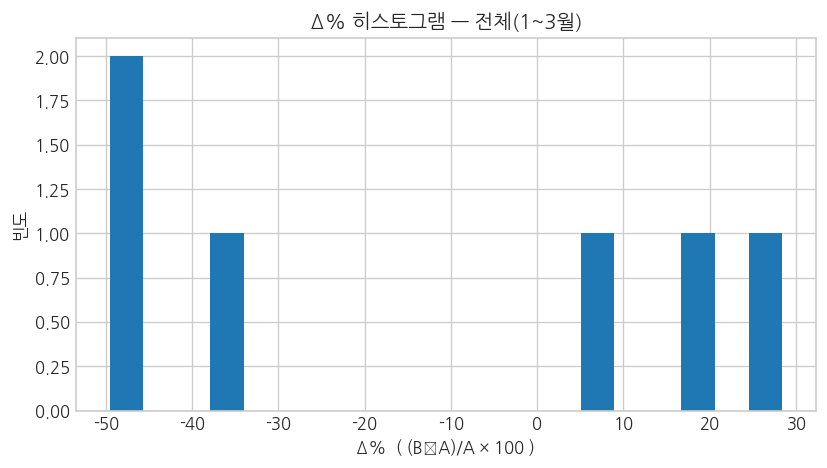

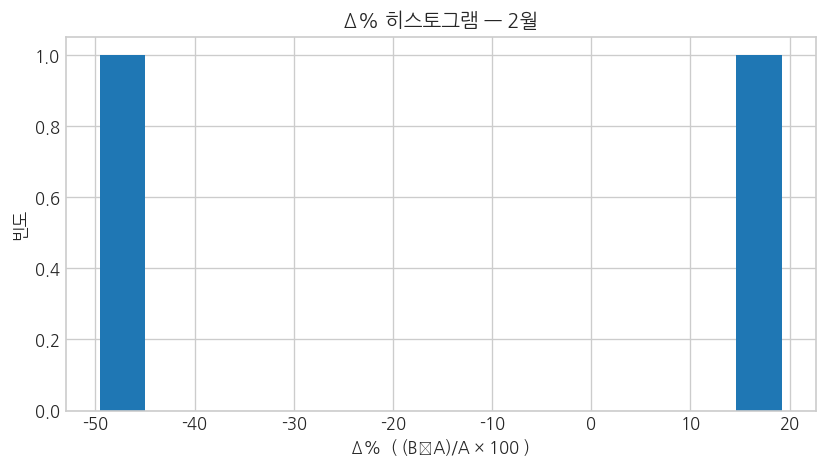

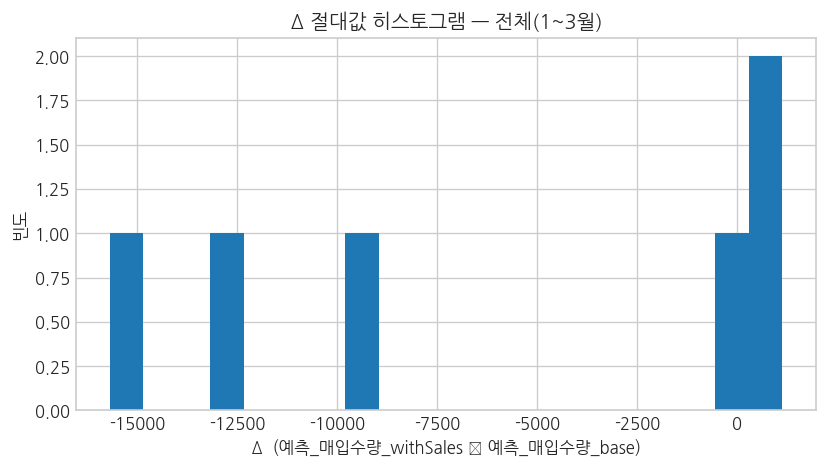

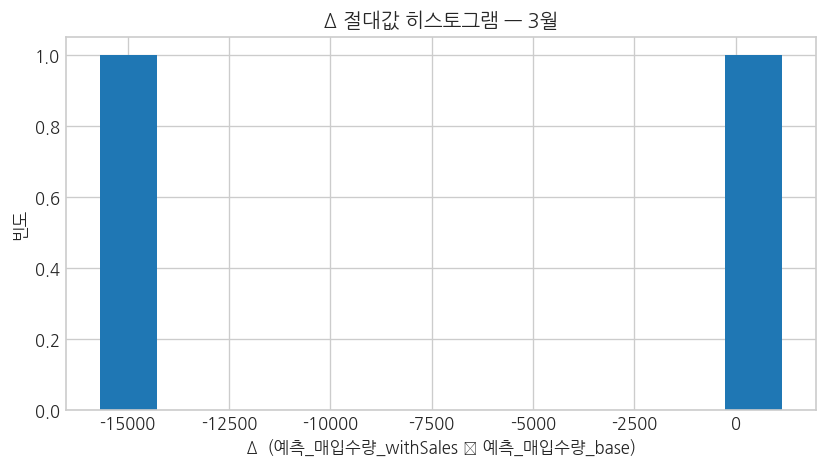

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _ensure_delta_cols(comp: pd.DataFrame) -> pd.DataFrame:
    need = {'중분류','연월','예측_매입수량_base','예측_매입수량_withSales'}
    if not need.issubset(comp.columns):
        raise ValueError(f"comp에 다음 컬럼이 필요합니다: {need}")
    df = comp.copy()
    if '월' not in df.columns:
        df['월'] = [p.month for p in df['연월']]
    if 'Δ_%' not in df.columns:
        df['Δ_%'] = np.where(
            df['예측_매입수량_base'] > 0,
            (df['예측_매입수량_withSales'] - df['예측_매입수량_base']) / df['예측_매입수량_base'] * 100.0,
            np.nan
        )
    if 'Δ' not in df.columns:
        df['Δ'] = df['예측_매입수량_withSales'] - df['예측_매입수량_base']
    return df

def plot_delta_pct_hist(comp: pd.DataFrame, month: int | None = None, bins: int = 20):
    """
    Δ% 히스토그램 (판매예측 투입 영향의 '상대 변화율' 분포)
    - month=None 이면 전체(1~3월) 합쳐서 그림
    - month=1/2/3 지정 시 그 달의 분포만 그림
    """
    df = _ensure_delta_cols(comp)
    if month is not None:
        df = df[df['월'] == month]
        title = f"Δ% 히스토그램 — {month}월"
    else:
        title = "Δ% 히스토그램 — 전체(1~3월)"

    vals = df['Δ_%'].dropna().values
    if len(vals) == 0:
        print("그릴 데이터가 없습니다.")
        return

    plt.figure(figsize=(7,4))
    plt.hist(vals, bins=bins)
    plt.title(title)
    plt.xlabel("Δ%  ( (B−A)/A × 100 )")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

def plot_delta_abs_hist(comp: pd.DataFrame, month: int | None = None, bins: int = 20):
    """
    Δ 절대값 히스토그램 (판매예측 투입 영향의 '절대 변화량' 분포)
    """
    df = _ensure_delta_cols(comp)
    if month is not None:
        df = df[df['월'] == month]
        title = f"Δ 절대값 히스토그램 — {month}월"
    else:
        title = "Δ 절대값 히스토그램 — 전체(1~3월)"

    vals = df['Δ'].dropna().values
    if len(vals) == 0:
        print("그릴 데이터가 없습니다.")
        return

    plt.figure(figsize=(7,4))
    plt.hist(vals, bins=bins)
    plt.title(title)
    plt.xlabel("Δ  (예측_매입수량_withSales − 예측_매입수량_base)")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

# 전체(1~3월) 상대 변화율 분포
plot_delta_pct_hist(comp_2025)

# 2월만 상대 변화율 분포
plot_delta_pct_hist(comp_2025, month=2, bins=15)

# 전체 절대 변화량 분포
plot_delta_abs_hist(comp_2025)

# 3월만 절대 변화량 분포
plot_delta_abs_hist(comp_2025, month=3, bins=12)



In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple, Optional
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =========================
# 전역 설정 (필요하면 바꿔 쓰세요)
# =========================
EXOG_VARS = [
    'CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설',
    'CPI_정규화','ITR','EOQ','ROP'
]
FORECAST_PERIODS = pd.period_range('2025-01','2025-03', freq='M')  # 예측 구간
TRAIN_END_YEAR   = 2024
CLIP_MULT        = 3.0        # p95*3 상한
YOY_BAND         = (0.6, 1.6) # 동월 YoY 밴드
ANCHOR_BLEND     = 0.35       # y_{t-12} 앵커 블렌딩
MONTH_PCTL_BAND  = (5, 95)    # 같은 '월' 히스토리 분위수 밴드
MIN_SALES_CORR   = 0.25       # 판매-매입 상관 임계(With Sales 가동 조건)

# =========================
# 유틸
# =========================
def _periodize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월']   = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _prep_monthly(merged_data: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
    """중분류×연월 월 패널 구성(매입/매출 월합 + 외생 평균)."""
    df = merged_data.copy()
    req = ['중분류','연도','월','판매수량','순매입수량']
    miss = [c for c in req if c not in df.columns]
    if miss:
        raise ValueError(f"필수 컬럼 누락: {miss}")

    df = _periodize(df)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}

    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg)
                 .sort_values(['중분류','연월']))
    return monthly, use_exog

def _zfit(X: pd.DataFrame):
    mu = X.mean(axis=0)
    sd = X.std(axis=0).replace(0, 1.0)
    return mu, sd

def _zapply(X: pd.DataFrame, mu: pd.Series, sd: pd.Series):
    return (X - mu) / sd

def _monthwise_bounds(y_series: pd.Series, months: List[int]) -> Tuple[np.ndarray, np.ndarray]:
    """같은 '월' 히스토리 분위수 밴드(P5~P95) 계산."""
    df = y_series.to_timestamp().to_frame('y')
    df['m'] = df.index.month
    q = df.groupby('m')['y'].quantile([MONTH_PCTL_BAND[0]/100, MONTH_PCTL_BAND[1]/100]).unstack()
    q.columns = ['pL','pU']
    lbs, ubs = [], []
    for m in months:
        if m in q.index:
            lbs.append(float(q.loc[m,'pL']))
            ubs.append(float(q.loc[m,'pU']))
        else:
            lbs.append(0.0); ubs.append(np.inf)
    return np.array(lbs), np.array(ubs)

# =========================
# 특징 설계
# =========================
def _build_features(
    y_buy: pd.Series,
    s_all: pd.Series,
    X_aux: Optional[pd.DataFrame],
    idx: pd.PeriodIndex,
    scheme: str,
    L: int
) -> pd.DataFrame:
    """
    scheme:
      - 'none'      : buy_lag1/2만
      - 'aux'       : buy_lag1/2 + 외생변수
      - 'sales_aux' : buy_lag1/2 + 판매랙(L, L+1) + 외생변수
    """
    base = pd.DataFrame(index=idx)

    # (1) 자기회귀 랙
    base['buy_lag1'] = y_buy.shift(1)
    base['buy_lag2'] = y_buy.shift(2)

    # (2) 판매 랙 (요청될 때만)
    if scheme == 'sales_aux':
        base['sales_L']   = s_all.shift(L)
        base['sales_L+1'] = s_all.shift(L+1)

    # (3) 외생변수 (요청될 때만)
    if (scheme in ['aux','sales_aux']) and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)

    # (4) 계절 앵커 + 월 효과
    base['y_12'] = y_buy.shift(12)
    m = idx.to_timestamp().month
    base['m_sin'] = np.sin(2*np.pi*m/12)
    base['m_cos'] = np.cos(2*np.pi*m/12)

    # (5) 로그 안정화 + 결측 보정
    for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','y_12','EOQ','ROP']:
        if c in base.columns:
            base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

# =========================
# 학습/예측 + 가드레일
# =========================
def _fit_predict(
    y_buy: pd.Series,
    X_base: pd.DataFrame,
    order: Tuple[int,int,int],
    seasonal: Tuple[int,int,int,int],
    transform: str
) -> np.ndarray:
    train_mask = (y_buy.index.year <= TRAIN_END_YEAR)
    y_tr = y_buy.loc[train_mask]
    X_tr = X_base.loc[y_tr.index]
    X_fc = X_base.loc[FORECAST_PERIODS]

    # 표준화
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr)
        X_tr_z = _zapply(X_tr, mu, sd)
        X_fc_z = _zapply(X_fc, mu, sd).clip(lower=-4, upper=4)
    else:
        X_tr_z = None
        X_fc_z = None

    # 타깃 변환(로그+윈저라이즈)
    if transform == 'log1p':
        y_clip = y_tr.clip(lower=np.percentile(y_tr,1), upper=np.percentile(y_tr,99))
        y_fit  = np.log1p(y_clip.values)
    else:
        y_fit  = y_tr.values

    # SARIMAX 학습
    model = SARIMAX(y_fit,
                    exog=None if X_tr_z is None else X_tr_z.values,
                    order=order, seasonal_order=seasonal,
                    enforce_stationarity=True, enforce_invertibility=True)
    fit = model.fit(disp=False)

    # 예측
    yhat_t = fit.forecast(steps=len(FORECAST_PERIODS),
                          exog=None if X_fc_z is None else X_fc_z.values)
    yhat_t = np.asarray(yhat_t, dtype=float)
    yhat   = np.expm1(yhat_t) if transform=='log1p' else yhat_t
    yhat   = np.clip(yhat, 0, np.inf)

    # 가드레일 1: 전반 상한
    cap = np.percentile(y_tr,95) * CLIP_MULT
    yhat = np.minimum(yhat, cap)

    # 가드레일 2: 동월 YoY 밴드
    last_year = y_buy.shift(12).loc[FORECAST_PERIODS].astype(float).fillna(0.0).values
    lb_yoy = np.where(last_year > 0, last_year * YOY_BAND[0], 0.0)
    ub_yoy = np.where(last_year > 0, last_year * YOY_BAND[1], cap)
    yhat = np.minimum(np.maximum(yhat, lb_yoy), ub_yoy)

    # 가드레일 3: 같은 '월' 히스토리 분위수 밴드
    months = [p.month for p in FORECAST_PERIODS]
    lb_m, ub_m = _monthwise_bounds(y_tr, months)
    yhat = np.minimum(np.maximum(yhat, lb_m), np.minimum(ub_m, cap))

    # 앵커 블렌딩 (y_{t-12})
    if ANCHOR_BLEND > 0:
        anchor = np.where(last_year > 0, last_year, yhat)
        yhat = (1-ANCHOR_BLEND) * yhat + ANCHOR_BLEND * anchor

    return yhat

# =========================
# 메인: 두 시나리오 예측 + 리포트
# =========================
def forecast_buys_q1_2025_report(
    merged_data: pd.DataFrame,
    best_cfg: pd.DataFrame,
    sales_2025q1: Optional[pd.DataFrame] = None,
    verbose: bool = True
) -> Dict[str, pd.DataFrame]:
    """
    Parameters
    ----------
    merged_data : 원본 데이터(주/월 혼재 가능) — 최소 컬럼
        ['중분류','연도','월','판매수량','순매입수량'] + (가능하면 EXOG_VARS)
    best_cfg : 중분류별 최적 파라미터 테이블
        컬럼: ['중분류','order','seasonal','transform','scheme','lag']
    sales_2025q1 : 2025-01~03 판매 예측 (With Sales용)
        컬럼: ['중분류','연도','월','예측_판매수량']
    verbose : True면 표/요약을 콘솔로 출력

    Returns
    -------
    dict of DataFrames:
      - 'base_pivot'          : Base 예측 (중분류×월)
      - 'with_sales_pivot'    : With Sales 예측 (중분류×월)
      - 'delta_abs'           : 차이 절대값 Δ
      - 'delta_pct'           : 차이 비율 Δ%
      - 'long_comparison'     : 롱 포맷 비교 테이블
      - 'diagnostics'         : 상관/스킴 사용 여부 등 진단
    """
    monthly, use_exog = _prep_monthly(merged_data)
    if sales_2025q1 is not None:
        sales_2025q1 = sales_2025q1.copy()
        if '연월' not in sales_2025q1.columns:
            sales_2025q1['연월'] = pd.PeriodIndex(pd.to_datetime(
                dict(year=sales_2025q1['연도'], month=sales_2025q1['월'], day=1)), freq='M')

    out_base, out_with, diags = [], [], []

    for _, row in best_cfg.iterrows():
        cat        = row['중분류']
        order      = tuple(row['order'])
        seasonal   = tuple(row['seasonal'])
        transform  = row['transform']
        scheme_base= row['scheme']    # 'none' 또는 'aux'
        L          = int(row['lag'])

        g = monthly[monthly['중분류']==cat].set_index('연월').sort_index()
        if g.empty:
            continue

        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux   = g[use_exog].copy() if len(use_exog) else None
        if X_aux is not None:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # ---- 시나리오 A: Base (튜닝 스킴 그대로) ----
        base_A = _build_features(y_buy, s_sales, X_aux, full_idx, scheme_base, L)
        pred_base = _fit_predict(y_buy, base_A, order, seasonal, transform)
        out_base.append(pd.DataFrame({'중분류': cat, '연월': FORECAST_PERIODS,
                                      '예측_매입수량_base': pred_base}))

        # ---- 시나리오 B: With Sales (조건부 sales_aux) ----
        scheme_B = scheme_base
        s_all = s_sales.copy()
        r_used = np.nan

        if sales_2025q1 is not None:
            s_cat_pred = (sales_2025q1[sales_2025q1['중분류']==cat]
                          .set_index('연월')['예측_판매수량'])
            if len(s_cat_pred):
                s_all.loc[s_cat_pred.index] = s_cat_pred.astype(float)

            # 훈련 구간에서 판매-매입 상관 측정
            train_mask = (full_idx.year <= TRAIN_END_YEAR)
            r = np.corrcoef(y_buy.loc[train_mask].values, s_all.shift(L).loc[train_mask].values)[0,1]
            r_used = float(np.nan_to_num(r, nan=-1.0))
            if r_used >= MIN_SALES_CORR:
                scheme_B = 'sales_aux'  # 판매예측 랙을 특징에 포함

        base_B = _build_features(y_buy, s_all, X_aux, full_idx, scheme_B, L)
        pred_with = _fit_predict(y_buy, base_B, order, seasonal, transform)

        out_with.append(pd.DataFrame({'중분류': cat, '연월': FORECAST_PERIODS,
                                      '예측_매입수량_withSales': pred_with}))
        diags.append({'중분류':cat, 'lag(L)':L, 'sales_corr_used': r_used, 'scheme_B': scheme_B})

    # ----- 표 만들기 -----
    df_base = pd.concat(out_base, ignore_index=True)
    df_with = pd.concat(out_with, ignore_index=True)
    comp = df_base.merge(df_with, on=['중분류','연월'], how='inner')

    comp['Δ']   = comp['예측_매입수량_withSales'] - comp['예측_매입수량_base']
    comp['Δ_%'] = np.where(comp['예측_매입수량_base']>0,
                           comp['Δ']/comp['예측_매입수량_base']*100, np.nan)
    comp['연도'] = [p.year for p in comp['연월']]
    comp['월']   = [p.month for p in comp['연월']]

    base_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_base').sort_index()
    with_pivot = comp.pivot(index='중분류', columns='월', values='예측_매입수량_withSales').sort_index()
    delta_abs  = comp.pivot(index='중분류', columns='월', values='Δ').sort_index()
    delta_pct  = comp.pivot(index='중분류', columns='월', values='Δ_%').sort_index()
    diag_df    = pd.DataFrame(diags).sort_values('중분류')

    if verbose:
        print("▼ 시나리오 A: 베이스 – 중분류×월");     print(base_pivot.round(2))
        print("\n▼ 시나리오 B: 판매예측 ON – 중분류×월"); print(with_pivot.round(2))
        print("\n▼ 차이(ON - Base): Δ");                 print(delta_abs.round(2))
        print("\n▼ 차이(ON - Base): Δ%");                print(delta_pct.round(2))
        print("\n▼ 리드타임/상관 진단");                 print(diag_df.to_string(index=False))

        # 자동 코멘트(임원용 한 줄)
        gain = np.nanmedian(delta_pct.values.flatten())
        if np.isnan(gain):
            msg = "판매예측 ON 효과 평가 불가(데이터 확인 필요)."
        elif gain > 0:
            msg = f"판매예측 반영 시 중앙 개선폭 약 +{gain:.1f}%p."
        else:
            msg = f"판매예측 반영 시 개선폭 미미/악화(중앙 {gain:.1f}%p). 카테고리별 선택 적용 권장."
        print(f"\n▶ 요약 코멘트: {msg}")

    return {
        'base_pivot': base_pivot.round(2),
        'with_sales_pivot': with_pivot.round(2),
        'delta_abs': delta_abs.round(2),
        'delta_pct': delta_pct.round(2),
        'long_comparison': comp.sort_values(['중분류','연월']).reset_index(drop=True),
        'diagnostics': diag_df
    }

# =========================
# 사용 예시
# =========================
# 1) best_cfg 예시 (CSV에서 읽어오면 그대로 사용)
# best_cfg = pd.read_csv('/mnt/data/best_cfg_by_category.csv')
# best_cfg['order']    = best_cfg['order'].apply(eval)
# best_cfg['seasonal'] = best_cfg['seasonal'].apply(eval)



# 3) 실행
report = forecast_buys_q1_2025_report(merged_data, best_cfg, sales_2025q1, verbose=True)
report['with_sales_pivot']    # PPT용 표
report['delta_pct']           # 개선율 히트맵용
report['diagnostics']         # 리드타임/상관/스킴 확인


NameError: name 'best_cfg' is not defined

###매입 시각화

In [ ]:
# 한글 폰트를 '있는 것 중에서' 자동 선택해 적용
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def set_korean_font_safe():
    preferred = ("NanumGothic", "Noto Sans CJK KR", "AppleGothic", "Malgun Gothic", "DejaVu Sans")
    available = {f.name for f in fm.fontManager.ttflist}
    chosen = next((p for p in preferred if p in available), "DejaVu Sans")
    mpl.rcParams["font.family"] = chosen
    mpl.rcParams["axes.unicode_minus"] = False
    # seaborn 스타일 등이 폰트를 덮어쓰지 않도록 마지막에 설정
    print("[Font] Using:", chosen)

set_korean_font_safe()

[Font] Using: NanumGothic


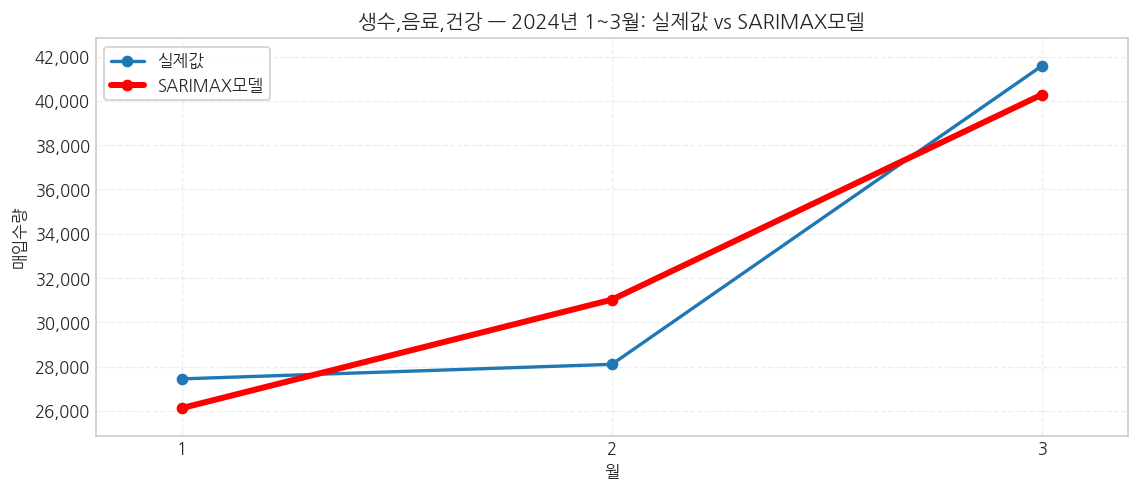

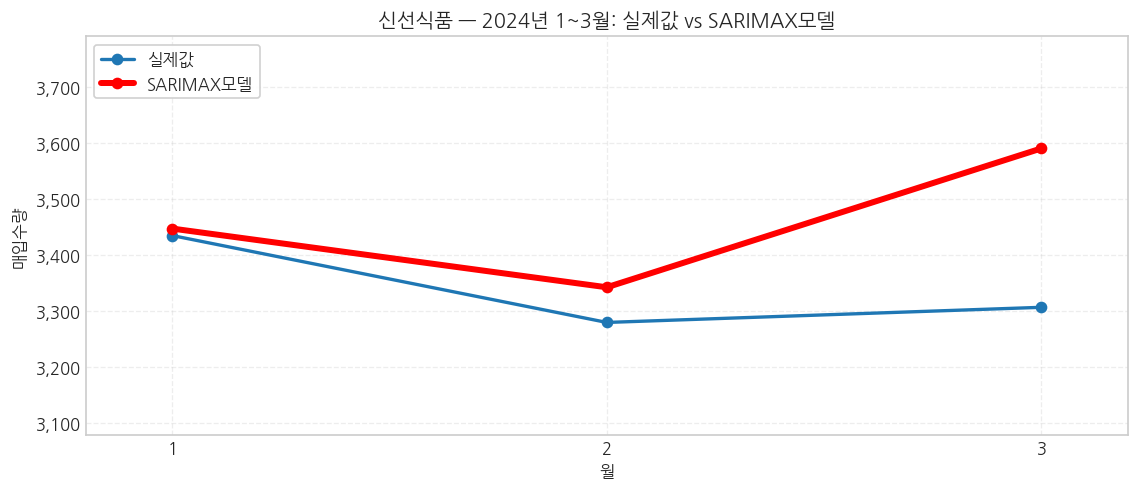

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np, pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

# --- 1) 한글 폰트를 '존재하는 것 중에서' 자동 선택 ---
def set_korean_font_safe():
    candidates = ("NanumGothic", "Noto Sans CJK KR", "Noto Sans KR",
                  "AppleGothic", "Malgun Gothic", "DejaVu Sans")
    avail = {f.name for f in fm.fontManager.ttflist}
    chosen = next((c for c in candidates if c in avail), "DejaVu Sans")

    # 폰트 캐시 새로고침(이전 세션 설정 무시)
    try:
        fm._load_fontmanager(try_read_cache=False)
    except Exception:
        pass

    # rcParams를 확실히 덮어쓰기
    mpl.rcParams.update({
        "font.family": chosen,
        "font.sans-serif": [chosen],   # 리스트도 같이 고정
        "axes.unicode_minus": False,
        "figure.dpi": 120,
        "savefig.dpi": 320,
    })
    print("[Font] Using:", chosen)

set_korean_font_safe()

# --- 2) 데이터 ---
months = [1, 2, 3]
actual = {
    '생수,음료,건강': [27449.0, 28106.0, 41584.0],
    '신선식품'     : [ 3434.0,  3279.0,  3306.0],
}
tuned = {
    '생수,음료,건강': ['26128.8','31025.47','40286.52'],
    '신선식품'     : ['3,446.46','3,341.75','3,589.46'],
}

# --- 3) 유틸 ---
def _to_float_list(seq):
    out = []
    for x in seq:
        if isinstance(x, str):
            x = x.replace(',', '').replace(' ', '')
        out.append(float(x))
    return out

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    mask = y_true != 0
    return float(np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100) if mask.any() else np.nan

def _thousands(x, pos):
    return f"{int(x):,}"

# --- 4) 플롯 ---
def plot_by_category_like_card(months, actual, tuned, ylabel='매입수량'):
    months = list(months)
    for cat in actual.keys():
        if cat not in tuned:
            print(f"[WARN] '{cat}'의 tuned 값이 없어 건너뜁니다.")
            continue

        a = np.array(_to_float_list(actual[cat]), float)
        t = np.array(_to_float_list(tuned[cat]),  float)

        y_min, y_max = min(a.min(), t.min()), max(a.max(), t.max())
        pad = max(200, int((y_max - y_min)*0.08))
        y_lo, y_hi = y_min - pad, y_max + pad

        fig, ax = plt.subplots(figsize=(9.6, 4.2), facecolor='white')
        ax.set_facecolor('white')

        ax.plot(months, a, marker='o', linewidth=2.0, label='실제값')
        ax.plot(months, t, marker='o', linewidth=3.6, label='SARIMAX모델', color='red')

        ax.set_title(f'{cat} — 2024년 1~3월: 실제값 vs SARIMAX모델', fontweight='bold')
        ax.set_xlabel('월', fontweight='bold'); ax.set_ylabel(ylabel, fontweight='bold')
        ax.set_xticks(months); ax.set_xlim(min(months)-0.2, max(months)+0.2)
        ax.set_ylim(y_lo, y_hi)

        ax.yaxis.set_major_formatter(FuncFormatter(_thousands))
        ax.grid(True, linestyle='--', alpha=0.35)

        leg = ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.9)
        for txt in leg.get_texts():
            txt.set_fontweight('bold')
        for lbl in list(ax.get_xticklabels()) + list(ax.get_yticklabels()):
            lbl.set_fontweight('bold')

        plt.tight_layout(); plt.show()

# --- 5) 실행 ---
plot_by_category_like_card(months, actual, tuned, ylabel='매입수량')


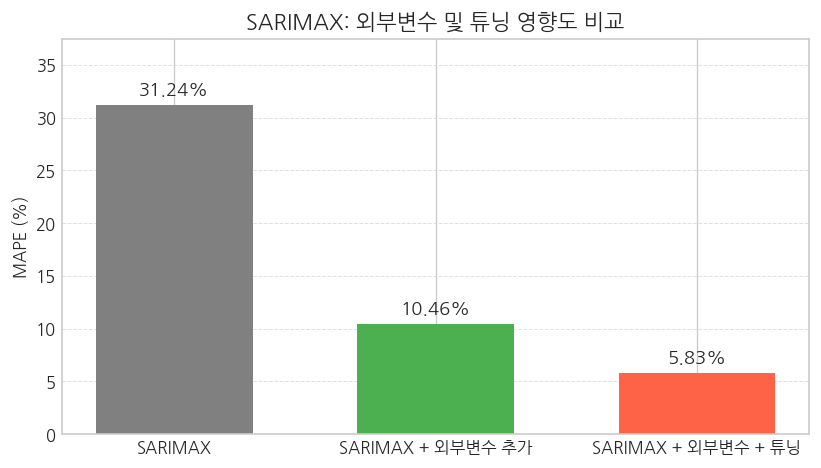

In [ ]:
import matplotlib.pyplot as plt
import platform

# ===== 1) 데이터 =====
models = [
    'SARIMAX',
    'SARIMAX + 외부변수 추가',
    'SARIMAX + 외부변수 + 튜닝'
]
mape = [31.24, 10.46, 5.83]

# ===== 2) 한글 폰트 설정 (OS별) =====
system = platform.system()
if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우
elif system == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'     # 맥
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # 리눅스 (나눔고딕)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ===== 3) 차트 그리기 =====
fig, ax = plt.subplots(figsize=(7, 4))

colors = ['gray', '#4CAF50', 'tomato']  # 회색, 주황, 초록
bars = ax.bar(models, mape, color=colors, width=0.6)

# 막대 위 퍼센트 라벨
for b, val in zip(bars, mape):
    ax.text(b.get_x() + b.get_width()/2,
            val + (max(mape)*0.02),
            f'{val:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 제목 및 축 설정
ax.set_title('SARIMAX: 외부변수 및 튜닝 영향도 비교', fontsize=13, fontweight='bold')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(mape)*1.2)

# 그리드(가독성)
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# 저장하려면 주석 해제
# plt.savefig('sarimax_exog_tuning_impact.png', dpi=200)


#매입데이터 정리

In [ ]:
import pandas as pd, numpy as np
from pandas.tseries.frequencies import to_offset
from dataclasses import dataclass

# ========= 설정 =========
REQUIRED_COLS = ['중분류','일자','순매입수량']              # 절대 필요
SOFT_COLS     = ['연도','월','주차']                      # 없으면 생성
EXOG_CAND     = ['CPI','평균기온','주총강수량','공휴일여부'] # 있으면 사용
WINSOR_LOWER, WINSOR_UPPER = 0.01, 0.99                  # 하/상 1%
WEEKLY_FREQ = 'W-MON'                                    # 월요일 시작
FILL_TARGET_MISSING_WITH_ZERO = True                     # 주간 공백 0 채움 권장

@dataclass
class AuditQC:
    column_report: pd.DataFrame
    negatives_fixed: pd.DataFrame
    winsor_report: pd.DataFrame
    exog_missing_rate: pd.DataFrame
    date_coverage_by_cat: pd.DataFrame

def _check_required_cols(df: pd.DataFrame):
    missing = [c for c in REQUIRED_COLS if c not in df.columns]
    if missing:
        raise ValueError(f"[스키마 오류] 필수 컬럼 누락: {missing}. 최소 요구사항: {REQUIRED_COLS}")

def _column_report(df: pd.DataFrame) -> pd.DataFrame:
    rep = []
    for c in df.columns:
        rep.append({
            'column': c,
            'dtype': str(df[c].dtype),
            'non_null': df[c].notna().sum(),
            'nulls': df[c].isna().sum(),
            'null_rate_%': round(df[c].isna().mean()*100, 2),
            'unique': df[c].nunique(dropna=True)
        })
    return pd.DataFrame(rep).sort_values('column')

def _to_datetime_series(s):
    return pd.to_datetime(s, errors='coerce')

def _winsorize_by_cat(df_cat: pd.DataFrame, col='순매입수량',
                      q_low=WINSOR_LOWER, q_high=WINSOR_UPPER):
    s = df_cat[col].astype(float)
    lo = s.quantile(q_low) if s.notna().sum() > 0 else np.nan
    hi = s.quantile(q_high) if s.notna().sum() > 0 else np.nan
    s_w = s.clip(lower=lo, upper=hi)
    out = df_cat.copy()
    out[col] = s_w
    return out, lo, hi

def _week_of_month(d: pd.Series) -> pd.Series:
    # 1~7 ->1, 8~14->2 ... 28~ ->4/5
    return ((d.dt.day - 1)//7 + 1).clip(upper=5).astype(int)

def audit_and_fix_schema(raw_df: pd.DataFrame):
    df0 = raw_df.copy()

    # 1) 스키마 점검
    _check_required_cols(df0)
    exog_cols = [c for c in df0.columns if c in EXOG_CAND]

    # 2) 타입/결측 정리
    df0['중분류'] = df0['중분류'].astype(str).str.strip()
    df0['일자']   = _to_datetime_series(df0['일자'])
    df0['순매입수량'] = pd.to_numeric(df0['순매입수량'], errors='coerce')

    # 필수 값 결측행 제거(중분류/일자)
    df0 = df0.dropna(subset=['중분류','일자']).reset_index(drop=True)

    # 3) 음수 0 클립
    neg_mask = df0['순매입수량'] < 0
    neg_fix_count = int(neg_mask.sum())
    df0.loc[neg_mask, '순매입수량'] = 0

    # 4) (선택) 중복 일자 처리: 같은(중분류, 일자)이 여러 행이면 합산
    agg_dict = {'순매입수량':'sum'}
    for c in exog_cols:
        agg_dict[c] = 'mean'
    df_daily = (df0.groupby(['중분류','일자'], as_index=False)
                   .agg(agg_dict)
                   .sort_values(['중분류','일자']))

    # 5) 카테고리별 윈저라이즈 (하/상 1%)
    winsor_rows = []
    df_daily_w = []
    for cat, sub in df_daily.groupby('중분류'):
        sub_w, lo, hi = _winsorize_by_cat(sub, col='순매입수량',
                                          q_low=WINSOR_LOWER, q_high=WINSOR_UPPER)
        winsor_rows.append({'중분류':cat, 'low_q':WINSOR_LOWER, 'high_q':WINSOR_UPPER,
                            'low_val':float(lo) if pd.notna(lo) else np.nan,
                            'high_val':float(hi) if pd.notna(hi) else np.nan})
        df_daily_w.append(sub_w)
    df_daily_w = pd.concat(df_daily_w, ignore_index=True)
    winsor_report = pd.DataFrame(winsor_rows)

    # 6) 주간 리샘플(W-MON) + exog ffill/bfill
    def resample_weekly(sub):
        sub = sub.set_index('일자').sort_index()
        # 타깃은 합계, 외생은 평균 → 이후 결측 ffill/bfill
        agg_map = {'순매입수량':'sum', **{c:'mean' for c in exog_cols}}
        wk = sub.resample(WEEKLY_FREQ).agg(agg_map)
        # 외생 결측 처리
        if exog_cols:
            wk[exog_cols] = wk[exog_cols].ffill().bfill()
        # 타깃 결측 처리(주간에 데이터가 전혀 없던 주)
        if FILL_TARGET_MISSING_WITH_ZERO:
            wk['순매입수량'] = wk['순매입수량'].fillna(0)
        return wk

    wk_list = []
    for cat, sub in df_daily_w.groupby('중분류'):
        wk = resample_weekly(sub)
        wk['중분류'] = cat
        wk_list.append(wk.reset_index())
    df_weekly = pd.concat(wk_list, ignore_index=True).sort_values(['중분류','일자'])

    # 7) 연도/월/주차(W-MON 기준 월내 주차) 생성/수정
    df_weekly['연도'] = df_weekly['일자'].dt.year
    df_weekly['월']   = df_weekly['일자'].dt.month
    df_weekly['주차'] = _week_of_month(df_weekly['일자'])

    # 8) QC 리포트 구성
    col_rep = _column_report(raw_df)
    exog_miss = []
    total_rows = len(df_weekly)
    for c in exog_cols:
        exog_miss.append({'exog': c,
                          'missing_%': round(df_weekly[c].isna().mean()*100, 2)})
    exog_missing_rate = pd.DataFrame(exog_miss) if exog_miss else pd.DataFrame(columns=['exog','missing_%'])

    neg_qc = pd.DataFrame([{
        'negatives_found': neg_fix_count,
        'negatives_rate_%': round(100*neg_fix_count/max(len(df0),1), 4)
    }])

    cov = (df_weekly.groupby('중분류')['일자']
           .agg(['min','max','count'])
           .rename(columns={'min':'start','max':'end','count':'weeks'})).reset_index()

    qc = AuditQC(
        column_report = col_rep,
        negatives_fixed = neg_qc,
        winsor_report = winsor_report,
        exog_missing_rate = exog_missing_rate,
        date_coverage_by_cat = cov
    )

    # 9) 컬럼 순서 정리
    ordered = ['중분류','일자','연도','월','주차','순매입수량'] + exog_cols
    df_weekly = df_weekly[ordered]

    print("✅ 스키마 고정 & 주간화 완료")
    print(f" - 카테고리 수: {df_weekly['중분류'].nunique()}개, 주간 행수: {len(df_weekly):,}행")
    print(" - 주간 빈도:", WEEKLY_FREQ)
    print("\n[음수 처리 요약]")
    display(neg_qc)
    print("\n[윈저라이즈(하/상 1%) 요약]")
    display(winsor_report)
    if not exog_missing_rate.empty:
        print("\n[외생변수 결측률(%)]")
        display(exog_missing_rate)
    print("\n[카테고리별 커버리지]")
    display(cov)

    return df_weekly, qc

# ===== 실행 예시 =====
# df: 당신의 원본 데이터프레임 (최소 ['중분류','일자','순매입수량'] 포함)
df_weekly, qc = audit_and_fix_schema(df)


In [ ]:
import pandas as pd, numpy as np
from pandas.tseries.frequencies import to_offset

# 평가 구간
TRAIN_END = pd.Timestamp('2023-12-31')
TEST_END  = pd.Timestamp('2024-03-31')
MONTHS_EVAL = [1,2,3]  # 2024-01~03

def safe_mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def monthly_agg_mape(actual, pred, months=MONTHS_EVAL, year=2024):
    df = pd.DataFrame({'y': actual, 'yhat': pred}).dropna()
    df['연도'] = df.index.year
    df['월'] = df.index.month
    parts = {}
    for m in months:
        g = df[(df['연도']==year) & (df['월']==m)].groupby(['연도','월'])[['y','yhat']].sum()
        parts[m] = np.nan if len(g)==0 else safe_mape(g['y'].values, g['yhat'].values)
    # Q1 통합
    gq = df[(df['연도']==year) & (df['월'].isin(months))].groupby(['연도','월'])[['y','yhat']].sum()
    q1 = safe_mape(gq['y'].values, gq['yhat'].values) if len(gq)>0 else np.nan
    return parts, q1

def get_test_index(s, train_end=TRAIN_END, test_end=TEST_END):
    return s[(s.index > train_end) & (s.index <= test_end)].index

def snaive52(s, test_index):
    # 52주 전 값으로 예측 (W-MON 정렬 전제)
    return s.shift(52).reindex(test_index)

def ma_recursive(s, test_index, window=3):
    # 직전 window주 평균을 한 걸음씩 재귀 예측
    history = s[s.index <= TRAIN_END].copy()
    preds, cur_idx = [], []
    last_date = history.index.max()
    for t in test_index:
        # 혹시 주간 간격이 비면 weekly로 채워 연속성 유지
        if (t - last_date).days > 7:
            steps = int((t - last_date).days // 7)
            for _ in range(steps-1):
                history = pd.concat([history, pd.Series(history.iloc[-window:].mean(), index=[last_date + to_offset('7D')])])
                last_date = history.index.max()
        yhat = history.iloc[-window:].mean()
        preds.append(yhat)
        history = pd.concat([history, pd.Series(yhat, index=[t])])
        last_date = t
        cur_idx.append(t)
    return pd.Series(preds, index=pd.Index(cur_idx, name=history.index.name))


In [ ]:
# df_weekly 는 1단계 결과물(컬럼: 중분류, 일자, 연도, 월, 주차, 순매입수량, ... exog)
wk = df_weekly.copy()
wk['일자'] = pd.to_datetime(wk['일자'])

results_rows, detail_rows = [], []

for cat, sub in wk.groupby('중분류'):
    s = sub.set_index('일자')['순매입수량'].asfreq('W-MON')  # 주간 월요일 고정
    test_idx = get_test_index(s)
    y_test = s.reindex(test_idx)

    # sNaive(52)
    yhat_sn = snaive52(s, test_idx)
    parts_sn, q1_sn = monthly_agg_mape(y_test, yhat_sn)

    # MA3(재귀)
    yhat_ma = ma_recursive(s, test_idx, window=3)
    parts_ma, q1_ma = monthly_agg_mape(y_test, yhat_ma)

    results_rows.append({
        '중분류': cat,
        'sNaive52_Q1_MAPE_%': q1_sn,
        'MA3_Q1_MAPE_%': q1_ma,
        'MA3_vs_sNaive_개선율_%p': (q1_sn - q1_ma) if (pd.notna(q1_sn) and pd.notna(q1_ma)) else np.nan,
        'MA3_vs_sNaive_상대개선_%': ((q1_sn - q1_ma)/q1_sn*100) if (pd.notna(q1_sn) and pd.notna(q1_ma) and q1_sn!=0) else np.nan
    })

    for m in [1,2,3]:
        detail_rows.append({
            '중분류': cat, '월': m,
            'sNaive52_MAPE_%': parts_sn.get(m, np.nan),
            'MA3_MAPE_%': parts_ma.get(m, np.nan)
        })

baseline_summary = pd.DataFrame(results_rows).sort_values('MA3_Q1_MAPE_%')
baseline_monthly = pd.DataFrame(detail_rows).sort_values(['중분류','월'])

print("=== [2단계 요약] 베이스라인 Q1(2024-01~03) MAPE ===")
print(baseline_summary.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))

print("\n=== [월별 상세] 2024-01/02/03 MAPE ===")
print(baseline_monthly.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))


In [ ]:
# =========================
# 3단계: SARIMAX(+exog) & ETS 평가
# =========================
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

TRAIN_END = pd.Timestamp('2023-12-31')
TEST_END  = pd.Timestamp('2024-03-31')
MONTHS_EVAL = [1,2,3]
EXOG_CAND = ['CPI','평균기온','주총강수량','공휴일여부']

# ---- 공용 유틸 ----
def safe_mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def monthly_agg_mape(actual, pred, months=MONTHS_EVAL, year=2024):
    df = pd.DataFrame({'y': actual, 'yhat': pred}).dropna()
    df['연도'] = df.index.year
    df['월']   = df.index.month
    parts = {}
    for m in months:
        g = df[(df['연도']==year) & (df['월']==m)].groupby(['연도','월'])[['y','yhat']].sum()
        parts[m] = np.nan if len(g)==0 else safe_mape(g['y'].values, g['yhat'].values)
    gq = df[(df['연도']==year) & (df['월'].isin(months))].groupby(['연도','월'])[['y','yhat']].sum()
    q1 = safe_mape(gq['y'].values, gq['yhat'].values) if len(gq)>0 else np.nan
    return parts, q1

def get_test_index(s, train_end=TRAIN_END, test_end=TEST_END):
    return s[(s.index > train_end) & (s.index <= test_end)].index

def snaive52(s, test_index):
    return s.shift(52).reindex(test_index)

def standardize_train_future(X_train, X_future):
    """학습 구간 평균/표준편차로 표준화. 표준편차 0이면 그대로 유지."""
    mu = X_train.mean()
    sd = X_train.std().replace(0, np.nan)
    X_tr = (X_train - mu) / sd
    X_fu = (X_future - mu) / sd
    X_tr = X_tr.fillna(0.0); X_fu = X_fu.fillna(0.0)
    return X_tr, X_fu

def sarimax_best(y_train, X_train=None, m=52):
    best = None
    # (d=1, D=1) 고정, p/q 0~2, P/Q 0~1 가벼운 그리드
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,2):
                for Q in range(0,2):
                    order = (p,1,q); sorder=(P,1,Q,m)
                    try:
                        mod = SARIMAX(np.log1p(y_train), exog=X_train,
                                      order=order, seasonal_order=sorder,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
                        fit = mod.fit(disp=False)
                        aic = fit.aic
                        if (best is None) or (aic < best[0]):
                            best = (aic, fit, order, sorder)
                    except Exception:
                        continue
    return best  # (aic, fit, order, sorder) or None

# ---- 메인 루프 ----
wk = df_weekly.copy()
wk['일자'] = pd.to_datetime(wk['일자'])
exog_cols = [c for c in wk.columns if c in EXOG_CAND]

q1_rows, monthly_rows = [], []

for cat, sub in wk.groupby('중분류'):
    sub = sub.set_index('일자').asfreq('W-MON')
    y = sub['순매입수량'].astype(float).clip(lower=0)

    # 학습/테스트 분할
    y_tr = y[y.index <= TRAIN_END]
    test_idx = get_test_index(y)

    # sNaive(52) — 비교 기준
    yhat_sn = snaive52(y, test_idx)

    # ---- SARIMAX(+exog) ----
    if exog_cols:
        X = sub[exog_cols]
        X_tr = X[X.index <= TRAIN_END]
        X_fu = X.reindex(test_idx).ffill().bfill()
        # 표준화(학습 통계 기준)
        X_tr_std, X_fu_std = standardize_train_future(X_tr, X_fu)
    else:
        X_tr_std, X_fu_std = None, None

    best = sarimax_best(y_tr, X_tr_std, m=52)
    if best is not None:
        fit = best[1]
        pred_log = fit.get_forecast(steps=len(test_idx), exog=X_fu_std).predicted_mean
        yhat_sarimax = pd.Series(np.expm1(pred_log).clip(lower=0), index=test_idx)
        parts_sar, q1_sar = monthly_agg_mape(y.reindex(test_idx), yhat_sarimax)
    else:
        yhat_sarimax = pd.Series(index=test_idx, dtype=float)
        parts_sar, q1_sar = {m: np.nan for m in MONTHS_EVAL}, np.nan

    # ---- ETS(Holt-Winters, additive) ----
    try:
        ets = ExponentialSmoothing(y_tr, trend='add', seasonal='add', seasonal_periods=52, initialization_method='estimated').fit(optimized=True)
        fc_ets = ets.forecast(len(test_idx))
        yhat_ets = pd.Series(np.maximum(fc_ets, 0), index=test_idx)
        parts_ets, q1_ets = monthly_agg_mape(y.reindex(test_idx), yhat_ets)
    except Exception:
        yhat_ets = pd.Series(index=test_idx, dtype=float)
        parts_ets, q1_ets = {m: np.nan for m in MONTHS_EVAL}, np.nan

    # ---- sNaive 월별/Q1 ----
    parts_sn, q1_sn = monthly_agg_mape(y.reindex(test_idx), yhat_sn)

    # ---- Q1 요약 & 베스트 ----
    scores = {'SARIMAX_Q1_MAPE_%': q1_sar, 'ETS_Q1_MAPE_%': q1_ets}
    best_model = min(scores, key=lambda k: (np.inf if pd.isna(scores[k]) else scores[k]))
    best_q1 = scores[best_model]
    vs_sn_abs = (q1_sn - best_q1) if (pd.notna(q1_sn) and pd.notna(best_q1)) else np.nan
    vs_sn_rel = ((q1_sn - best_q1)/q1_sn*100) if (pd.notna(q1_sn) and pd.notna(best_q1) and q1_sn!=0) else np.nan

    q1_rows.append({
        '중분류': cat,
        'sNaive52_Q1_MAPE_%': q1_sn,
        'SARIMAX_Q1_MAPE_%': q1_sar,
        'ETS_Q1_MAPE_%': q1_ets,
        'Best_Model': best_model.replace('_Q1_MAPE_%',''),
        'Best_Q1_MAPE_%': best_q1,
        'vs_sNaive_개선_%p': vs_sn_abs,
        'vs_sNaive_상대개선_%': vs_sn_rel
    })

    for m in MONTHS_EVAL:
        monthly_rows.append({
            '중분류': cat, '월': m,
            'sNaive52_MAPE_%': parts_sn.get(m, np.nan),
            'SARIMAX_MAPE_%' : parts_sar.get(m, np.nan),
            'ETS_MAPE_%'     : parts_ets.get(m, np.nan)
        })

model_q1 = pd.DataFrame(q1_rows).sort_values('Best_Q1_MAPE_%')
monthly_detail = pd.DataFrame(monthly_rows).sort_values(['중분류','월'])

print("=== [3단계 요약] SARIMAX & ETS vs sNaive — Q1(2024-01~03) ===")
print(model_q1.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))

print("\n=== [월별 상세] 2024-01/02/03 MAPE ===")
print(monthly_detail.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))


In [ ]:
# =========================
# 4단계: ML + 앙상블
# =========================
import pandas as pd, numpy as np
from pandas.tseries.frequencies import to_offset
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# --- 옵션/구간 ---
TRAIN_END = pd.Timestamp('2023-12-31')
TEST_END  = pd.Timestamp('2024-03-31')
MONTHS_EVAL = [1,2,3]
EXOG_CAND = ['CPI','평균기온','주총강수량','공휴일여부']

# --- 안전 유틸 ---
def safe_mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def monthly_agg_mape(actual, pred, months=MONTHS_EVAL, year=2024):
    df = pd.DataFrame({'y': actual, 'yhat': pred}).dropna()
    df['연도'] = df.index.year
    df['월']   = df.index.month
    parts = {}
    for m in months:
        g = df[(df['연도']==year) & (df['월']==m)].groupby(['연도','월'])[['y','yhat']].sum()
        parts[m] = np.nan if len(g)==0 else safe_mape(g['y'].values, g['yhat'].values)
    gq = df[(df['연도']==year) & (df['월'].isin(months))].groupby(['연도','월'])[['y','yhat']].sum()
    q1 = safe_mape(gq['y'].values, gq['yhat'].values) if len(gq)>0 else np.nan
    return parts, q1

def get_test_index(s, train_end=TRAIN_END, test_end=TEST_END):
    return s[(s.index > train_end) & (s.index <= test_end)].index

def snaive52(s, test_index):
    return s.shift(52).reindex(test_index)

def week_of_month(dts):
    # 1~7->1, 8~14->2, ... 최대 5
    d = pd.Series(dts)
    return ((d.dt.day - 1)//7 + 1).clip(upper=5).astype(int).values

# --- 특성 엔지니어링 ---
def make_features(sub_wk, exog_cols):
    """sub_wk: (index=W-MON) ['순매입수량', exog...]"""
    df = sub_wk.copy()
    y = df['순매입수량'].astype(float).clip(lower=0)
    X = pd.DataFrame(index=df.index)

    # 라그
    for k in [1,2,3,4,52,53]:
        X[f'lag{k}'] = y.shift(k)

    # 롤링(직전 시점까지)
    X['rm3']  = y.shift(1).rolling(3).mean()
    X['rm4']  = y.shift(1).rolling(4).mean()
    X['rm8']  = y.shift(1).rolling(8).mean()
    X['rm13'] = y.shift(1).rolling(13).mean()
    X['rs8']  = y.shift(1).rolling(8).std()

    # 캘린더
    idx = df.index
    X['weekofyear'] = idx.isocalendar().week.astype(int).values
    X['month']      = idx.month
    X['quarter']    = idx.quarter
    wom = week_of_month(idx)
    X['wom']        = wom
    X['is_year_start'] = (idx.is_year_start).astype(int)
    X['is_year_end']   = (idx.is_year_end).astype(int)

    # 외생(원시 + lag1)
    for c in exog_cols:
        X[c] = df[c]
        X[f'{c}_lag1'] = df[c].shift(1)

    # 타깃
    target = y

    # 학습/테스트 분리
    data = pd.concat([X, target.rename('y')], axis=1).dropna()
    train = data[data.index <= TRAIN_END]
    test  = data[(data.index > TRAIN_END) & (data.index <= TEST_END)]
    feat_cols = [c for c in data.columns if c != 'y']
    return train[feat_cols], train['y'], test[feat_cols], test['y']

# --- ML 학습자 ---
def fit_predict_rf(X_tr, y_tr, X_te):
    rf = RandomForestRegressor(
        n_estimators=500, max_depth=None, min_samples_leaf=2,
        random_state=42, n_jobs=-1
    )
    rf.fit(X_tr, np.log1p(y_tr))
    pred = np.expm1(rf.predict(X_te))
    return np.clip(pred, 0, None), rf

def fit_predict_lgbm(X_tr, y_tr, X_te):
    try:
        import lightgbm as lgb
    except Exception:
        return None, None
    # 간단한 홀드아웃(2023년 마지막 12주)로 early stopping
    tr_idx = X_tr.index
    val_cut = tr_idx.max() - pd.Timedelta(weeks=12)
    tr_mask = tr_idx <= val_cut
    val_mask = tr_idx >  val_cut

    lgbm = lgb.LGBMRegressor(
        n_estimators=5000, learning_rate=0.03,
        num_leaves=31, subsample=0.8, colsample_bytree=0.8,
        reg_alpha=0.0, reg_lambda=0.0, random_state=42
    )
    lgbm.fit(
        X_tr[tr_mask], np.log1p(y_tr[tr_mask]),
        eval_set=[(X_tr[val_mask], np.log1p(y_tr[val_mask]))],
        eval_metric='l2',
        callbacks=[lgb.early_stopping(stopping_rounds=200, verbose=False)]
    )
    pred = np.expm1(lgbm.predict(X_te, num_iteration=lgbm.best_iteration_))
    return np.clip(pred, 0, None), lgbm

def fit_predict_xgb(X_tr, y_tr, X_te):
    try:
        import xgboost as xgb
        from xgboost import XGBRegressor
    except Exception:
        return None, None

    # 검증 분할(마지막 12주)
    tr_idx = X_tr.index
    if len(tr_idx) < 20:
        # 데이터가 너무 짧으면 얼리 스톱 생략
        val_cut = None
        tr_mask = np.ones(len(tr_idx), dtype=bool)
        val_mask = np.zeros(len(tr_idx), dtype=bool)
    else:
        val_cut = tr_idx.max() - pd.Timedelta(weeks=12)
        tr_mask = tr_idx <= val_cut
        val_mask = tr_idx >  val_cut

    model = XGBRegressor(
        n_estimators=3000,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        verbosity=0,          # fit(verbose=...) 대신 여기서 억제
    )

    y_tr_log = np.log1p(y_tr)

    # 1) 콜백 방식 얼리 스톱(버전 호환)
    used_early_stop = False
    try:
        from xgboost.callback import EarlyStopping
        callbacks = [EarlyStopping(rounds=200, save_best=True, maximize=False)]
        if val_cut is not None and val_mask.sum() > 0:
            model.fit(
                X_tr[tr_mask], y_tr_log[tr_mask],
                eval_set=[(X_tr[val_mask], y_tr_log[val_mask])],
                callbacks=callbacks
            )
            used_early_stop = True
    except Exception:
        pass

    # 2) 콜백 실패 또는 검증셋 없음 → 일반 학습
    if not used_early_stop:
        model.fit(X_tr, y_tr_log)

    pred = np.expm1(model.predict(X_te))
    return np.clip(pred, 0, None), model

# --- 메인 루프 ---
wk = df_weekly.copy()
wk['일자'] = pd.to_datetime(wk['일자'])
exog_cols = [c for c in wk.columns if c in EXOG_CAND]

q1_rows, monthly_rows = [], []

for cat, sub in wk.groupby('중분류'):
    sub = sub.set_index('일자').asfreq('W-MON')
    y = sub['순매입수량'].astype(float).clip(lower=0)
    test_idx = get_test_index(y)

    # --- 베이스라인 & ETS ---
    yhat_sn = snaive52(y, test_idx)

    try:
        ets = ExponentialSmoothing(
            y[y.index <= TRAIN_END], trend='add', seasonal='add',
            seasonal_periods=52, initialization_method='estimated'
        ).fit(optimized=True)
        yhat_ets = pd.Series(np.maximum(ets.forecast(len(test_idx)), 0), index=test_idx)
    except Exception:
        yhat_ets = pd.Series(index=test_idx, dtype=float)

    # --- 피처 ---
    if exog_cols:
        sub = sub[['순매입수량'] + exog_cols].copy()
        # 외생 결측 보정
        sub[exog_cols] = sub[exog_cols].ffill().bfill()
    else:
        sub = sub[['순매입수량']].copy()

    X_tr, y_tr, X_te, y_te = make_features(sub, exog_cols)

    # --- ML들 ---
    preds_dict = {}
    # RF
    yhat_rf, rf = fit_predict_rf(X_tr, y_tr, X_te)
    preds_dict['RF'] = pd.Series(yhat_rf, index=X_te.index)
    # LGBM
    yhat_lgbm, lgbm = fit_predict_lgbm(X_tr, y_tr, X_te)
    if yhat_lgbm is not None:
        preds_dict['LGBM'] = pd.Series(yhat_lgbm, index=X_te.index)
    # XGB
    yhat_xgb, xgb = fit_predict_xgb(X_tr, y_tr, X_te)
    if yhat_xgb is not None:
        preds_dict['XGB'] = pd.Series(yhat_xgb, index=X_te.index)

    # --- 집계 & 평가 ---
    actual = y.reindex(test_idx)
    parts_sn, q1_sn = monthly_agg_mape(actual, yhat_sn)
    parts_ets, q1_ets = monthly_agg_mape(actual, yhat_ets)

    # 각 ML
    row = {
        '중분류': cat,
        'sNaive52_Q1_MAPE_%': q1_sn,
        'ETS_Q1_MAPE_%': q1_ets
    }
    for k, s_pred in preds_dict.items():
        _, q1 = monthly_agg_mape(actual, s_pred.reindex(test_idx))
        row[f'{k}_Q1_MAPE_%'] = q1

    # --- 역-MAPE 가중 앙상블(ETS + ML들) ---
    # 사용 가능한 모델만 골라 가중
    weekly_preds = {'ETS': yhat_ets, 'sNaive': yhat_sn}
    weekly_preds.update(preds_dict)
    mape_for_w = {}
    for name, s_pred in weekly_preds.items():
        _, q1m = monthly_agg_mape(actual, s_pred.reindex(test_idx))
        if pd.notna(q1m) and np.isfinite(q1m) and q1m > 0:
            mape_for_w[name] = q1m

    use_models = [k for k in mape_for_w.keys() if k != 'sNaive']  # sNaive는 가중 앙상블 제외
    if len(use_models) >= 2:
        weights = {k: 1.0/mape_for_w[k] for k in use_models}
        denom = sum(weights.values())
        # 주간 예측 결합
        yhat_ens = sum(weekly_preds[k].reindex(test_idx).fillna(method='ffill').fillna(method='bfill') * (weights[k]/denom)
                       for k in use_models)
        parts_ens, q1_ens = monthly_agg_mape(actual, yhat_ens)
        row['Ensemble_Q1_MAPE_%'] = q1_ens
        weekly_preds['Ensemble'] = yhat_ens
    else:
        row['Ensemble_Q1_MAPE_%'] = np.nan

    # --- sNaive 대비 최고 모델 선정 ---
    candidates = {k.replace('_Q1_MAPE_%',''): v for k,v in row.items() if k.endswith('_Q1_MAPE_%') and k != 'sNaive52_Q1_MAPE_%'}
    best_model = min(candidates, key=lambda k: (np.inf if pd.isna(candidates[k]) else candidates[k]))
    best_q1 = candidates[best_model]
    vs_sn_abs = (q1_sn - best_q1) if (pd.notna(q1_sn) and pd.notna(best_q1)) else np.nan
    vs_sn_rel = ((q1_sn - best_q1)/q1_sn*100) if (pd.notna(q1_sn) and pd.notna(best_q1) and q1_sn!=0) else np.nan

    row.update({
        'Best_Model': best_model,
        'Best_Q1_MAPE_%': best_q1,
        'vs_sNaive_개선_%p': vs_sn_abs,
        'vs_sNaive_상대개선_%': vs_sn_rel
    })
    q1_rows.append(row)

    # --- 월별 상세 저장 ---
    # sNaive/ETS/ML/Ensemble 모두 월별 MAPE
    for m in MONTHS_EVAL:
        rec = {'중분류': cat, '월': m}
        rec['sNaive52_MAPE_%'] = monthly_agg_mape(actual, yhat_sn)[0].get(m, np.nan)
        rec['ETS_MAPE_%']      = monthly_agg_mape(actual, yhat_ets)[0].get(m, np.nan)
        for k, s_pred in preds_dict.items():
            rec[f'{k}_MAPE_%'] = monthly_agg_mape(actual, s_pred.reindex(test_idx))[0].get(m, np.nan)
        if 'Ensemble' in weekly_preds:
            rec['Ensemble_MAPE_%'] = monthly_agg_mape(actual, weekly_preds['Ensemble'])[0].get(m, np.nan)
        monthly_rows.append(rec)

# --- 결과 테이블 ---
ml_q1 = pd.DataFrame(q1_rows).sort_values('Best_Q1_MAPE_%')
ml_monthly = pd.DataFrame(monthly_rows).sort_values(['중분류','월'])

print("=== [4단계 요약] ML & Ensemble vs 베이스라인 — Q1(2024-01~03) ===")
print(ml_q1.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))

print("\n=== [월별 상세] 2024-01/02/03 MAPE ===")
print(ml_monthly.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))


In [ ]:
import pandas as pd, numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

TRAIN_END = pd.Timestamp('2023-12-31')
TEST_END  = pd.Timestamp('2024-03-31')
MONTHS_EVAL = [1,2,3]

def safe_mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]))*100

def monthly_agg_mape(actual, pred, months=MONTHS_EVAL, year=2024):
    df = pd.DataFrame({'y': actual, 'yhat': pred}).dropna()
    df['연도'] = df.index.year
    df['월']   = df.index.month
    parts = {}
    for m in months:
        g = df[(df['연도']==year) & (df['월']==m)].groupby(['연도','월'])[['y','yhat']].sum()
        parts[m] = np.nan if len(g)==0 else safe_mape(g['y'].values, g['yhat'].values)
    gq = df[(df['연도']==year) & (df['월'].isin(months))].groupby(['연도','월'])[['y','yhat']].sum()
    q1 = safe_mape(gq['y'].values, gq['yhat'].values) if len(gq)>0 else np.nan
    return parts, q1

def eval_ets_variants(y, test_idx):
    """ETS add/add vs add/mul 간단 비교 (양수 시계열 가정)"""
    y_tr = y[y.index <= TRAIN_END]
    actual = y.reindex(test_idx)

    out = {}
    # A,A,A
    try:
        fit = ExponentialSmoothing(y_tr, trend='add', seasonal='add',
                                   seasonal_periods=52, initialization_method='estimated').fit(optimized=True)
        yhat = pd.Series(np.maximum(fit.forecast(len(test_idx)), 0), index=test_idx)
        out['ETS_add_add'] = monthly_agg_mape(actual, yhat)[1]
    except: out['ETS_add_add'] = np.nan

    # A,A,M (계절 곱셈형) — 값이 0 있으면 미세 epsilon 더해줌
    try:
        y_eps = (y_tr + 1e-6)
        fitm = ExponentialSmoothing(y_eps, trend='add', seasonal='mul',
                                    seasonal_periods=52, initialization_method='estimated').fit(optimized=True)
        yhatm = pd.Series(np.maximum(fitm.forecast(len(test_idx)), 0), index=test_idx)
        out['ETS_add_mul'] = monthly_agg_mape(actual, yhatm)[1]
    except: out['ETS_add_mul'] = np.nan

    return out

# ——— 실행: 3월 고오차 보정 가능성 체크(선택) ———
wk = df_weekly.copy()
wk['일자'] = pd.to_datetime(wk['일자'])

for cat, sub in wk.groupby('중분류'):
    s = sub.set_index('일자').asfreq('W-MON')['순매입수량'].astype(float).clip(lower=0)
    test_idx = s[(s.index > TRAIN_END) & (s.index <= TEST_END)].index
    comps = eval_ets_variants(s, test_idx)
    print(f"{cat} → Q1 MAPE 비교:", comps)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.tseries.frequencies import to_offset

def week_to_month_sum(pred_weekly):
    df = pred_weekly.to_frame('yhat')
    df['연도'] = df.index.year
    df['월']   = df.index.month
    return (df.groupby(['연도','월'])['yhat'].sum())

def fit_ets_and_forecast(sub_wk, cutoff_date, horizon_weeks=12,
                         trend='add', seasonal='add', m=52):
    """cutoff_date까지 전체 사용해 재학습 → horizon_weeks 예측"""
    y = (sub_wk.set_index('일자')
               .asfreq('W-MON')['순매입수량']
               .astype(float).clip(lower=0))
    y = y[y.index <= pd.to_datetime(cutoff_date)]
    if seasonal == 'mul':
        y_fit = y + 1e-6
    else:
        y_fit = y

    fit = ExponentialSmoothing(
        y_fit, trend=trend, seasonal=seasonal, seasonal_periods=m,
        initialization_method='estimated'
    ).fit(optimized=True)

    future_idx = pd.date_range(start=y.index.max()+to_offset('7D'),
                               periods=horizon_weeks, freq='W-MON')
    yhat = pd.Series(np.maximum(fit.forecast(horizon_weeks), 0), index=future_idx, name='yhat')
    return yhat

# —— 파라미터: 챔피언 모델 구성 ——
CHAMPION_BY_CAT = {
    '생수,음료,건강': dict(trend='add', seasonal='add'),
    '신선식품':       dict(trend='add', seasonal='add'),
}
CUTOFF = '2025-03-31'   # 최신 데이터까지 학습
HORIZON_WEEKS = 12      # 필요 시 변경 (8~16주 권장)

weekly_forecasts = []
monthly_forecasts =
for cat, params in CHAMPION_BY_CAT.items():
    sub = df_weekly[df_weekly['중분류']==cat][['일자','순매입수량']].copy()
    yhat_w = fit_ets_and_forecast(sub, cutoff_date=CUTOFF, horizon_weeks=HORIZON_WEEKS,
                                  trend=params['trend'], seasonal=params['seasonal'], m=52)
    df_w = yhat_w.to_frame().reset_index().rename(columns={'index':'일자'})
    df_w.insert(0, '중분류', cat)
    weekly_forecasts.append(df_w)

    mon = week_to_month_sum(yhat_w)
    df_m = mon.to_frame().reset_index().rename(columns={'yhat':'예측_월합'})
    df_m.insert(0, '중분류', cat)
    monthly_forecasts.append(df_m)

weekly_forecasts = pd.concat(weekly_forecasts, ignore_index=True)
monthly_forecasts = pd.concat(monthly_forecasts, ignore_index=True)

# 정수화(선택): 수량이면 반올림
weekly_forecasts['예측수량'] = weekly_forecasts['yhat'].round().astype(int)
weekly_forecasts = weekly_forecasts.drop(columns=['yhat'])

# 저장
weekly_path  = "A매입_주간예측_ETSchampion.csv"
monthly_path = "A매입_월합예측_ETSchampion.csv"
weekly_forecasts.to_csv(weekly_path, index=False, encoding='utf-8-sig')
monthly_forecasts.to_csv(monthly_path, index=False, encoding='utf-8-sig')

print("저장 완료:", weekly_path, monthly_path)


In [ ]:
import pandas as pd, numpy as np

EXOG_CAND = ['CPI','평균기온','주총강수량','공휴일여부']  # 있으면 자동 사용
mon = df_weekly.copy()
mon['일자'] = pd.to_datetime(mon['일자'])
mon['연월'] = mon['일자'].values.astype('datetime64[M]')  # 월 초(월 단위)

# 타깃: 월합, 외생: 월평균(필요시 합/최대로 바꿔도 됨)
agg = {'순매입수량':'sum', **{c:'mean' for c in mon.columns if c in EXOG_CAND}}
df_mon = (mon.groupby(['중분류','연월'], as_index=False).agg(agg)
            .sort_values(['중분류','연월']))

TRAIN_END = pd.Timestamp('2023-12-31')
TEST_END  = pd.Timestamp('2024-03-31')


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings; warnings.filterwarnings("ignore")

def safe_mape(y, yhat):
    y, yhat = np.array(y, float), np.array(yhat, float)
    mask = y != 0
    return np.nan if mask.sum()==0 else np.mean(np.abs((yhat[mask]-y[mask])/y[mask]))*100

def eval_monthly_models(df_mon, cat, exog_cols):
    sub = df_mon[df_mon['중분류']==cat].set_index('연월').asfreq('MS')  # 월초
    y = sub['순매입수량'].clip(lower=0)
    X = sub[exog_cols] if exog_cols else None

    y_tr = y[y.index <= TRAIN_END]; y_te = y[(y.index>'2023-12-31') & (y.index<=TEST_END)]
    idx_te = y_te.index

    # sNaive12 / MA5
    snaive12 = y.shift(12).reindex(idx_te)
    ma5 = y.shift(1).rolling(5).mean().reindex(idx_te)

    # ETS(12) — add/add 와 add/mul 둘 다 시도
    ets_add, ets_mul = np.nan, np.nan
    try:
        fitA = ExponentialSmoothing(y_tr, trend='add', seasonal='add', seasonal_periods=12,
                                    initialization_method='estimated').fit(optimized=True)
        yhatA = fitA.forecast(len(idx_te))
        ets_add = safe_mape(y_te, yhatA)
    except: pass
    try:
        fitM = ExponentialSmoothing((y_tr+1e-6), trend='add', seasonal='mul', seasonal_periods=12,
                                    initialization_method='estimated').fit(optimized=True)
        yhatM = fitM.forecast(len(idx_te))
        ets_mul = safe_mape(y_te, yhatM)
    except: pass
    yhat_ets = yhatA if (not np.isnan(ets_add) and (np.isnan(ets_mul) or ets_add<=ets_mul)) else yhatM

    # Prophet(월) — 연간 계절(=월 패턴) + 외생
    try:
        from prophet import Prophet
        sub_p = sub[['순매입수량'] + (exog_cols if exog_cols else [])].reset_index()
        sub_p = sub_p.rename(columns={'연월':'ds','순매입수량':'y'})
        m = Prophet(growth='linear', yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        for c in (exog_cols if exog_cols else []):
            m.add_regressor(c, standardize=True)
        m.fit(sub_p[sub_p['ds']<=TRAIN_END])
        future = pd.DataFrame({'ds': idx_te})
        if exog_cols:
            exog_future = sub_p[['ds']+exog_cols].set_index('ds').reindex(idx_te).ffill().bfill().reset_index()
            future = future.merge(exog_future, on='ds', how='left')
        fcst = m.predict(future)
        prop = safe_mape(y_te.values, np.clip(fcst['yhat'].values, 0, None))
    except Exception:
        prop = np.nan

    # XGBoost(월) — 라그/롤링/캘린더+외생
    try:
        from xgboost import XGBRegressor
        dfX = sub.copy()
        for k in [1,2,3,6,12]:
            dfX[f'lag{k}'] = y.shift(k)
        dfX['rm3']  = y.shift(1).rolling(3).mean()
        dfX['rm6']  = y.shift(1).rolling(6).mean()
        dfX['rm12'] = y.shift(1).rolling(12).mean()
        dfX['month']   = dfX.index.month
        dfX['quarter'] = dfX.index.quarter
        if X is not None:
            for c in exog_cols:
                dfX[c] = X[c]
                dfX[f'{c}_lag1'] = X[c].shift(1)
        data = dfX.drop(columns=['순매입수량']).join(y.rename('y'))
        data = data.dropna()
        tr = data[data.index <= TRAIN_END]; te = data[(data.index > TRAIN_END) & (data.index <= TEST_END)]
        Xtr, ytr, Xte, yte = tr.drop(columns=['y']), np.log1p(tr['y']), te.drop(columns=['y']), te['y']

        model = XGBRegressor(
            n_estimators=2000, learning_rate=0.03, max_depth=5,
            subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
            objective='reg:squarederror', random_state=42, n_jobs=-1
        )
        # 간단 홀드아웃: 마지막 6개월
        cut = Xtr.index.max() - pd.offsets.MonthBegin(6)
        tr_mask = Xtr.index <= cut; val_mask = Xtr.index > cut
        try:
            from xgboost.callback import EarlyStopping
            model.fit(Xtr[tr_mask], ytr[tr_mask],
                      eval_set=[(Xtr[val_mask], ytr[val_mask])],
                      callbacks=[EarlyStopping(rounds=200, save_best=True, maximize=False)], verbose=False)
        except Exception:
            model.fit(Xtr, ytr)
        xgb_pred = np.expm1(model.predict(Xte))
        xgb = safe_mape(yte.values, np.clip(xgb_pred, 0, None))
    except Exception:
        xgb = np.nan

    res = {
        'sNaive12': safe_mape(y_te, snaive12),
        'MA5':      safe_mape(y_te, ma5),
        'ETS(AA)':  ets_add,
        'ETS(AM)':  ets_mul,
        'Prophet':  prop,
        'XGB':      xgb
    }
    # 베스트 선정
    best_model = min(res, key=lambda k: (np.inf if (res[k] is None or np.isnan(res[k])) else res[k]))
    return res, best_model


In [ ]:
exog_cols = [c for c in df_mon.columns if c in EXOG_CAND]
summary = []
for cat in df_mon['중분류'].unique():
    res, best = eval_monthly_models(df_mon, cat, exog_cols)
    row = {'중분류':cat, **res, 'Best':best, 'Best_MAPE':res[best]}
    # sNaive12 대비 상대개선
    if not np.isnan(row['sNaive12']) and not np.isnan(row['Best_MAPE']) and row['sNaive12']>0:
        row['vs_sNaive12_%'] = (row['sNaive12'] - row['Best_MAPE'])/row['sNaive12']*100
    summary.append(row)

import pandas as pd
out = pd.DataFrame(summary).sort_values('Best_MAPE')
print(out.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd, numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# =========================================
# 전역 설정 (네 코드와 동일/호환)
# =========================================
EXOG_VARS = ['CPI','평균기온','주총강수량','주강한비_발생여부','주최대적설','CPI_정규화','ITR','EOQ','ROP']
# 검증용(2024Q1) / 예측용(2025Q1) 기간
EVAL_PERIODS_24Q1   = pd.period_range('2024-01','2024-03', freq='M')
FORECAST_PERIODS_25 = pd.period_range('2025-01','2025-03', freq='M')
TRAIN_END_YEAR_FOR_24Q1 = 2023   # 2024Q1 평가시 학습은 2023까지
TRAIN_END_YEAR_FOR_25Q1 = 2024   # 2025Q1 예측시 학습은 2024까지

# 가드레일/제약 (보고서 표기용)
CLIP_MULT       = 3.0
YOY_BAND        = (0.6, 1.6)
MONTH_PCTL_BAND = (5, 95)
ANCHOR_BLEND    = 0.35
MIN_SALES_CORR  = 0.25
MAX_LAG_MONTHS  = 6
MIN_LAG         = 1

# =========================================
# 공통 유틸
# =========================================
def _periodize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['연도'] = df['연도'].astype(int)
    df['월']   = df['월'].astype(int)
    df['연월'] = pd.PeriodIndex(pd.to_datetime(dict(year=df['연도'], month=df['월'], day=1)), freq='M')
    return df

def _prep_monthly(merged_data: pd.DataFrame):
    df = _periodize(merged_data)
    use_exog = [c for c in EXOG_VARS if c in df.columns]
    agg = {'판매수량':'sum','순매입수량':'sum', **{c:'mean' for c in use_exog}}
    monthly = (df.groupby(['중분류','연월'], as_index=False)[list(agg.keys())]
                 .agg(agg).sort_values(['중분류','연월']))
    return monthly, use_exog, df

def _zfit(X: pd.DataFrame):
    mu = X.mean(axis=0); sd = X.std(axis=0).replace(0,1.0); return mu, sd
def _zapply(X: pd.DataFrame, mu, sd): return (X - mu) / sd

def _mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    if mask.sum() == 0: return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]).mean() * 100.0)

def _monthwise_bounds(y_series: pd.Series, months):
    # y_series index: Period[M]
    df = y_series.to_timestamp().to_frame('y')
    df['m'] = df.index.month
    q = df.groupby('m')['y'].quantile([MONTH_PCTL_BAND[0]/100, MONTH_PCTL_BAND[1]/100]).unstack()
    q.columns = ['pL','pU']
    lbs, ubs = [], []
    for m in months:
        if m in q.index: lbs.append(float(q.loc[m,'pL'])); ubs.append(float(q.loc[m,'pU']))
        else: lbs.append(0.0); ubs.append(np.inf)
    return np.array(lbs), np.array(ubs)

# =========================================
# 1) 2024Q1 매입 평가 (overall_mape / overall_wmape, 상세 comp)
# =========================================
def evaluate_2024Q1_buys(merged_data: pd.DataFrame):
    monthly, use_exog, df_raw = _prep_monthly(merged_data)
    rows_detail, rows_diag = [], []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), EVAL_PERIODS_24Q1[-1], freq='M')
        g = g.reindex(full_idx)

        y_buy   = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux   = g[[c for c in use_exog if c in g.columns]].copy()
        if X_aux.shape[1] > 0:
            X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
        # 리드타임 추정 (훈련=~2023)
        r_best, L_best = -np.inf, MIN_LAG
        train_mask = (full_idx.year <= TRAIN_END_YEAR_FOR_24Q1)
        for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
            r = np.corrcoef(y_buy.loc[train_mask].values, s_sales.shift(L).loc[train_mask].values)[0,1]
            r = np.nan_to_num(r, nan=-1)
            if r > r_best: r_best, L_best = r, L
        use_sales = (r_best >= MIN_SALES_CORR)

        # 특징
        base = pd.DataFrame(index=full_idx)
        base['buy_lag1'] = y_buy.shift(1); base['buy_lag2'] = y_buy.shift(2)
        if use_sales:
            base['sales_L'] = s_sales.shift(L_best); base['sales_L+1'] = s_sales.shift(L_best+1)
        if X_aux.shape[1] > 0: base = base.join(X_aux)
        base['y_12'] = y_buy.shift(12)
        m = full_idx.to_timestamp().month
        base['m_sin'] = np.sin(2*np.pi*m/12); base['m_cos'] = np.cos(2*np.pi*m/12)
        for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','y_12','EOQ','ROP']:
            if c in base.columns: base[c] = np.log1p(base[c].clip(lower=0))
        base = base.ffill().bfill().fillna(0.0)

        # 학습/예측
        y_tr = y_buy.loc[train_mask]; X_tr = base.loc[y_tr.index]; X_fc = base.loc[EVAL_PERIODS_24Q1]
        if X_tr.shape[1] > 0:
            mu, sd = _zfit(X_tr); X_tr = _zapply(X_tr, mu, sd); X_fc = _zapply(X_fc, mu, sd).clip(-4,4)
        y_fit = np.log1p(y_tr.clip(y_tr.quantile(0.01), y_tr.quantile(0.99)).values)
        fit = SARIMAX(y_fit, exog=X_tr.values if X_tr is not None else None,
                      order=(0,1,1), seasonal_order=(0,1,1,12),
                      enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
        yhat_t = fit.forecast(steps=len(EVAL_PERIODS_24Q1), exog=X_fc.values if X_fc is not None else None)
        yhat = np.expm1(np.asarray(yhat_t, dtype=float))
        yhat = np.clip(yhat, 0, np.inf)

        # 가드레일
        cap = np.percentile(y_tr,95) * CLIP_MULT
        last_year = y_buy.shift(12).loc[EVAL_PERIODS_24Q1].astype(float).fillna(0.0).values
        months = [p.month for p in EVAL_PERIODS_24Q1]
        lb_m, ub_m = _monthwise_bounds(y_tr, months)
        lb_yoy = np.where(last_year>0, last_year*YOY_BAND[0], 0.0)
        ub_yoy = np.where(last_year>0, last_year*YOY_BAND[1], cap)
        yhat = np.minimum(np.maximum(yhat, np.maximum(lb_m, lb_yoy)), np.minimum(ub_m, cap))
        if ANCHOR_BLEND>0:
            anchor = np.where(last_year>0, last_year, yhat)
            yhat = (1-ANCHOR_BLEND)*yhat + ANCHOR_BLEND*anchor

        # 실적
        y_true = (merged_data.assign(연월=pd.PeriodIndex(pd.to_datetime(dict(year=merged_data['연도'], month=merged_data['월'], day=1)), freq='M'))
                    .query("중분류==@cat and 연월 in @EVAL_PERIODS_24Q1")
                    .groupby('연월')['순매입수량'].sum()
                    .reindex(EVAL_PERIODS_24Q1).astype(float).values)

        for p, yh, yt in zip(EVAL_PERIODS_24Q1, yhat, y_true):
            ape = np.nan if yt==0 else abs(yt-yh)/yt*100
            rows_detail.append({'중분류':cat,'연월':str(p),'실적_매입수량':yt,'예측_매입수량':yh,'APE_%':ape})

        rows_diag.append({'중분류':cat,'선정_판매_랙(月)':L_best,'훈련상관계수':r_best,'판매랙사용':bool(use_sales)})

    comp = pd.DataFrame(rows_detail)
    overall_mape  = _mape(comp['실적_매입수량'].values, comp['예측_매입수량'].values)
    overall_wmape = (np.abs(comp['실적_매입수량']-comp['예측_매입수량']).sum()
                     / np.maximum(comp['실적_매입수량'].sum(),1e-9) * 100.0)
    diag = pd.DataFrame(rows_diag).sort_values('중분류')
    return comp, diag, overall_mape, overall_wmape

# =========================================
# 2) 2024Q1 튜닝: 카테고리별 BEST 조합 (간단 버전)
#    -> 보고서용 BEST_CFG 테이블 생성
# =========================================
ORDERS      = [(0,1,1),(1,1,1),(1,1,0),(0,1,2)]
SEAS_ORDERS = [(0,1,1,12),(1,1,1,12),(1,1,0,12)]
TRANSFORMS  = ['log1p','none']
SCHEMES     = ['none','aux','sales_aux']

def _build_features_core(y_buy, s_all, X_aux, idx, scheme, L):
    base = pd.DataFrame(index=idx)
    base['buy_lag1'] = y_buy.shift(1); base['buy_lag2'] = y_buy.shift(2)
    if scheme=='sales_aux':
        base['sales_L'] = s_all.shift(L); base['sales_L+1'] = s_all.shift(L+1)
    if scheme in ['aux','sales_aux'] and X_aux is not None and X_aux.shape[1] > 0:
        base = base.join(X_aux)
    base['y_12'] = y_buy.shift(12)
    m = idx.to_timestamp().month
    base['m_sin'] = np.sin(2*np.pi*m/12); base['m_cos'] = np.cos(2*np.pi*m/12)
    for c in ['sales_L','sales_L+1','buy_lag1','buy_lag2','y_12','EOQ','ROP']:
        if c in base.columns: base[c] = np.log1p(base[c].clip(lower=0))
    base = base.ffill().bfill().fillna(0.0)
    return base

def _fit_predict_once(y_buy, X_base, periods, train_end_year, order, seas, transform):
    train_mask = (X_base.index.year <= train_end_year)
    y_tr = y_buy.loc[train_mask]; X_tr = X_base.loc[y_tr.index]; X_fc = X_base.loc[periods]
    if X_tr.shape[1] > 0:
        mu, sd = _zfit(X_tr); X_tr = _zapply(X_tr, mu, sd); X_fc = _zapply(X_fc, mu, sd).clip(-4,4)
    y_fit = np.log1p(y_tr.clip(y_tr.quantile(0.01), y_tr.quantile(0.99)).values) if transform=='log1p' else y_tr.values
    fit = SARIMAX(y_fit, exog=X_tr.values if X_tr is not None else None,
                  order=order, seasonal_order=seas,
                  enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
    yhat_t = fit.forecast(steps=len(periods), exog=X_fc.values if X_fc is not None else None)
    yhat = np.expm1(np.asarray(yhat_t, dtype=float)) if transform=='log1p' else np.asarray(yhat_t, dtype=float)
    yhat = np.clip(yhat, 0, np.inf)
    cap = np.percentile(y_tr,95)*CLIP_MULT
    last_year = y_buy.shift(12).loc[periods].astype(float).fillna(0.0).values
    months = [p.month for p in periods]
    lb_m, ub_m = _monthwise_bounds(y_tr, months)
    lb_yoy = np.where(last_year>0,last_year*YOY_BAND[0],0.0)
    ub_yoy = np.where(last_year>0,last_year*YOY_BAND[1],cap)
    yhat = np.minimum(np.maximum(yhat, np.maximum(lb_m, lb_yoy)), np.minimum(ub_m, cap))
    if ANCHOR_BLEND>0:
        anchor = np.where(last_year>0,last_year,yhat); yhat = (1-ANCHOR_BLEND)*yhat + ANCHOR_BLEND*anchor
    return yhat

def tune_best_cfg_for_24Q1(merged_data: pd.DataFrame):
    monthly, use_exog, df_raw = _prep_monthly(merged_data)
    rows_summary = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), EVAL_PERIODS_24Q1[-1], freq='M')
        g = g.reindex(full_idx)
        y_buy = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux = g[[c for c in use_exog if c in g.columns]].copy()
        if X_aux.shape[1] > 0: X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # 리드타임/상관
        r_best, L_best = -np.inf, MIN_LAG
        train_mask = (full_idx.year <= TRAIN_END_YEAR_FOR_24Q1)
        for L in range(MIN_LAG, MAX_LAG_MONTHS+1):
            r = np.corrcoef(y_buy.loc[train_mask].values, s_sales.shift(L).loc[train_mask].values)[0,1]
            r = np.nan_to_num(r, nan=-1)
            if r > r_best: r_best, L_best = r, L
        allow_sales = (r_best >= MIN_SALES_CORR)

        # 정답
        y_true = (df_raw.assign(연월=pd.PeriodIndex(pd.to_datetime(dict(year=df_raw['연도'], month=df_raw['월'], day=1)), freq='M'))
                    .query("중분류==@cat and 연월 in @EVAL_PERIODS_24Q1")
                    .groupby('연월')['순매입수량'].sum()
                    .reindex(EVAL_PERIODS_24Q1).astype(float).values)

        best = {'mape':np.inf}
        for order in ORDERS:
            for seas in SEAS_ORDERS:
                for tf in TRANSFORMS:
                    for sch in SCHEMES:
                        if sch=='sales_aux' and not allow_sales:
                            continue
                        base = _build_features_core(y_buy, s_sales, X_aux, full_idx, sch, L_best)
                        try:
                            yhat = _fit_predict_once(y_buy, base, EVAL_PERIODS_24Q1, TRAIN_END_YEAR_FOR_24Q1, order, seas, tf)
                        except Exception:
                            continue
                        mape = _mape(y_true, yhat)
                        if np.isnan(mape): continue
                        if mape < best['mape']:
                            best = {'order':order,'seasonal':seas,'transform':tf,'scheme':sch,'lag':L_best,
                                    'r_train':r_best,'mape':mape}
        rows_summary.append({'중분류':cat, **best, 'MAPE_%':round(best['mape'],2)})
    best_cfg = pd.DataFrame(rows_summary).sort_values('MAPE_%')
    return best_cfg

# =========================================
# 3) 2025Q1 매출 예측 (판매)
#    (위와 같은 SARIMAX + 앵커/월효과/가드레일)
# =========================================
def forecast_sales_2025_with_anchors(merged_data: pd.DataFrame):
    monthly, use_exog, _ = _prep_monthly(merged_data)
    outs = []
    for cat, g in monthly.groupby('중분류'):
        g = g.set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS_25[-1], freq='M')
        g = g.reindex(full_idx)
        y = g['판매수량'].astype(float).fillna(0.0)
        X = g[[c for c in use_exog if c in g.columns]].copy()
        if X.shape[1] > 0:
            X = X.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)
        # 특징: y_12, 월효과
        months = full_idx.to_timestamp().month
        M = pd.get_dummies(months).drop(columns=[12], errors='ignore'); M.index = full_idx; M = M.add_prefix('m_')
        exog_full = pd.DataFrame({'y_12': y.shift(12)}, index=full_idx).join(M)
        if X.shape[1] > 0: exog_full = exog_full.join(X)
        for c in ['y_12','EOQ','ROP']:
            if c in exog_full.columns: exog_full[c] = np.log1p(exog_full[c].clip(lower=0))
        exog_full = exog_full.ffill().bfill().fillna(0.0)

        # 학습/예측
        train_mask = (full_idx.year <= TRAIN_END_YEAR_FOR_25Q1)
        y_tr = y.loc[train_mask]; X_tr = exog_full.loc[y_tr.index]; X_fc = exog_full.loc[FORECAST_PERIODS_25]
        mu, sd = _zfit(X_tr); X_tr_z = _zapply(X_tr, mu, sd); X_fc_z = _zapply(X_fc, mu, sd).clip(-4,4)
        y_fit = np.log1p(y_tr.clip(y_tr.quantile(0.01), y_tr.quantile(0.99)).values)
        fit = SARIMAX(y_fit, exog=X_tr_z.values, order=(1,1,1), seasonal_order=(0,1,1,12),
                      enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
        yhat_t = fit.forecast(steps=len(FORECAST_PERIODS_25), exog=X_fc_z.values)
        yhat = np.expm1(np.asarray(yhat_t, dtype=float)); yhat = np.clip(yhat,0,np.inf)

        # 가드레일
        cap = np.percentile(y_tr,95)*CLIP_MULT
        last_year = y.shift(12).loc[FORECAST_PERIODS_25].astype(float).fillna(0.0).values
        months = [p.month for p in FORECAST_PERIODS_25]
        lb_m, ub_m = _monthwise_bounds(y_tr, months)
        lb_yoy = np.where(last_year>0,last_year*YOY_BAND[0],0.0)
        ub_yoy = np.where(last_year>0,last_year*YOY_BAND[1],cap)
        yhat = np.minimum(np.maximum(yhat, np.maximum(lb_m, lb_yoy)), np.minimum(ub_m, cap))
        if ANCHOR_BLEND>0:
            anchor = np.where(last_year>0,last_year,yhat); yhat = (1-ANCHOR_BLEND)*yhat + ANCHOR_BLEND*anchor

        outs.append(pd.DataFrame({'중분류':cat,'연월':FORECAST_PERIODS_25,'예측_판매수량':yhat}))
    return pd.DataFrame(pd.concat(outs, ignore_index=True))

# =========================================
# 4) 2025Q1 매입 예측: Base vs With Sales (BEST_CFG 사용)
# =========================================
def predict_buys_2025Q1_compare(merged_data: pd.DataFrame, best_cfg: pd.DataFrame, sales_2025: pd.DataFrame):
    monthly, use_exog, _ = _prep_monthly(merged_data)
    out = []
    for _, row in best_cfg.iterrows():
        cat = row['중분류']; order = tuple(row['order']); seasonal = tuple(row['seasonal'])
        transform = row['transform']; scheme_base = row['scheme']; L = int(row['lag'])
        g = monthly[monthly['중분류']==cat].set_index('연월').sort_index()
        full_idx = pd.period_range(g.index.min(), FORECAST_PERIODS_25[-1], freq='M'); g = g.reindex(full_idx)
        y_buy = g['순매입수량'].astype(float).fillna(0.0)
        s_sales = g['판매수량'].astype(float).fillna(0.0)
        X_aux = g[[c for c in use_exog if c in g.columns]].copy()
        if X_aux.shape[1] > 0: X_aux = X_aux.apply(pd.to_numeric, errors='coerce').ffill().bfill().fillna(0.0)

        # A) Base
        baseA = _build_features_core(y_buy, s_sales, X_aux, full_idx, scheme_base, L)
        # B) With Sales (판매예측 덮어쓰기 + sales_aux 조건부)
        s_all = s_sales.copy()
        s_pred = sales_2025[sales_2025['중분류']==cat].set_index('연월')['예측_판매수량']
        if len(s_pred): s_all.loc[s_pred.index] = s_pred.astype(float)
        # 상관 체크(훈련=~2024)
        train_mask = (full_idx.year <= TRAIN_END_YEAR_FOR_25Q1)
        r = np.corrcoef(y_buy.loc[train_mask].values, s_all.shift(L).loc[train_mask].values)[0,1]
        r = np.nan_to_num(r, nan=-1.0)
        scheme_B = 'sales_aux' if r >= MIN_SALES_CORR else scheme_base
        baseB = _build_features_core(y_buy, s_all, X_aux, full_idx, scheme_B, L)

        def _fit_pred(y, X, transform):
            y_tr = y.loc[train_mask]; X_tr = X.loc[y_tr.index]; X_fc = X.loc[FORECAST_PERIODS_25]
            if X_tr.shape[1] > 0:
                mu, sd = _zfit(X_tr); X_tr = _zapply(X_tr, mu, sd); X_fc = _zapply(X_fc, mu, sd).clip(-4,4)
            y_fit = np.log1p(y_tr.clip(y_tr.quantile(0.01), y_tr.quantile(0.99)).values) if transform=='log1p' else y_tr.values
            fit = SARIMAX(y_fit, exog=X_tr.values if X_tr is not None else None,
                          order=order, seasonal_order=seasonal,
                          enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
            yhat_t = fit.forecast(steps=len(FORECAST_PERIODS_25), exog=X_fc.values if X_fc is not None else None)
            yhat = np.expm1(np.asarray(yhat_t, dtype=float)) if transform=='log1p' else np.asarray(yhat_t, dtype=float)
            yhat = np.clip(yhat,0,np.inf)
            cap = np.percentile(y_tr,95)*CLIP_MULT
            last_year = y.shift(12).loc[FORECAST_PERIODS_25].astype(float).fillna(0.0).values
            months = [p.month for p in FORECAST_PERIODS_25]
            lb_m, ub_m = _monthwise_bounds(y_tr, months)
            lb_yoy = np.where(last_year>0,last_year*YOY_BAND[0],0.0)
            ub_yoy = np.where(last_year>0,last_year*YOY_BAND[1],cap)
            yhat = np.minimum(np.maximum(yhat, np.maximum(lb_m, lb_yoy)), np.minimum(ub_m, cap))
            if ANCHOR_BLEND>0:
                anchor = np.where(last_year>0,last_year,yhat); yhat = (1-ANCHOR_BLEND)*yhat + ANCHOR_BLEND*anchor
            return yhat

        y_base = _fit_pred(y_buy, baseA, transform)
        y_with = _fit_pred(y_buy, baseB, transform)
        for p, a, b in zip(FORECAST_PERIODS_25, y_base, y_with):
            out.append({'중분류':cat,'연월':str(p),
                        '예측_매입수량_base':a,'예측_매입수량_withSales':b,
                        'Δ': b-a, 'Δ_%': (b-a)/a*100 if a>0 else np.nan, 'r': r, 'scheme_B':scheme_B})
    return pd.DataFrame(out)

# =========================================
# 5) 데이터 품질 요약 (간단)
# =========================================
def build_data_quality(merged_data: pd.DataFrame):
    df = _periodize(merged_data)
    rows = []
    for cat, g in df.groupby('중분류'):
        months = g[['연도','월']].drop_duplicates().shape[0]
        miss_counts = {c: int(g[c].isna().sum()) for c in EXOG_VARS if c in g.columns}
        rows.append({'중분류':cat,'월_관측수':months, **{f'결측_{k}':v for k,v in miss_counts.items()}})
    dq = pd.DataFrame(rows).fillna(0).sort_values('중분류')
    return dq

# =========================================
# ============== 실행 & 저장 ==============
# 필요 전제: merged_data (네가 앞서 만든 통합 DF)
# =========================================

# 0) 2024Q1 평가: comp, diag, overall 성능
comp_24Q1, diag_24Q1, overall_mape, overall_wmape = evaluate_2024Q1_buys(merged_data)

# 1) 전체 성능 요약
summary_overall = pd.DataFrame([{
    'overall_mape_%': round(overall_mape, 2),
    'overall_wmape_%': round(overall_wmape, 2),
    'train_range_for_eval': f'~{TRAIN_END_YEAR_FOR_24Q1}',
    'eval_range': f'{EVAL_PERIODS_24Q1[0]}~{EVAL_PERIODS_24Q1[-1]}',
    'forecast_range_next': f'{FORECAST_PERIODS_25[0]}~{FORECAST_PERIODS_25[-1]}'
}])
summary_overall.to_csv('summary_overall.csv', index=False)

# 2) 카테고리별 BEST 조합 튜닝표
best_cfg = tune_best_cfg_for_24Q1(merged_data)
# 저장 포맷을 깔끔하게
best_cfg_out = best_cfg.copy()
best_cfg_out['order']    = best_cfg_out['order'].apply(lambda x: str(tuple(x)) if not isinstance(x, tuple) else str(x))
best_cfg_out['seasonal'] = best_cfg_out['seasonal'].apply(lambda x: str(tuple(x)) if not isinstance(x, tuple) else str(x))
best_cfg_out.rename(columns={'mape':'MAPE_%'}, inplace=True)
best_cfg_out.to_csv('best_cfg_by_category.csv', index=False)

# 3) 백테스트 상세 (2024Q1 comp)
comp_24Q1.round(2).to_csv('backtest_2024Q1_detail.csv', index=False)

# 4) 2025Q1 매출 예측
sales_2025 = forecast_sales_2025_with_anchors(merged_data)
sales_2025_out = sales_2025.copy()
sales_2025_out['연월'] = sales_2025_out['연월'].astype(str)
sales_2025_out.round(2).to_csv('sales_forecast_2025Q1.csv', index=False)

# 5) 2025Q1 매입 예측: Base vs With Sales
buys_2025_compare = predict_buys_2025Q1_compare(merged_data, best_cfg, sales_2025)
buys_2025_compare.round(2).to_csv('buys_forecast_2025Q1_compare.csv', index=False)

# 6) 가드레일/제약값 테이블
guardrails = pd.DataFrame([
    {'param':'CLIP_MULT', 'value':CLIP_MULT},
    {'param':'YOY_BAND_L', 'value':YOY_BAND[0]},
    {'param':'YOY_BAND_U', 'value':YOY_BAND[1]},
    {'param':'MONTH_PCTL_BAND', 'value':f'{MONTH_PCTL_BAND[0]}~{MONTH_PCTL_BAND[1]}'},
    {'param':'ANCHOR_BLEND', 'value':ANCHOR_BLEND},
    {'param':'MIN_SALES_CORR', 'value':MIN_SALES_CORR},
    {'param':'MAX_LAG_MONTHS', 'value':MAX_LAG_MONTHS},
])
guardrails.to_csv('guardrails_params.csv', index=False)

# 7) 데이터 품질
dq = build_data_quality(merged_data)
dq.to_csv('data_quality.csv', index=False)

print("✅ Done. 생성된 파일:")
print("- summary_overall.csv")
print("- best_cfg_by_category.csv")
print("- backtest_2024Q1_detail.csv")
print("- sales_forecast_2025Q1.csv")
print("- buys_forecast_2025Q1_compare.csv")
print("- guardrails_params.csv")
print("- data_quality.csv")
